In [1]:
import numpy as np
import scipy.io
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as st
import seaborn as sb
import scipy.stats as stats
from sklearn.metrics import roc_auc_score as auROC
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as ms
import random
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator
import psutil
import multiprocessing



In [729]:
base_dir = './extracted_data/Calcium/'
# crossreg_dir = os.path.abspath(r'./crossreg')
# session = ['Hungry','Satiated']

# hungry_dir = os.path.abspath(os.path.join(base_dir, session[0]))
# satiated_dir =  os.path.abspath(os.path.join(base_dir, session[1]))

# os.listdir(hungry_dir)


FR = 20
CueN = 12
BinSize = 6
TimeRange_before = 10
TimeRange_after = 10
Baseline_range = 10
Cueduration = 30
CompareRange_base = 0.5
CompareRange_after = 1.5

FrameRange_before = int(FR*TimeRange_before)
FrameRange_after = int(FR*TimeRange_after)
FrameRange_baseline = int(FR*Baseline_range)
TotalFrame = int(FrameRange_before+FrameRange_after)
Bins = int(TotalFrame/BinSize)
Bins_before = int(FrameRange_before/BinSize)
Baseline_bins = Bins_before - int(FrameRange_baseline/BinSize)
Bins_cueend = Bins_before+int(FR*Cueduration/BinSize)

In [516]:
TotalFrame

400

In [517]:
Baseline_bins

0

In [518]:
Bins_before

33

In [519]:
os.listdir(base_dir)

['6S5.pkl',
 '2Z4.pkl',
 '2N6.pkl',
 '4B6.pkl',
 '7H6.pkl',
 '1I5.pkl',
 '1H6.pkl',
 '7B6.pkl',
 '5B6.pkl',
 '4N6.pkl',
 '6M6.pkl',
 '2I5.pkl',
 '1S5.pkl',
 '9M6.pkl',
 '1B6.pkl',
 '2S5.pkl',
 '7M6.pkl',
 '6H6.pkl',
 '8H6.pkl']

In [520]:
def read_pkl_files(base_dir):
    dataframes = []
    pkl_files = [file for file in os.listdir(base_dir) if file.endswith('.pkl')]

    for pkl_file in pkl_files:
        file_path = os.path.join(base_dir, pkl_file)
        df = pd.read_pickle(file_path)

        # Reset index and use the original index as 'cell_id'
        df.reset_index(inplace=True)
        df.rename(columns={'index': 'cell_id'}, inplace=True)
        
        # Extract animal ID from filename (assuming format 'AnimalID.pkl')
        animal_id = pkl_file.split('.')[0]
        
        # Add animal ID as a new column
        df['Animal_ID'] = animal_id

        # Reorder columns to make 'Animal_ID' front
        columns = ['Animal_ID', 'cell_id'] + [col for col in df.columns if col not in ['Animal_ID', 'cell_id']]
        df = df[columns]

        dataframes.append(df)

    return dataframes

all_dataframes = read_pkl_files(base_dir)


In [440]:
all_dataframes

[   Animal_ID                  cell_id         0    1    2        3         4  \
 0        6S5                        1  0.000000  0.0  0.0  0.00000  0.000000   
 1        6S5                        2  0.000000  0.0  0.0  0.00000  0.000000   
 2        6S5                        3  0.000000  0.0  0.0  0.00000  0.000000   
 3        6S5                        4  0.000000  0.0  0.0  0.00000  0.000000   
 4        6S5                        5  0.000000  0.0  0.0  0.00000  0.000000   
 ..       ...                      ...       ...  ...  ...      ...       ...   
 60       6S5                 Freezing  0.000000  0.0  0.0  0.00000  0.000000   
 61       6S5             In Food Area  1.000000  1.0  1.0  1.00000  1.000000   
 62       6S5         Bar Press active  0.000000  0.0  0.0  0.00000  0.000000   
 63       6S5  Miniscope record active  0.595041  1.0  0.3  0.96875  0.056604   
 64       6S5              Tone active  0.000000  0.0  0.0  0.00000  0.000000   
 
            5    6    7  .

In [441]:
all_dataframes[1].iloc[-10:,:]

Animal_ID                  cell_id         0       1         2         3  \
136       2Z4                      195  0.000000  0.0000  0.000000  0.000000   
137       2Z4                      196  0.000000  0.0000  0.000000  0.000000   
138       2Z4                      197  0.000000  0.0000  0.000000  0.000000   
139       2Z4                 Time (s) -0.032000  0.0260  0.069000  0.123000   
140       2Z4              Speed (m/s)  0.008000  0.0080  0.007000  0.007000   
141       2Z4                 Freezing  0.000000  0.0000  0.000000  0.000000   
142       2Z4             In Food Area  0.000000  0.0000  0.000000  0.000000   
143       2Z4         Bar Press active  0.000000  0.0000  0.000000  0.000000   
144       2Z4  Miniscope record active  0.644444  0.1875  0.469697  0.366667   
145       2Z4              Tone active  0.000000  0.0000  0.000000  0.000000   

            4       5         6         7  ...        29926        29927  \
136  0.000000  0.0000  0.000000  0.000000  ...     0.490338     0.485304   
137  0.000000  0.0000  0.000000  0.000000  ...    13.940576    13.824756   
138  0.000000  0.0000  0.000000  0.000000  ...    57.088811    56.704332   
139  0.169000  0.2200  0.272000  0.322000  ...  4529.497000  4529.550000   
140  0.005542  0.0050  0.005000  0.005000  ...     0.043000     0.043000   
141  0.000000  0.0000  0.000000  0.000000  ...     0.000000     0.000000   
142  0.000000  0.0000  0.000000  0.000000  ...     1.000000     1.000000   
143  0.000000  0.0000  0.000000  0.000000  ...     0.000000     0.000000   
144  0.000000  0.4375  0.535211  0.451613  ...     0.652778     0.090909   
145  0.000000  0.0000  0.000000  0.000000  ...     0.000000     0.000000   

           29928         29929        29930        29931        29932  \
136     0.480322  4.753908e-01     0.470510     0.465680     0.460899   
137    13.709898  1.359599e+01    13.483038    13.371019    13.259931   
138    56.322442  5.594312e+01    55.566362    55.192136    54.820431   
139  4529.601000  4.529650e+03  4529.701000  4529.752000  4529.801000   
140     0.043000  4.300000e-02     0.040000     0.040000     0.030208   
141     0.000000  0.000000e+00     0.000000     0.000000     0.000000   
142     1.000000  1.000000e+00     1.000000     1.000000     1.000000   
143     0.000000  0.000000e+00     0.000000     0.000000     0.000000   
144     0.710145  3.136202e-11     0.656250     0.064516     0.000000   
145     0.000000  0.000000e+00     0.000000     0.000000     0.000000   

           29933        29934        29935  
136     0.456167     0.451484     0.446849  
137    13.149766    13.040516    12.932174  
138    54.451229    54.084514    53.720268  
139  4529.852000  4529.854000  4529.854000  
140     0.030000     0.030000     0.030000  
141     0.000000     0.000000     0.000000  
142     1.000000     1.000000     1.000000  
143     0.000000     0.000000     0.000000  
144     0.071429     0.000000     0.000000  
145     0.000000     0.000000     0.000000  

[10 rows x 29938 columns]

# This section analyze all cells recorded in hungry or satiated session

In [521]:
def calculate_traces_zscore(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=None):
    # Identifying cue onsets
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1
    if cue_range is not None:
        # Select a subset of cueonset based on cue_range
        cueonset = cueonset[cue_range[0]:cue_range[1]]
    
    # Select rows where 'cell_id' is numeric and columns from the third column onwards
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
#     trace = trace.sub(trace.mean(axis = 1), axis = 0).divide(trace.std(axis = 1), axis = 0)

    tracenew = pd.DataFrame(0, index=trace.index, columns=np.arange(TotalFrame))

    # Aligning traces based on cue onset
    for i in range(TotalFrame):
        start = cueonset - FrameRange_before + i
        valid_starts = start[start >= 0]  # Ensure start is not negative
        tracenew.iloc[:, i] = trace.iloc[:, valid_starts].mean(axis=1)

    # Bin the traces
    tracebin = tracenew.groupby(pd.cut(tracenew.columns, Bins), axis=1).mean()
    tracebin.columns = np.arange(0, Bins)
    
    # Calculate the mean and std, handle the situation of 0 std
    mean_vals = tracebin.iloc[:, Baseline_bins:Bins_before].mean(axis=1)
    std_vals = tracebin.iloc[:, Baseline_bins:Bins_before].std(axis=1)
    
    # Create a mask where the mean is < 0.001 or std is < 0.001
    low_variance_mask = (mean_vals < 0.001) | (std_vals < 0.001)
    
    # Replace std values that are 0 with NaN, as well as where the mean is < 0.001
    std_vals_replaced = std_vals.mask(low_variance_mask, np.nan)
    
    # Calculate z-scores, NaN will result in the z-scores where std is zero
    tracezscore = tracebin.sub(mean_vals, axis=0).divide(std_vals_replaced, axis=0)
    
    # Replace NaN z-scores with 0, as these are the ones with std of 0
    tracezscore = tracezscore.fillna(0)

    return tracebin, tracezscore


In [522]:
def calculate_traces_sub(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=None):
    """
    Processes and aligns data in DataFrame based on cue onsets, bins the data, 
    and subtracts mean values from a specific range of bins.

    :param df: pandas DataFrame containing the data.
    :param FrameRange_before: The frame range before the cue onset.
    :param TotalFrame: Total number of frames.
    :param Bins: Number of bins for grouping.
    :param Bins_before: Number of bins before the cue onset for calculating the mean.
    :param cue_range: Range of cues to be considered (optional).
    :return: Binned traces and traces with subtracted mean values.
    """
    # Identifying cue onsets
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) > 0.5)[0]) + 1
    if cue_range is not None:
        # Select a subset of cueonset based on cue_range
        cueonset = cueonset[cue_range[0]:cue_range[1]]

    # Select rows where 'cell_id' is numeric and columns from the third column onwards
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
#     trace_median = trace.median(axis = 1)
#     # Calculate the median for each row
#     trace_median = trace.median(axis=1)

#     # Calculate the Median Absolute Deviation (MAD) for each row
#     mad = trace.sub(trace_median, axis=0).abs().median(axis=1)

#     # Calculate the robust z-score for each cell in each row
#     trace = trace.sub(trace_median, axis=0).divide(mad*1.4826, axis=0)
#     trace = trace.sub(trace.mean(axis=1), axis = 0).divide(trace.std(axis = 1), axis = 0)

    tracenew = pd.DataFrame(0, index=trace.index, columns=np.arange(TotalFrame))

    # Aligning traces based on cue onset
    for i in range(TotalFrame):
        start = cueonset - FrameRange_before + i
        valid_starts = start[start >= 0]  # Ensure start is not negative
        tracenew.iloc[:, i] = trace.iloc[:, valid_starts].mean(axis=1)

    # Bin the traces
    tracebin = tracenew.groupby(pd.cut(tracenew.columns, Bins), axis=1).mean()
    tracebin.columns = np.arange(0, Bins)

    # Calculate the mean and std, handle the situation of 0 std
    mean_vals = tracebin.iloc[:, 0:Bins_before].median(axis=1)
    
    tracesub = tracebin.sub(mean_vals, axis=0)
    
    # Replace NaN values with 0 in tracesub
    tracesub = tracesub.fillna(0)

    return tracebin, tracesub


In [523]:
hungrycue = (0, 12)

# Create a list to hold the dataframes
trace_hungry_list = []
trace_hungry_list_c = []

# Loop through each animal's DataFrame
for df in all_dataframes:
    animal_id = df['Animal_ID'].iloc[0]  # Extract animal ID
    cell_ids = df['cell_id']  # Extract cell IDs

    tracebin, tracesub = calculate_traces_zscore(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)
    tracesub['Animal_ID'] = animal_id  # Add animal ID
    tracesub['cell_id'] = cell_ids  # Add cell IDs
    tracebin['Animal_ID'] = animal_id  # Add animal ID
    tracebin['cell_id'] = cell_ids  # Add cell IDs
    
    # Reorder columns to make 'Animal_ID' front
    columns = ['Animal_ID', 'cell_id'] + [col for col in tracesub.columns if col not in ['Animal_ID', 'cell_id']]
    tracesub = tracesub[columns]
    columns = ['Animal_ID', 'cell_id'] + [col for col in tracebin.columns if col not in ['Animal_ID', 'cell_id']]
    tracebin = tracebin[columns]
    
    trace_hungry_list.append(tracesub)
    trace_hungry_list_c.append(tracebin)

# Concatenate all dataframes in the list
trace_hungry = pd.concat(trace_hungry_list, ignore_index=True)
trace_hungry_c = pd.concat(trace_hungry_list_c, ignore_index=True)




In [524]:
satiatedcue = (0, 12)

# Create a list to hold the dataframes
trace_satiated_list = []
trace_satiated_list_c = []

# Loop through each animal's DataFrame
for df in all_dataframes:
    animal_id = df['Animal_ID'].iloc[0]  # Extract animal ID
    cell_ids = df['cell_id']  # Extract cell IDs

    tracebin, tracesub = calculate_traces_zscore(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=satiatedcue)
    tracesub['Animal_ID'] = animal_id  # Add animal ID
    tracesub['cell_id'] = cell_ids  # Add cell IDs
    tracebin['Animal_ID'] = animal_id  # Add animal ID
    tracebin['cell_id'] = cell_ids  # Add cell IDs
    
    # Reorder columns to make 'Animal_ID' front
    columns = ['Animal_ID', 'cell_id'] + [col for col in tracesub.columns if col not in ['Animal_ID', 'cell_id']]
    tracesub = tracesub[columns]
    columns = ['Animal_ID', 'cell_id'] + [col for col in tracebin.columns if col not in ['Animal_ID', 'cell_id']]
    tracebin = tracebin[columns]
    
    trace_satiated_list.append(tracesub)
    trace_satiated_list_c.append(tracebin)

# Concatenate all dataframes in the list
trace_satiated = pd.concat(trace_satiated_list, ignore_index=True)
trace_satiated_c = pd.concat(trace_satiated_list_c, ignore_index=True)



In [525]:
trace_hungry

Animal_ID cell_id         0         1         2         3         4  \
0          6S5       1 -0.984256 -1.046514 -1.101477 -1.154168 -1.204681   
1          6S5       2  1.292832  1.067051  0.566565  0.102984 -0.248636   
2          6S5       3  1.170596  1.068597  0.988500  0.821747  0.672870   
3          6S5       4  0.552190  0.340789  0.095505 -0.135183 -0.352143   
4          6S5       5  0.103032  0.049696 -0.014407 -0.189046 -0.427809   
...        ...     ...       ...       ...       ...       ...       ...   
1106       8H6      63 -1.015728 -1.072246 -1.119742 -1.163200 -1.202964   
1107       8H6      71 -0.582216 -0.679147 -0.761294 -0.837058 -0.906936   
1108       8H6      73  0.000000  0.000000  0.000000  0.000000  0.000000   
1109       8H6      75  2.538170  1.966359  1.517038  1.131163  0.799775   
1110       8H6      97  0.000000  0.000000  0.000000  0.000000  0.000000   

             5         6         7  ...         56         57         58  \
0    -1.253106 -1.279904 -1.317315  ...  -0.259619  -0.321823  -0.365108   
1    -0.495956 -0.875584 -0.855765  ...   2.938801   2.852310   2.579395   
2     1.005010  1.235793  1.349204  ...  16.322423  15.975164  15.631660   
3    -0.174536 -0.389154 -0.358938  ...   8.962843   8.231028   7.516215   
4    -0.615358 -0.692804 -0.702179  ...  -2.265445  -2.198994  -1.786216   
...        ...       ...       ...  ...        ...        ...        ...   
1106 -1.239349 -0.256657  0.404051  ...  -1.557425  -1.563681  -1.569405   
1107 -0.971385 -1.030828 -1.085652  ...  -1.261660  -1.258139  -1.295303   
1108  0.000000  0.000000  0.000000  ...   0.000000   0.000000   0.000000   
1109  0.515181  0.270773  0.133675  ...   0.787394   0.504549   0.261642   
1110  0.000000  0.000000  0.000000  ...   0.000000   0.000000   0.000000   

             59         60         61         62         63         64  \
0     -0.402179  -0.473599  -0.539327  -0.615255  -0.688044  -0.712406   
1      2.041656   2.055510   2.144466   1.718477   2.652763   3.058708   
2     15.291872  14.995924  14.807755  14.602322  14.495904  14.171993   
3      6.843939   6.211669   5.617023   5.080934   5.605587   6.245776   
4     -1.227012  -1.050894  -1.128347  -1.111620  -1.067209  -1.229478   
...         ...        ...        ...        ...        ...        ...   
1106  -1.574643  -1.579435  -1.583821  -1.587833  -1.591504  -1.594864   
1107  -1.329581  -1.361195  -1.390353  -1.417246  -1.442050  -1.314322   
1108   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1109   0.053035  -0.126115  -0.279969  -0.412097  -0.525569  -0.623017   
1110   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

             65  
0     -0.763729  
1      3.306470  
2     13.821204  
3      7.237735  
4     -1.368334  
...         ...  
1106  -1.598178  
1107  -1.278151  
1108   0.000000  
1109  -0.712946  
1110   0.000000  

[1111 rows x 68 columns]

1111 neurons in Combined


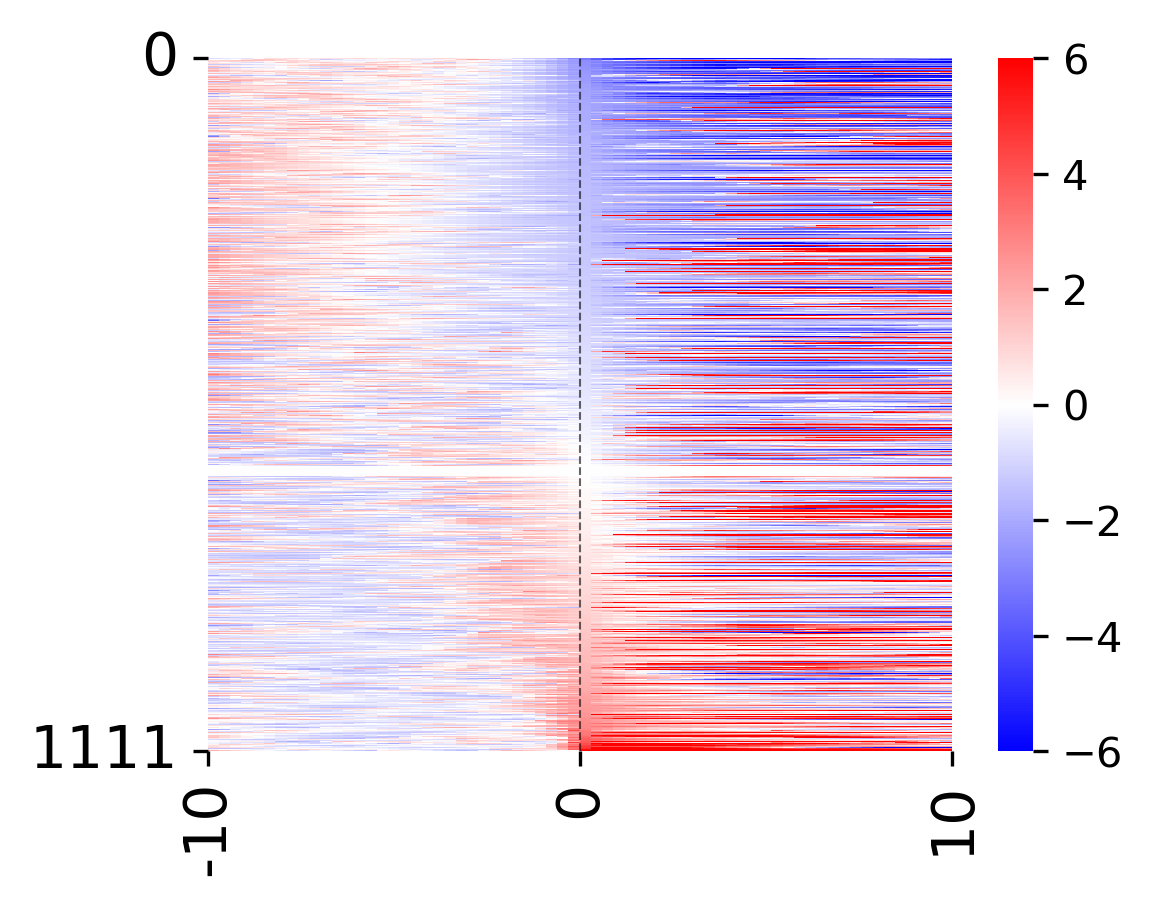

In [466]:
# Sorting and creating the heatmap
tracesorted = trace_hungry.sort_values(by=Bins_before, axis=0)
plt.figure(figsize=(4,3), dpi=300)
ax = sb.heatmap(tracesorted.iloc[:, 2:], vmin=-6, vmax=6, cmap="bwr")  # Exclude the last two columns (Animal_ID and cell_id)
ax.set_xticks([0, Bins_before, Bins])
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0, len(tracesorted)])
ax.set_yticklabels([0, len(tracesorted)])
ax.tick_params(labelsize = 14)
ax.axvline(Bins_before, ls = '--', lw = 0.5, c = 'black', alpha = 0.6)
print(f"{len(trace_hungry)} neurons in Combined")

plt.show()

In [577]:
def calculate_changes(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, num_shifts=1000, seed=999):
    random.seed(seed)
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) > 0.5)[0]) + 1
    if cue_range is not None:
        cueonset = cueonset[cue_range[0]:cue_range[1]]
    
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
#     trace = trace.sub(trace.mean(axis = 1), axis =0).divide(trace.std(axis = 1), axis =0)
    change_values_all = np.zeros((len(trace), num_shifts))

    for j in range(num_shifts):
        shift = random.randint(0, len(trace.columns))
        shifted_trace = np.roll(trace.values, shift, axis=1)
        tracenew = pd.DataFrame(0, index=trace.index, columns=np.arange(TotalFrame))

        # Use shifted_trace for calculations
        for i in range(TotalFrame):
            start = cueonset - FrameRange_before + i
            valid_starts = start[start >= 0]
            # Apply mean calculation on the shifted_trace
            tracenew.iloc[:,i] = shifted_trace[:, valid_starts].mean(axis=1)
        

        tracebin = tracenew.groupby(pd.cut(tracenew.columns, Bins), axis=1).mean()
        tracebin.columns = np.arange(0, Bins)
        
        # Calculate the mean and std, handle the situation of 0 std
        mean_vals = tracebin.iloc[:, 0:Bins_before].mean(axis=1)
        std_vals = tracebin.iloc[:, 0:Bins_before].std(axis=1)
        
        # Create a mask where the mean is < 0.001 or std is < 0.001
        low_variance_mask = (mean_vals < 0.001) | (std_vals < 0.001)

        # Replace std values that are 0 with NaN, as well as where the mean is < 0.001
        std_vals_replaced = std_vals.mask(low_variance_mask, np.nan)
    
        # Calculate z-scores, NaN will result in the z-scores where std is zero
        tracezscore = tracebin.sub(mean_vals, axis=0).divide(std_vals_replaced, axis=0)
        
        # Replace NaN z-scores with 0, as these are the ones with std of 0
        tracezscore = tracezscore.fillna(0)

        before_shift = tracezscore.iloc[:, (Bins_before - int(CompareRange_base * FR / BinSize)) : Bins_before].mean(axis=1)
        after_shift = tracezscore.iloc[:, Bins_before : (Bins_before + int(CompareRange_after * FR / BinSize))].mean(axis=1)
        change = after_shift - before_shift
        change_values_all[:, j] = change

    return change_values_all

def worker_process(data):
    FrameRange_before, TotalFrame, Bins, Bins_before, cue_range = data[0], data[1], data[2], data[3], data[4]
    return calculate_changes(data[5], FrameRange_before, TotalFrame, Bins, Bins_before, cue_range)

def parallel_process_and_calculate_change(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range):
    # Determining the number of processes based on available CPU cores
    num_processes = psutil.cpu_count(logical=False)

    # Create a multiprocessing pool and process data
    pool = multiprocessing.Pool(processes=num_processes)
    results = pool.map(worker_process, [(FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df) for df in all_dataframes])
    pool.close()
    pool.join()

    # Flatten list of results and convert to DataFrame
    final_df = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)
    return final_df


# The final_results_df contains the calculated changes for each DataFrame


In [730]:
%%time
change_shift_hungry = parallel_process_and_calculate_change(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)

CPU times: user 234 ms, sys: 887 ms, total: 1.12 s
Wall time: 1min 40s


In [731]:
change_shift_hungry

0         1         2         3         4         5         6    \
0    -0.291861 -0.029177 -0.120818 -0.104226 -0.360404 -0.598465  0.365329   
1    -0.019739 -0.215153 -0.488061 -0.474726 -0.594678  0.034852 -0.681923   
2    -0.220855  0.012197 -0.156743  3.597608 -0.489334 -0.363189  0.380909   
3    -0.197066  4.194588 -0.622457  5.105797 -0.645121 -0.059097  2.090537   
4    -0.237290 -0.263945 -0.327690 -0.196645 -0.074094  0.222318 -0.104833   
...        ...       ...       ...       ...       ...       ...       ...   
1106  1.741515 -0.047931 -0.047931 -0.047931 -0.292095 -0.047931 -0.078862   
1107 -0.310638  0.092976  4.474518  1.049638  0.781139 -0.276113 -0.106118   
1108  0.000000  0.000000 -0.426319 -0.288454  0.000000  0.000000  0.000000   
1109 -0.009737 -0.224863 -1.302487 -0.385015  0.000000 -0.140900 -0.652283   
1110  0.000000  0.000000  0.000000  0.000000  0.000000 -0.026804 -0.071725   

           7         8         9    ...       990       991       992  \
0    -0.187236 -0.801763 -0.426976  ... -0.165383  0.059742 -0.083226   
1    -0.003271  0.509409 -0.900389  ...  0.134835 -0.263499  1.941947   
2     0.150661 -0.842143  0.749643  ... -1.223584 -0.253833  4.241336   
3    -0.461491  2.638460 -0.756467  ... -0.697820 -0.581558 -0.229366   
4     0.704844  0.388417 -1.234293  ... -0.666801  1.149331 -0.230807   
...        ...       ...       ...  ...       ...       ...       ...   
1106 -0.047931  0.249600  2.684695  ... -0.138472 -0.068383 -0.047931   
1107 -0.513377  0.000000  0.000000  ... -0.057767 -0.203898 -0.123616   
1108  0.000000  0.000000 -0.992445  ... -0.017143  0.000000  0.000000   
1109 -0.053099 -0.013162 -0.337551  ...  0.187958 -0.009737 -1.278823   
1110 -0.026804  0.000000 -0.027467  ... -0.026804 -0.067596 -0.026804   

           993       994       995        996       997       998       999  
0     0.283091  1.033804  0.231668  -0.713814 -0.340221  0.595702  0.098981  
1    -0.409153  0.878413  0.508045  -0.700178 -0.174404  0.601105 -0.133053  
2    -1.052989 -0.202391  1.244514   0.888498 -0.097579  0.186473 -0.084289  
3     3.833900 -0.001994  2.341637   0.115643 -0.290996  5.293471  0.025339  
4     0.016099  0.186817 -0.166420   0.191579  0.897622 -0.808725 -0.087421  
...        ...       ...       ...        ...       ...       ...       ...  
1106 -0.047931 -0.548558  0.000000  -0.420841 -0.301392  0.394456 -0.765297  
1107 -0.113830  0.006649 -0.199375  16.839236 -0.234444 -0.287652 -0.151544  
1108  0.000000  0.000000  0.000000  -0.227008  0.000000 -0.022752 -0.275860  
1109 -0.205732  0.000000 -0.041956  -0.597765  0.000000  0.831093 -0.878474  
1110  0.000000  0.000000  0.000000  -0.065746 -0.318203 -0.153795  0.000000  

[1111 rows x 1000 columns]

In [732]:
before_hungry = trace_hungry.iloc[:, (Bins_before - int(CompareRange_base * FR / BinSize)+2) : Bins_before+2]
after_hungry = trace_hungry.iloc[:,Bins_before+2:(Bins_before+int(CompareRange_after*FR/BinSize)+2)]
change_hungry = after_hungry.mean(axis= 1) - before_hungry.mean(axis=1)

excited_hungry = pd.DataFrame()
inhibited_hungry = pd.DataFrame()
excitedsem_hungry = pd.DataFrame()
inhibitedsem_hungry = pd.DataFrame()

excited_indices = []
inhibited_indices = []

for i in range(len(trace_hungry)):
    change = change_hungry.iloc[i]
    change_dist = change_shift_hungry.iloc[i, :]

    if change > np.quantile(change_dist, 0.975): 
        excited_indices.append(i)
    elif change < np.quantile(change_dist, 0.025): 
        inhibited_indices.append(i)

# Using .iloc to select rows and then concat to form the final DataFrame
excited_hungry = pd.concat([trace_hungry.iloc[i] for i in excited_indices], axis=1).T
inhibited_hungry = pd.concat([trace_hungry.iloc[i] for i in inhibited_indices], axis=1).T

excited_hungry = excited_hungry[(excited_hungry.iloc[:,Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]>1.645).any(axis =1)]
inhibited_hungry = inhibited_hungry[(inhibited_hungry.iloc[:, Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]<1.645).any(axis =1)]


excited_hungry_mean = excited_hungry.iloc[:,2:].mean(axis=0).astype('float')
excited_hungry_sem = excited_hungry.iloc[:,2:].sem(axis=0).astype('float')
inhibited_hungry_mean = inhibited_hungry.iloc[:,2:].mean(axis=0).astype('float')
inhibited_hungry_sem = inhibited_hungry.iloc[:,2:].sem(axis=0).astype('float')

excited_hungry_median = excited_hungry.iloc[:,2:].median(axis=0).astype('float')
excited_hungry_mad =  excited_hungry.iloc[:,2:].sub(excited_hungry_median, axis=0).abs().median(axis=0).astype('float')

In [733]:
excited_hungry_mean

0      0.448581
1      0.339359
2      0.326456
3      0.321738
4      0.284676
        ...    
61    18.677194
62    19.501862
63    21.562177
64    21.224435
65    20.521693
Length: 66, dtype: float64

39

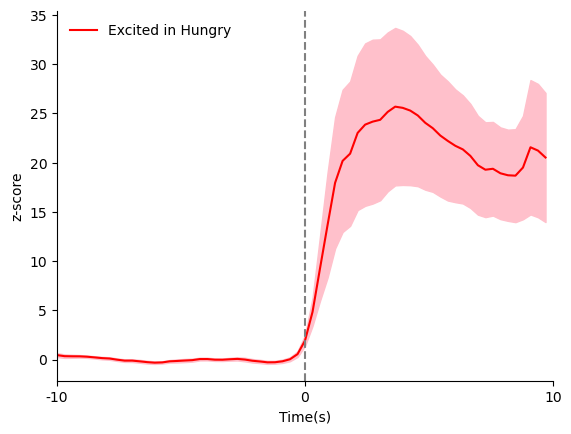

In [734]:
x=np.arange(Bins)
y=excited_hungry_mean
err = excited_hungry_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 2, framealpha = 0)
len(excited_hungry)

44

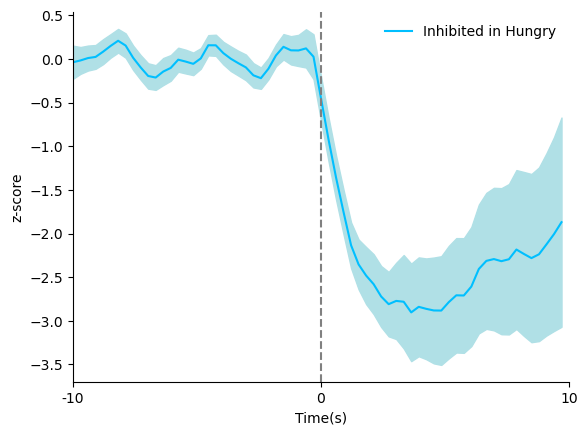

In [735]:
x=np.arange(Bins)
y=inhibited_hungry_mean
err = inhibited_hungry_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue', linestyle = '-')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
# ax.set_ylim(-,1)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


39

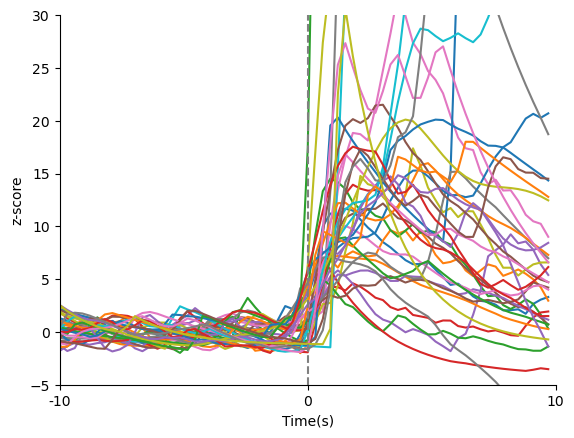

In [736]:
x=np.arange(Bins)
y=excited_hungry.iloc[:,2:]
err = excited_hungry_sem
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-5,30)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


44

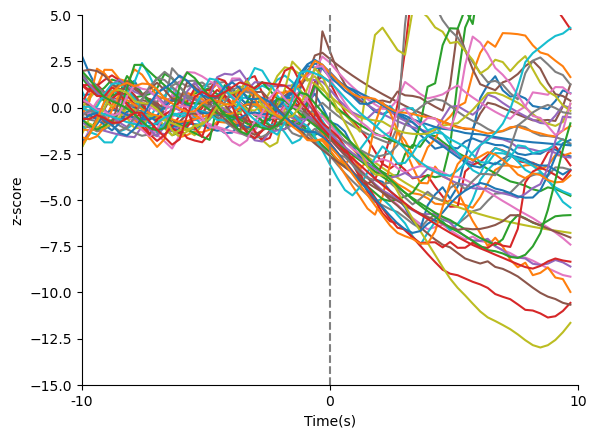

In [737]:
x=np.arange(Bins)
y=inhibited_hungry.iloc[:,2:]
err = inhibited_hungry_sem
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-15,5)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry)

[Text(0, 0, '0'), Text(0, 44, '44')]

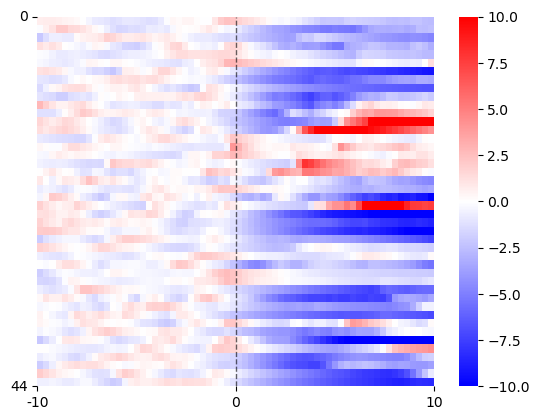

In [738]:
# Calculate the count of bins with value > 2 after int(Bins/2) for each neuron
inhibited_hungry_sort = inhibited_hungry.copy()
inhibited_hungry_sort['count_gt_2'] = (inhibited_hungry_sort.iloc[:, Bins_before + 2:].astype('float') < -1.98).sum(axis=1)

# Sort the DataFrame based on this count
inhibited_hungry_sorted = inhibited_hungry_sort.sort_values(by='count_gt_2', ascending=True).drop('count_gt_2', axis=1)

ax = sb.heatmap(inhibited_hungry.iloc[:,2:].astype('float'), vmin = -10, vmax= 10, cmap = "bwr")
ax.set_xticks([0,Bins_before,Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(inhibited_hungry_sorted)])
ax.set_yticklabels([0, len(inhibited_hungry_sorted)])

[Text(0, 0, '0'), Text(0, 39, '39')]

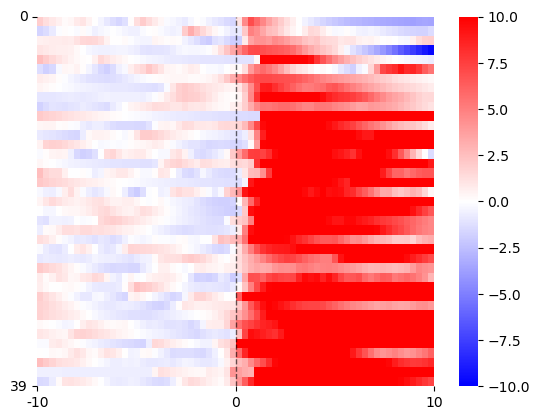

In [739]:
# Calculate the count of bins with value > 2 after int(Bins/2) for each neuron
excited_hungry_sort = excited_hungry.copy()
excited_hungry_sort['count_gt_2'] = (excited_hungry_sort.iloc[:, Bins_before + 2:].astype('float') > 1.98).sum(axis=1)

# Sort the DataFrame based on this count
excited_hungry_sorted = excited_hungry_sort.sort_values(by='count_gt_2', ascending=True).drop('count_gt_2', axis=1)

ax = sb.heatmap(excited_hungry_sorted.iloc[:,2:].astype('float'), vmin = -10, vmax= 10, cmap = "bwr")
ax.set_xticks([0,Bins_before,Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(excited_hungry_sorted)])
ax.set_yticklabels([0, len(excited_hungry_sorted)])

In [726]:
len(all_dataframes)

19

In [727]:
len(np.unique(inhibited_hungry.Animal_ID))

15

In [728]:
len(np.unique(excited_hungry.Animal_ID))

13

## Aligning to -15s before the cueonsets 

In [630]:
def calculate_traces_zscore_30sbefore(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=None):
    # Identifying cue onsets
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) - int(30*FR)
    if cue_range is not None:
        # Select a subset of cueonset based on cue_range
        cueonset = cueonset[cue_range[0]:cue_range[1]]
    
    # Select rows where 'cell_id' is numeric and columns from the third column onwards
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
#     trace = trace.sub(trace.mean(axis = 1), axis = 0).divide(trace.std(axis = 1), axis = 0)

    tracenew = pd.DataFrame(0, index=trace.index, columns=np.arange(TotalFrame))

    # Aligning traces based on cue onset
    for i in range(TotalFrame):
        start = cueonset - FrameRange_before + i
        valid_starts = start[start >= 0]  # Ensure start is not negative
        tracenew.iloc[:, i] = trace.iloc[:, valid_starts].mean(axis=1)

    # Bin the traces
    tracebin = tracenew.groupby(pd.cut(tracenew.columns, Bins), axis=1).mean()
    tracebin.columns = np.arange(0, Bins)
    
    # Calculate the mean and std, handle the situation of 0 std
    mean_vals = tracebin.iloc[:, 0:Bins_before].mean(axis=1)
    std_vals = tracebin.iloc[:, 0:Bins_before].std(axis=1)
    
    # Create a mask where the mean is < 0.001 or std is < 0.001
    low_variance_mask = (mean_vals < 0.001) | (std_vals < 0.001)
    
    # Replace std values that are 0 with NaN, as well as where the mean is < 0.001
    std_vals_replaced = std_vals.mask(low_variance_mask, np.nan)
    
    # Calculate z-scores, NaN will result in the z-scores where std is zero
    tracezscore = tracebin.sub(mean_vals, axis=0).divide(std_vals_replaced, axis=0)
    
    # Replace NaN z-scores with 0, as these are the ones with std of 0
    tracezscore = tracezscore.fillna(0)

    return tracebin, tracezscore


In [631]:
hungrycue = (0, 12)

# Create a list to hold the dataframes
trace_hungry_list = []
trace_hungry_list_c = []

# Loop through each animal's DataFrame
for df in all_dataframes:
    animal_id = df['Animal_ID'].iloc[0]  # Extract animal ID
    cell_ids = df['cell_id']  # Extract cell IDs

    tracebin, tracesub = calculate_traces_zscore_30sbefore(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)
    tracesub['Animal_ID'] = animal_id  # Add animal ID
    tracesub['cell_id'] = cell_ids  # Add cell IDs
    tracebin['Animal_ID'] = animal_id  # Add animal ID
    tracebin['cell_id'] = cell_ids  # Add cell IDs
    
    # Reorder columns to make 'Animal_ID' front
    columns = ['Animal_ID', 'cell_id'] + [col for col in tracesub.columns if col not in ['Animal_ID', 'cell_id']]
    tracesub = tracesub[columns]
    columns = ['Animal_ID', 'cell_id'] + [col for col in tracebin.columns if col not in ['Animal_ID', 'cell_id']]
    tracebin = tracebin[columns]
    
    trace_hungry_list.append(tracesub)
    trace_hungry_list_c.append(tracebin)

# Concatenate all dataframes in the list
trace_hungry_30s = pd.concat(trace_hungry_list, ignore_index=True)
trace_hungry_c_30s = pd.concat(trace_hungry_list_c, ignore_index=True)




In [632]:
trace_hungry_30s

Animal_ID cell_id         0         1         2         3         4  \
0          6S5       1  1.866525  1.588815  1.343645  1.274515  1.250428   
1          6S5       2  0.594082  0.579038  0.649667  0.418160  0.842026   
2          6S5       3  2.276704  2.004590  1.799576  1.641357  1.431087   
3          6S5       4 -1.425077 -1.567902 -1.590245 -1.664888 -1.414161   
4          6S5       5 -0.737119 -0.761982 -0.849819 -0.977900 -0.893028   
...        ...     ...       ...       ...       ...       ...       ...   
1106       8H6      63 -1.206113 -1.206812 -1.207399 -1.207936  0.014612   
1107       8H6      71 -2.666516 -2.094141 -1.116412 -0.766345 -0.950513   
1108       8H6      73  2.798212  2.310925  1.919094  1.575196  1.273366   
1109       8H6      75  2.961825  2.390258  1.941128  1.555417  1.224171   
1110       8H6      97  0.000000  0.000000  0.000000  0.000000  0.000000   

             5         6         7  ...        56        57        58  \
0     1.019246  0.952913  0.932117  ...  0.608239  0.403603  0.207425   
1     1.016898  0.856959  1.001863  ... -1.913711 -1.888528 -1.504795   
2     1.188974  0.949480  0.712577  ... -2.326857 -2.481560 -2.580819   
3    -1.119542 -1.043155 -0.669390  ... -1.832773 -1.940575 -2.041963   
4    -0.815573 -0.401508  0.293205  ...  3.418913  3.155083  2.814500   
...        ...       ...       ...  ...       ...       ...       ...   
1106  2.364655  2.087687  1.807073  ...  0.125719  0.011869 -0.092304   
1107 -0.730809 -0.254492 -0.083032  ... -0.817538 -1.115207 -1.327354   
1108  1.008457  0.775955  0.571894  ... -0.889857 -0.890144 -0.890395   
1109  0.939698  0.695395  0.485588  ... -0.789736 -0.789834 -0.789919   
1110  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

            59        60         61         62        63        64         65  
0     0.068713 -0.067261  -0.235203  -0.397781 -0.560832 -0.717144  -0.879105  
1    -0.788252 -0.856077  -0.722288  -0.584799 -0.634610 -0.600843  -0.470140  
2    -2.779540 -2.953546  -3.099450  -3.145005 -3.213832 -3.340376  -3.433602  
3    -2.137317 -2.226997  -2.311341  -2.390665 -2.465269 -2.535433  -2.606682  
4     2.600321  2.294786   1.838902   1.436605  1.077355  0.903794   0.906399  
...        ...       ...        ...        ...       ...       ...        ...  
1106 -0.187622  0.181299   7.792494   8.616104  7.780587  7.016088   6.261920  
1107 -1.211979 -1.396741  -1.287082  -1.538717 -1.780358 -2.003226  -2.070914  
1108 -0.890616 -0.890810  -0.890980  -0.891130 -0.891261 -0.891376  -0.891484  
1109 -0.789992 -0.445087  10.944863  10.224975  8.669542  7.333745  29.453141  
1110  0.000000  0.000000   0.000000   0.000000  0.000000  0.000000   0.000000  

[1111 rows x 68 columns]

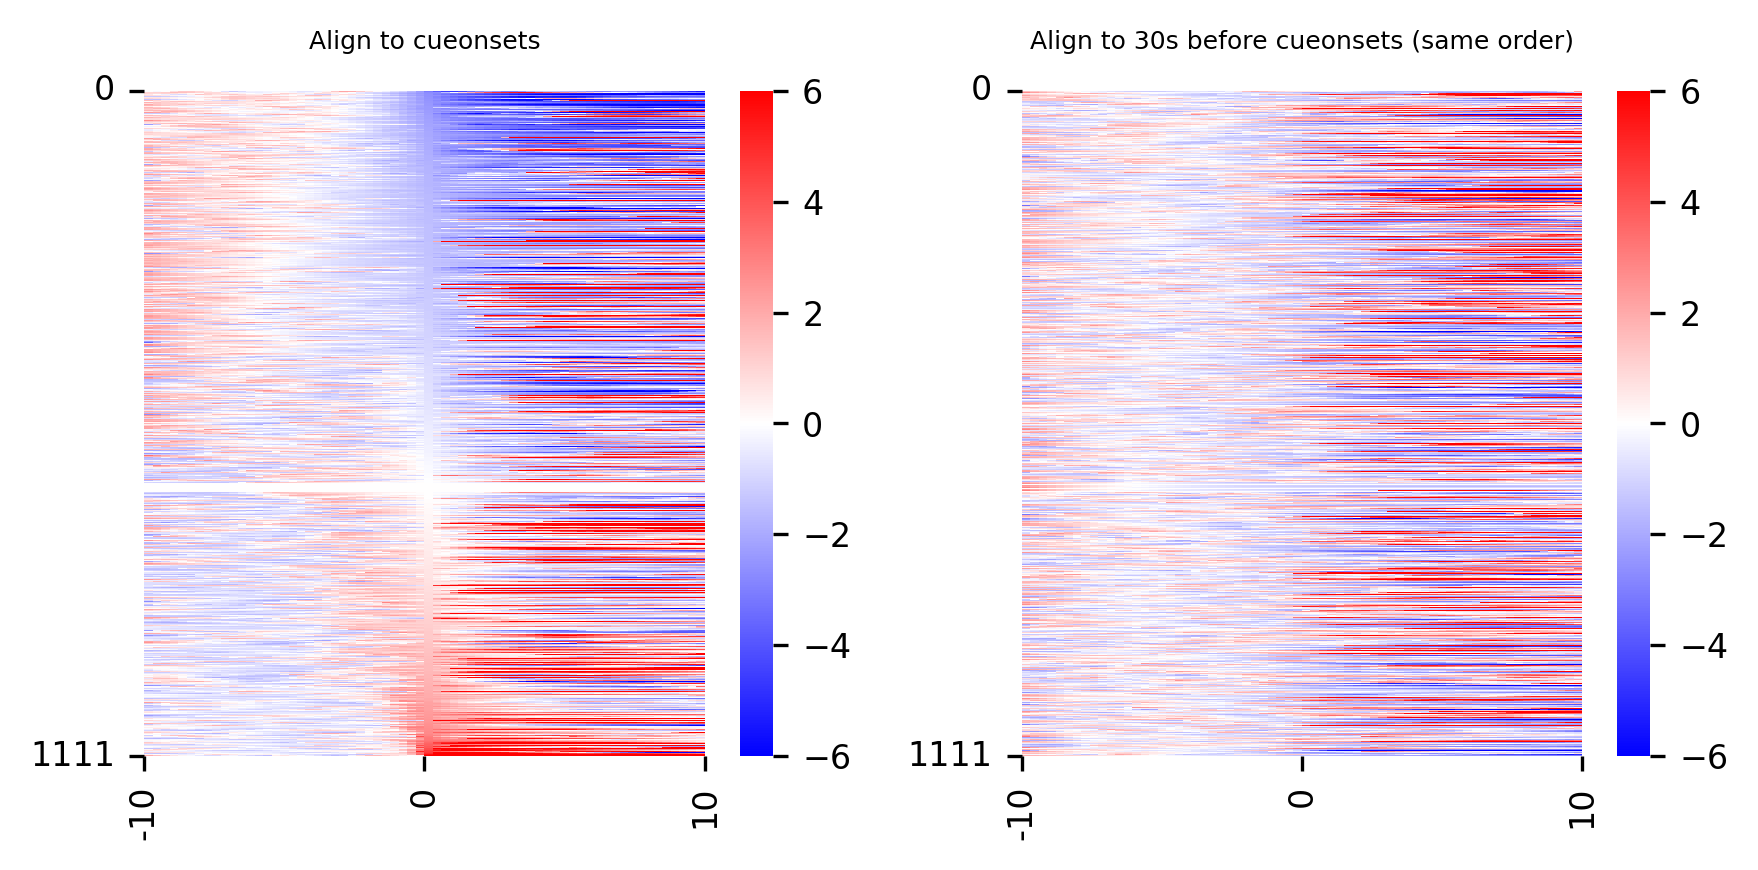

In [633]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,3), dpi=300)
tracesorted = trace_hungry.sort_values(by=Bins_before, axis=0)
sb.heatmap(tracesorted.iloc[:, 2:], vmin=-6, vmax=6, cmap="bwr",ax = ax1)  # Exclude the last two columns (Animal_ID and cell_id)
ax1.set_xticks([0, Bins_before, Bins])
ax1.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax1.set_yticks([0, len(tracesorted)])
ax1.set_yticklabels([0, len(tracesorted)])
ax1.set_title('Align to cueonsets',fontsize =6, pad = 10)
ax1.tick_params(labelsize = 8)
# Change font size of colorbar labels for the first heatmap
cbar1 = ax1.collections[0].colorbar
cbar1.ax.tick_params(labelsize=8) 

tracesorted_30s = trace_hungry_30s.reindex(tracesorted.index)
sb.heatmap(tracesorted_30s.iloc[:, 2:], vmin=-6, vmax=6, cmap="bwr", ax = ax2)  # Exclude the last two columns (Animal_ID and cell_id)
ax2.set_xticks([0, Bins_before, Bins])
ax2.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax2.set_yticks([0, len(tracesorted)])
ax2.set_yticklabels([0, len(tracesorted)])
ax2.set_title('Align to 30s before cueonsets (same order)', fontsize =6, pad = 10)
ax2.tick_params(labelsize = 8)
cbar2 = ax2.collections[0].colorbar
cbar2.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()

1111 neurons in Combined


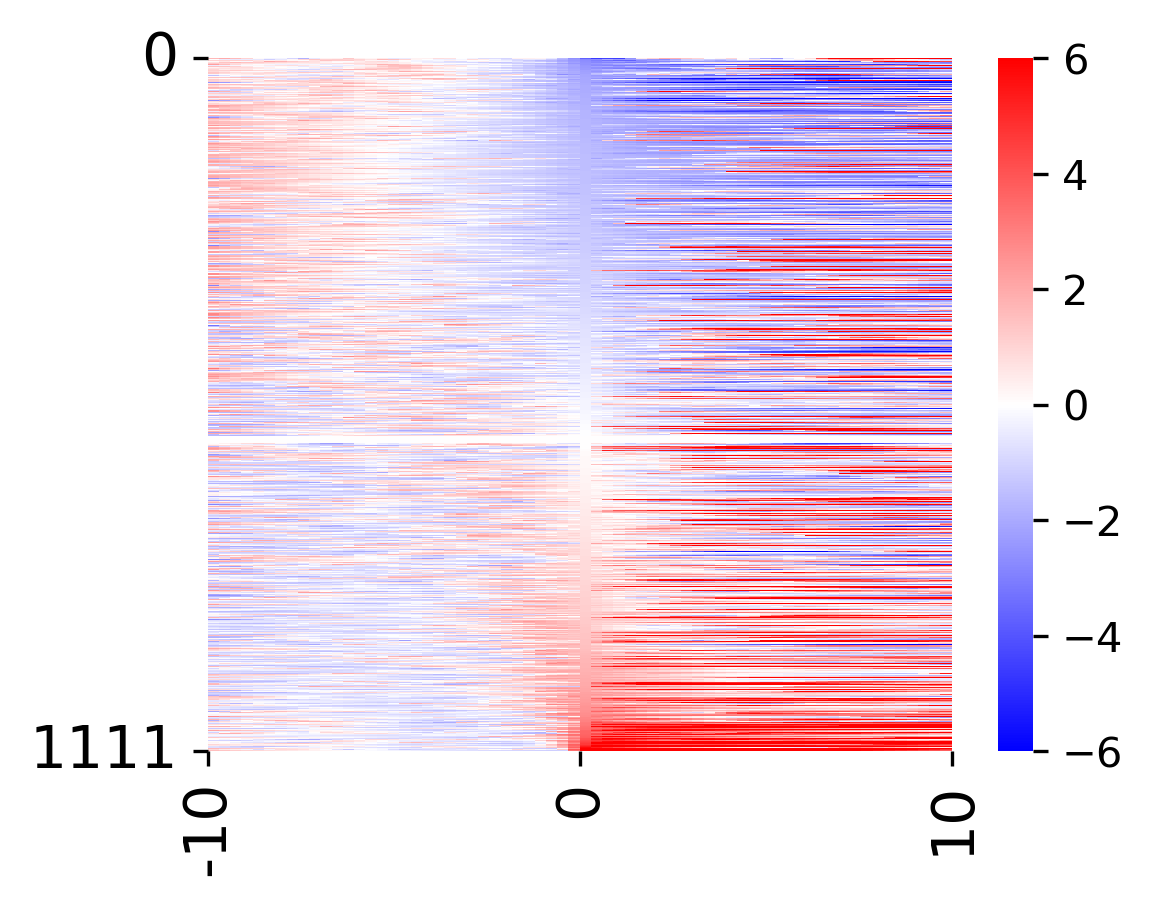

In [634]:
# Sorting and creating the heatmap
tracesorted_30s = trace_hungry_30s.sort_values(by=Bins_before, axis=0)
plt.figure(figsize=(4,3), dpi=300)
ax = sb.heatmap(tracesorted_30s.iloc[:, 2:], vmin=-6, vmax=6, cmap="bwr")  # Exclude the last two columns (Animal_ID and cell_id)
ax.set_xticks([0, Bins_before, Bins])
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0, len(tracesorted)])
ax.set_yticklabels([0, len(tracesorted)])
ax.tick_params(labelsize = 14)
print(f"{len(trace_hungry)} neurons in Combined")

plt.show()

In [635]:
def calculate_changes_30s(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, num_shifts=1000, seed=999):
    random.seed(seed)
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) > 0.5)[0]) + 1 - int(30*FR)
    if cue_range is not None:
        cueonset = cueonset[cue_range[0]:cue_range[1]]
    
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
#     trace = trace.sub(trace.mean(axis = 1), axis =0).divide(trace.std(axis = 1), axis =0)
    change_values_all = np.zeros((len(trace), num_shifts))

    for j in range(num_shifts):
        shift = random.randint(0, len(trace.columns))
        shifted_trace = np.roll(trace.values, shift, axis=1)
        tracenew = pd.DataFrame(0, index=trace.index, columns=np.arange(TotalFrame))

        # Use shifted_trace for calculations
        for i in range(TotalFrame):
            start = cueonset - FrameRange_before + i
            valid_starts = start[start >= 0]
            # Apply mean calculation on the shifted_trace
            tracenew.iloc[:,i] = shifted_trace[:, valid_starts].mean(axis=1)
        

        tracebin = tracenew.groupby(pd.cut(tracenew.columns, Bins), axis=1).mean()
        tracebin.columns = np.arange(0, Bins)
        
        # Calculate the mean and std, handle the situation of 0 std
        mean_vals = tracebin.iloc[:, 0:Bins_before].mean(axis=1)
        std_vals = tracebin.iloc[:, 0:Bins_before].std(axis=1)
        
        # Create a mask where the mean is < 0.001 or std is < 0.001
        low_variance_mask = (mean_vals < 0.001) | (std_vals < 0.001)

        # Replace std values that are 0 with NaN, as well as where the mean is < 0.001
        std_vals_replaced = std_vals.mask(low_variance_mask, np.nan)
    
        # Calculate z-scores, NaN will result in the z-scores where std is zero
        tracezscore = tracebin.sub(mean_vals, axis=0).divide(std_vals_replaced, axis=0)
        
        # Replace NaN z-scores with 0, as these are the ones with std of 0
        tracezscore = tracezscore.fillna(0)

        before_shift = tracezscore.iloc[:, (Bins_before - int(CompareRange_base * FR / BinSize)) : Bins_before].mean(axis=1)
        after_shift = tracezscore.iloc[:, Bins_before : (Bins_before + int(CompareRange_after * FR / BinSize))].mean(axis=1)
        change = after_shift - before_shift
        change_values_all[:, j] = change

    return change_values_all

def worker_process(data):
    FrameRange_before, TotalFrame, Bins, Bins_before, cue_range = data[0], data[1], data[2], data[3], data[4]
    return calculate_changes_30s(data[5], FrameRange_before, TotalFrame, Bins, Bins_before, cue_range)

def parallel_process_and_calculate_change(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range):
    # Determining the number of processes based on available CPU cores
    num_processes = psutil.cpu_count(logical=False)

    # Create a multiprocessing pool and process data
    pool = multiprocessing.Pool(processes=num_processes)
    results = pool.map(worker_process, [(FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df) for df in all_dataframes])
    pool.close()
    pool.join()

    # Flatten list of results and convert to DataFrame
    final_df = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)
    return final_df


# The final_results_df contains the calculated changes for each DataFrame


In [636]:
%%time
change_shift_hungry_30s = parallel_process_and_calculate_change(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)

CPU times: user 214 ms, sys: 812 ms, total: 1.03 s
Wall time: 1min 41s


In [637]:
change_shift_hungry_30s

0         1         2         3         4         5         6    \
0    -0.291861 -0.029177 -0.120818 -0.104226 -0.360404 -0.598465  0.365329   
1    -0.019739 -0.215153 -0.488061 -0.474726 -0.594678  0.034852 -0.681923   
2    -0.220855  0.012197 -0.156743  3.597608 -0.489334 -0.363189  0.380909   
3    -0.197066  4.194588 -0.622457  5.105797 -0.645121 -0.059097  2.090537   
4    -0.237290 -0.263945 -0.327690 -0.196645 -0.074094  0.222318 -0.104833   
...        ...       ...       ...       ...       ...       ...       ...   
1106  1.741515 -0.047931 -0.047931 -0.047931 -0.292095 -0.047931 -0.078862   
1107 -0.310638  0.092976  4.474518  1.049638  0.781139 -0.276113 -0.106118   
1108  0.000000  0.000000 -0.426319 -0.288454  0.000000  0.000000  0.000000   
1109 -0.009737 -0.224863 -1.302487 -0.385015  0.000000 -0.140900 -0.652283   
1110  0.000000  0.000000  0.000000  0.000000  0.000000 -0.026804 -0.071725   

           7         8         9    ...       990       991       992  \
0    -0.187236 -0.801763 -0.426976  ... -0.165383  0.059742 -0.083226   
1    -0.003271  0.509409 -0.900389  ...  0.134835 -0.263499  1.941947   
2     0.150661 -0.842143  0.749643  ... -1.223584 -0.253833  4.241336   
3    -0.461491  2.638460 -0.756467  ... -0.697820 -0.581558 -0.229366   
4     0.704844  0.388417 -1.234293  ... -0.666801  1.149331 -0.230807   
...        ...       ...       ...  ...       ...       ...       ...   
1106 -0.047931  0.249600  2.684695  ... -0.138472 -0.068383 -0.047931   
1107 -0.513377  0.000000  0.000000  ... -0.057767 -0.203898 -0.123616   
1108  0.000000  0.000000 -0.992445  ... -0.017143  0.000000  0.000000   
1109 -0.053099 -0.013162 -0.337551  ...  0.187958 -0.009737 -1.278823   
1110 -0.026804  0.000000 -0.027467  ... -0.026804 -0.067596 -0.026804   

           993       994       995        996       997       998       999  
0     0.283091  1.033804  0.231668  -0.713814 -0.340221  0.595702  0.098981  
1    -0.409153  0.878413  0.508045  -0.700178 -0.174404  0.601105 -0.133053  
2    -1.052989 -0.202391  1.244514   0.888498 -0.097579  0.186473 -0.084289  
3     3.833900 -0.001994  2.341637   0.115643 -0.290996  5.293471  0.025339  
4     0.016099  0.186817 -0.166420   0.191579  0.897622 -0.808725 -0.087421  
...        ...       ...       ...        ...       ...       ...       ...  
1106 -0.047931 -0.548558  0.000000  -0.420841 -0.301392  0.394456 -0.765297  
1107 -0.113830  0.006649 -0.199375  16.839236 -0.234444 -0.287652 -0.151544  
1108  0.000000  0.000000  0.000000  -0.227008  0.000000 -0.022752 -0.275860  
1109 -0.205732  0.000000 -0.041956  -0.597765  0.000000  0.831093 -0.878474  
1110  0.000000  0.000000  0.000000  -0.065746 -0.318203 -0.153795  0.000000  

[1111 rows x 1000 columns]

In [638]:
before_hungry = trace_hungry_30s.iloc[:, (Bins_before - int(CompareRange_base * FR / BinSize)+2) : Bins_before+2]
after_hungry = trace_hungry_30s.iloc[:,Bins_before+2:(Bins_before+int(CompareRange_after*FR/BinSize)+2)]
change_hungry = after_hungry.mean(axis= 1) - before_hungry.mean(axis=1)

excited_hungry_30s = pd.DataFrame()
inhibited_hungry_30s = pd.DataFrame()


excited_indices_30s = []
inhibited_indices_30s = []

for i in range(len(trace_hungry_30s)):
    change = change_hungry.iloc[i]
    change_dist = change_shift_hungry_30s.iloc[i, :]

    if change > np.quantile(change_dist, 0.975): 
        excited_indices_30s.append(i)
    elif change < np.quantile(change_dist, 0.025): 
        inhibited_indices_30s.append(i)

# Using .iloc to select rows and then concat to form the final DataFrame
excited_hungry_30s = pd.concat([trace_hungry_30s.iloc[i] for i in excited_indices_30s], axis=1).T
inhibited_hungry_30s = pd.concat([trace_hungry_30s.iloc[i] for i in inhibited_indices_30s], axis=1).T

excited_hungry_30s = excited_hungry_30s[(excited_hungry_30s.iloc[:,Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]>1.645).any(axis =1)]
inhibited_hungry_30s = inhibited_hungry_30s[(inhibited_hungry_30s.iloc[:, Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]<1.645).any(axis =1)]


excited_hungry_mean_30s = excited_hungry_30s.iloc[:,2:].mean(axis=0).astype('float')
excited_hungry_sem_30s = excited_hungry_30s.iloc[:,2:].sem(axis=0).astype('float')
inhibited_hungry_mean_30s = inhibited_hungry_30s.iloc[:,2:].mean(axis=0).astype('float')
inhibited_hungry_sem_30s = inhibited_hungry_30s.iloc[:,2:].sem(axis=0).astype('float')


In [639]:
excited_hungry_mean_30s

0     0.764779
1     0.773957
2     0.627621
3     0.524353
4     0.474396
        ...   
61    9.499769
62    9.694944
63    9.436480
64    9.153017
65    8.814474
Length: 66, dtype: float64

32

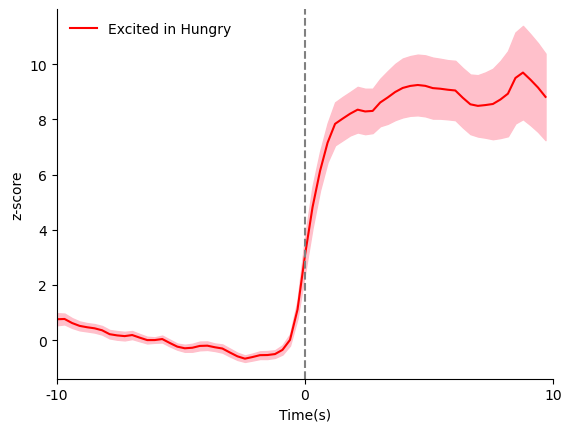

In [640]:
x=np.arange(Bins)
y=excited_hungry_mean_30s
err = excited_hungry_sem_30s
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 2, framealpha = 0)
len(excited_hungry_30s)

39

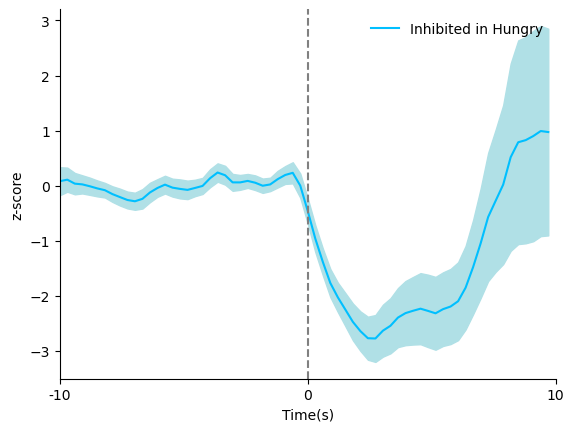

In [641]:
x=np.arange(Bins)
y=inhibited_hungry_mean_30s
err = inhibited_hungry_sem_30s
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue', linestyle = '-')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
# ax.set_ylim(-,1)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry)

In [642]:
total_cells = len(trace_hungry_30s)

# Calculate percentages
percent_excited_30s = len(excited_indices_30s) / total_cells * 100
percent_inhibited_30s = len(inhibited_indices_30s) / total_cells * 100

# Assuming excited_indices contains the indices for excited cells from the original trace_hungry DataFrame
percent_excited = len(excited_indices) / total_cells * 100

# Find the intersection (cells that are in both excited_indices_30s and excited_indices)
common_excited_indices = set(excited_indices_30s).intersection(set(excited_indices))
percent_common_excited = len(common_excited_indices) / total_cells * 100

common_inhibited_indices = set(inhibited_indices_30s).intersection(set(inhibited_indices))
percent_common_inhibited = len(common_inhibited_indices) / total_cells * 100

excited_inhibited30s_indices = set(excited_indices).intersection(set(inhibited_indices_30s))
percent_excited_inhibited30s = len(excited_inhibited30s_indices) / total_cells * 100

inhibited_excited30s_indices = set(inhibited_indices).intersection(set(excited_indices_30s))
percent_inhibited_excited30s = len(inhibited_excited30s_indices) / total_cells * 100

# Printing the results
print(f"Percentage of excited cells (30s): {percent_excited_30s:.2f}%")
print(f"Percentage of inhibited cells (30s): {percent_inhibited_30s:.2f}%")
print(f"Percentage of excited cells: {percent_excited:.2f}%")
print(f"Percentage of cells excited in both cases: {percent_common_excited:.2f}%")
print(f"Percentage of cells inhibited in both cases: {percent_common_inhibited:.2f}%")
print(f"Percentage of cells excited in hungry cues and inhibited 30s before: {percent_excited_inhibited30s:.2f}%")
print(f"Percentage of cells inhibited in hungry cues and excited 30s before: {percent_inhibited_excited30s:.2f}%")



Percentage of excited cells (30s): 2.97%
Percentage of inhibited cells (30s): 3.24%
Percentage of excited cells: 3.33%
Percentage of cells excited in both cases: 0.00%
Percentage of cells inhibited in both cases: 0.09%
Percentage of cells excited in hungry cues and inhibited 30s before: 0.18%
Percentage of cells inhibited in hungry cues and excited 30s before: 0.09%


In [643]:
common_excited_indices

set()

In [644]:
common_inhibited_indices

{761}

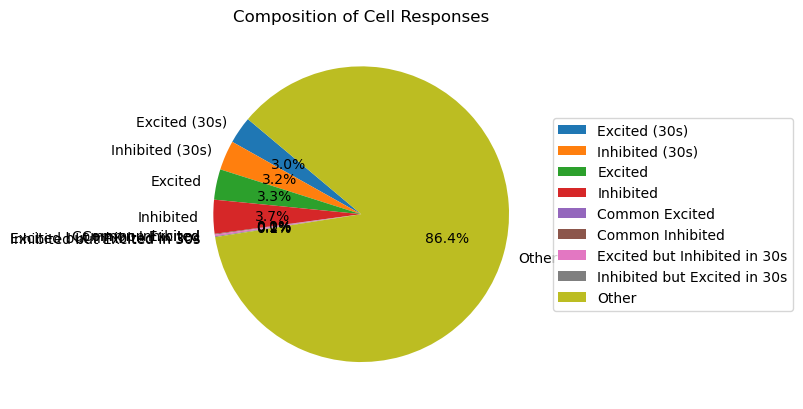

In [645]:
# Assuming you have the total number of cells and the counts for each category
total_cells = len(trace_hungry_30s.index)
excited_30s_count = len(excited_indices_30s)
inhibited_30s_count = len(inhibited_indices_30s)
excited_count = len(excited_indices)
inhibited_count = len(inhibited_indices)
common_excited_count = len(set(excited_indices_30s).intersection(set(excited_indices)))
common_inhibited_count = len(set(inhibited_indices_30s).intersection(set(inhibited_indices)))
excited_inhibited30s_count = len(set(excited_indices).intersection(set(inhibited_indices_30s)))
inhibited_excited30s_count = len(set(inhibited_indices).intersection(set(excited_indices_30s)))

# Calculate the count of cells not in any of the above categories
other_count = total_cells - (excited_30s_count + inhibited_30s_count + excited_count + inhibited_count + common_excited_count + common_inhibited_count + excited_inhibited30s_count + inhibited_excited30s_count)

# Calculate percentages
percentages = {
    "Excited (30s)": excited_30s_count / total_cells * 100,
    "Inhibited (30s)": inhibited_30s_count / total_cells * 100,
    "Excited": excited_count / total_cells * 100,
    "Inhibited": inhibited_count / total_cells * 100,
    "Common Excited": common_excited_count / total_cells * 100,
    "Common Inhibited": common_inhibited_count / total_cells * 100,
    "Excited but Inhibited in 30s": excited_inhibited30s_count / total_cells * 100,
    "Inhibited but Excited in 30s": inhibited_excited30s_count / total_cells * 100,
    "Other": other_count / total_cells * 100
}

# Code to create a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(percentages.values(), labels=percentages.keys(), autopct='%1.1f%%', startangle=140)

# Draw a legend with some space around each entry
ax.legend(wedges, percentages.keys(), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Composition of Cell Responses')
plt.show()





In [646]:
trace_hungry_30s.iloc[761]

Animal_ID         1S5
cell_id            15
0            -2.54154
1           -2.355452
2           -1.736023
               ...   
61          -7.599729
62           -7.60043
63          -7.600969
64          -7.976876
65           -8.38227
Name: 761, Length: 68, dtype: object

In [647]:
all_dataframes[12].iloc[10]

Animal_ID            1S5
cell_id               15
0                    0.0
1                    0.0
2                    0.0
                ...     
30135        1363.544589
30136        1355.053473
30137        1346.615233
30138        1338.229541
30139        1329.896068
Name: 10, Length: 30142, dtype: object

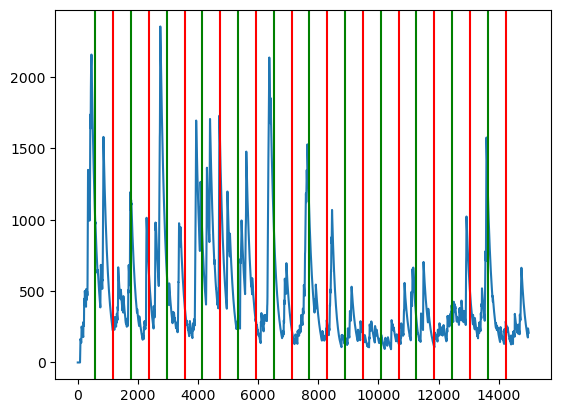

In [648]:
df = all_dataframes[12]
cue_range = hungrycue
cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1
cueonset_30sbefore = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1 -int(30*FR)
if cue_range is not None:
    # Select a subset of cueonset based on cue_range
    cueonset = cueonset[cue_range[0]:cue_range[1]]
plt.plot(all_dataframes[12].iloc[10, 2:15000])
for i in range(len(cueonset)):
    plt.axvline(cueonset[i], c = 'r')
    plt.axvline(cueonset_30sbefore[i], c = 'g')

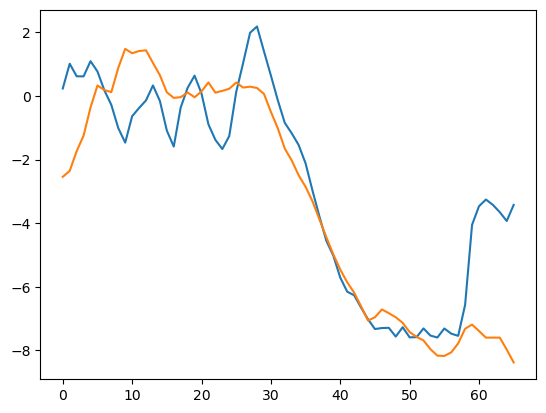

In [653]:
plt.plot(trace_hungry.iloc[761, 2:])
plt.plot(trace_hungry_30s.iloc[761, 2:])

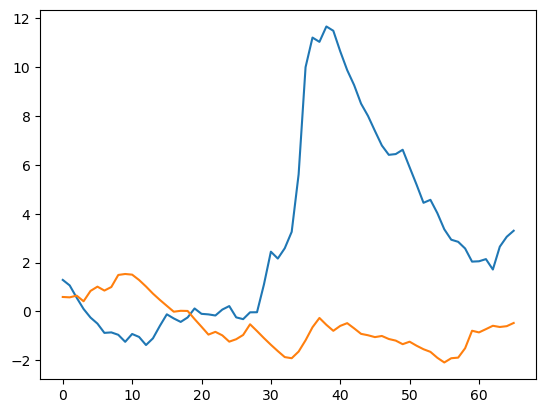

In [656]:
plt.plot(trace_hungry.iloc[1, 2:])
plt.plot(trace_hungry_30s.iloc[1, 2:])

37

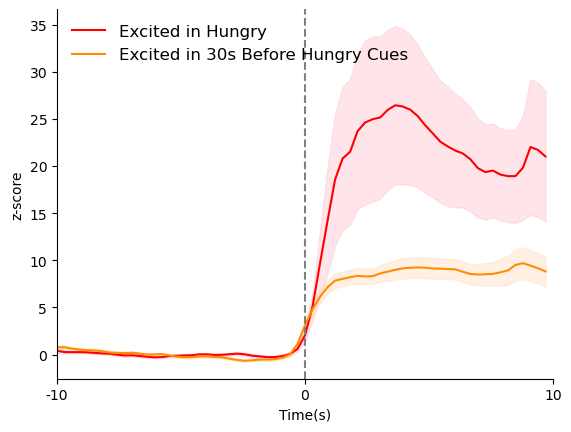

In [657]:
x=np.arange(Bins)
y=excited_hungry_mean
z=excited_hungry_mean_30s
erry = excited_hungry_sem
errz = excited_hungry_sem_30s
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.plot(x, z, label = 'Excited in 30s Before Hungry Cues', color = 'darkorange')
ax.fill_between(x, y-erry, y+erry, color='pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='peachpuff', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)


37

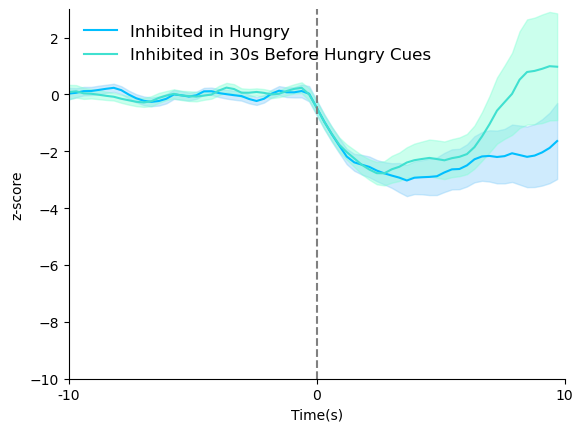

In [658]:
x=np.arange(Bins)
y=inhibited_hungry_mean
z=inhibited_hungry_mean_30s
erry = inhibited_hungry_sem
errz = inhibited_hungry_sem_30s
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue')
ax.plot(x, z, label = 'Inhibited in 30s Before Hungry Cues', color = 'turquoise')
ax.fill_between(x, y-erry, y+erry, color='lightskyblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='aquamarine', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-10, 3)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize= 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)

## auROC 

In [665]:
CompareRange_base = 0.5
CompareRange_after = 1.5

In [666]:
def calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR):
    # Define the time window before and after cue onset
    time_before_cue = int(CompareRange_base * FR)
    time_after_cue = int(CompareRange_after * FR)

    # Initialize the binary series for cue onset
    cue_length = time_before_cue + time_after_cue
    cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
    cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues
    
    # Initialize the DataFrame for ROC AUC results with the same index as tracenew_bycue and one column 'auroc'
    roc_aucs = pd.DataFrame(index=tracenew_bycue.index, columns=['auroc'])

    # Calculate the ROC AUC for each neuron
    for neuron_index in tracenew_bycue.index:
        test_neuron = tracenew_bycue.loc[neuron_index, :]
        fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
        roc_auc = auc(fpr, tpr)
        roc_aucs.at[neuron_index, 'auroc'] = roc_auc  # Assign the calculated AUROC value
        
    return roc_aucs


def calculate_traces_auc(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=None):
    # Identifying cue onsets
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1
    if cue_range is not None:
        # Select a subset of cueonset based on cue_range
        cueonset = cueonset[cue_range[0]:cue_range[1]]
    
    # Select rows where 'cell_id' is numeric and columns from the third column onwards
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
    trace = trace.sub(trace.mean(axis = 1), axis = 0).divide(trace.std(axis = 1), axis = 0)

    
    # Create an empty DataFrame to store concatenated traces for each cell
    total_cue_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
    tracenew_bycue = pd.DataFrame(index=trace.index, columns=np.arange(total_cue_length * len(cueonset)))

    # Aligning traces based on cue onset and store each trials
    for i, onset in enumerate(cueonset):
            # Calculate the valid start indices for each cue onset
            valid_starts = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))
            # Ensure the indices are within the bounds of the trace
            valid_starts = valid_starts[(valid_starts >= 0) & (valid_starts <  len(trace.columns))]

            # Concatenate the trace data around the cue
            tracenew_bycue.iloc[:, i*total_cue_length:(i+1)*total_cue_length] = trace.iloc[:, valid_starts]

    roc_aucs_all = calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR)


    return roc_aucs_all


In [667]:
# Create a list to hold the dataframes
trace_hungry_auc_list = []

# Loop through each animal's DataFrame
for df in all_dataframes:
    animal_id = df['Animal_ID'].iloc[0]  # Extract animal ID
    cell_ids = df['cell_id']  # Extract cell IDs
    
    roc_aucs_all = calculate_traces_auc(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)
    roc_aucs_all['Animal_ID'] = animal_id  # Add animal ID
    roc_aucs_all['cell_id'] = cell_ids  # Add cell IDs
    
    # Reorder columns to make 'Animal_ID' front
    columns = ['Animal_ID', 'cell_id'] + [col for col in roc_aucs_all.columns if col not in ['Animal_ID', 'cell_id']]
    roc_aucs_all = roc_aucs_all[columns]
    
    trace_hungry_auc_list.append(roc_aucs_all)
    trace_hungry_list_c.append(tracebin)

# Concatenate all dataframes in the list
trace_hungry_auc = pd.concat(trace_hungry_auc_list, ignore_index=True)


[Text(0, 0, '-10'), Text(33, 0, '0'), Text(66, 0, '10')]

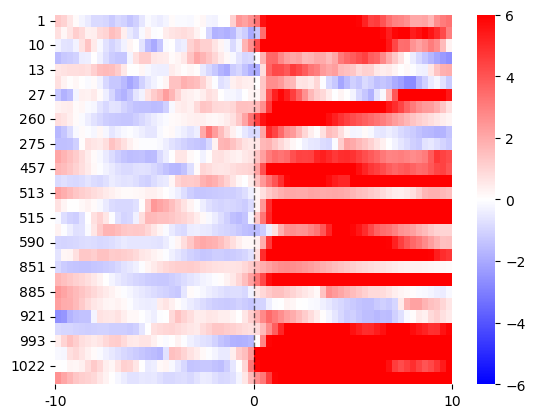

In [668]:

ax = sb.heatmap(trace_hungry[trace_hungry_auc.auroc>0.6].iloc[:,2:].astype('float'), vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])

In [669]:
# Identifying cue onsets
df = all_dataframes[0]
cue_range = hungrycue
cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1
if cue_range is not None:
    # Select a subset of cueonset based on cue_range
    cueonset = cueonset[cue_range[0]:cue_range[1]]

# Select rows where 'cell_id' is numeric and columns from the third column onwards
trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
trace = trace.sub(trace.mean(axis = 1), axis = 0).divide(trace.std(axis = 1), axis = 0)

tracenew = pd.DataFrame(0, index=trace.index, columns=np.arange(TotalFrame))
# Create an empty DataFrame to store concatenated traces for each cell
total_cue_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
tracenew_bycue = pd.DataFrame(index=trace.index, columns=np.arange(total_cue_length * len(cueonset)))

# Aligning traces based on cue onset and store each trials
for i, onset in enumerate(cueonset):
        # Calculate the valid start indices for each cue onset
        valid_starts = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))
        # Ensure the indices are within the bounds of the trace
        valid_starts = valid_starts[(valid_starts >= 0) & (valid_starts <  len(trace.columns))]
        
        # Concatenate the trace data around the cue
        tracenew_bycue.iloc[:, i*total_cue_length:(i+1)*total_cue_length] = trace.iloc[:, valid_starts]


# Define the time window before and after cue onset
time_before_cue = int(CompareRange_base * FR)
time_after_cue = int(CompareRange_after * FR)

# Initialize the binary series for cue onset
cue_length = time_before_cue + time_after_cue
cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues

In [670]:
test_auc = calculate_traces_auc(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)

In [671]:
test_neuron = tracenew_bycue.iloc[6, :]
fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
roc_auc = auc(fpr, tpr)

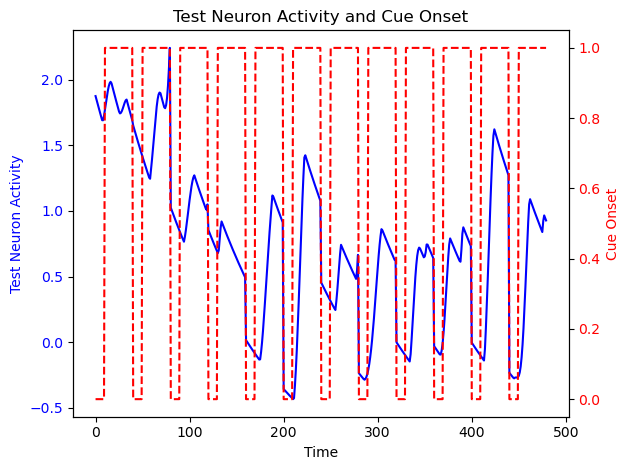

In [672]:
fig, ax1 = plt.subplots()
# Plotting test neuron data
ax1.plot(test_neuron, color='b', label='Test Neuron')
ax1.set_xlabel('Time')
ax1.set_ylabel('Test Neuron Activity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create another axis for the binary cue data
ax2 = ax1.twinx()
ax2.plot(cueon, color='r', linestyle='--', label='Cue Onset')
ax2.set_ylabel('Cue Onset', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Showing the plot
plt.title('Test Neuron Activity and Cue Onset')
fig.tight_layout()
plt.show()

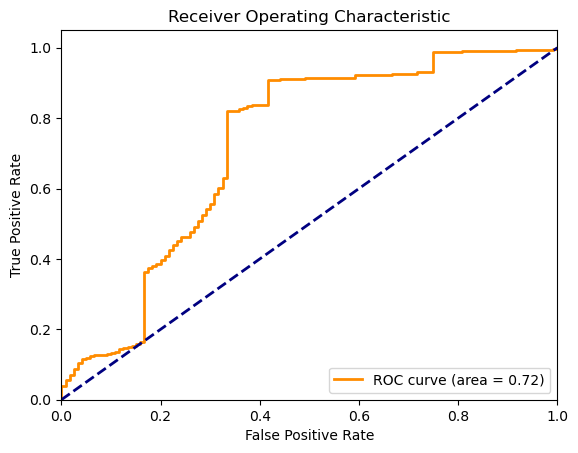

In [673]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [674]:
def calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR):
    # Define the time window before and after cue onset
    time_before_cue = int(CompareRange_base * FR)
    time_after_cue = int(CompareRange_after * FR)

    # Initialize the binary series for cue onset
    cue_length = time_before_cue + time_after_cue
    cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
    cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues
    
    # Initialize the DataFrame for ROC AUC results with the same index as tracenew_bycue and one column 'auroc'
    roc_aucs = pd.DataFrame(index=tracenew_bycue.index, columns=['auroc'])

    # Calculate the ROC AUC for each neuron
    for neuron_index in tracenew_bycue.index:
        test_neuron = tracenew_bycue.loc[neuron_index, :]
        fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
        roc_auc = auc(fpr, tpr)
        roc_aucs.at[neuron_index, 'auroc'] = roc_auc  # Assign the calculated AUROC value
        
    return roc_aucs

def calculate_changes_auc_bycue(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, num_shifts=1000, seed=999):
    random.seed(seed)
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) > 0.5)[0]) + 1
    if cue_range is not None:
        cueonset = cueonset[cue_range[0]:cue_range[1]]

    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
    trace = trace.sub(trace.mean(axis=1), axis=0).divide(trace.std(axis=1), axis=0)

    # Initialize a list to store the ROC AUC DataFrames for all shifts
    roc_aucs_list = []

    for j in range(num_shifts):
        shift = random.randint(0, len(trace.columns))
        shifted_trace = np.roll(trace.values, shift, axis=1)

        # Create an empty DataFrame to store concatenated traces for each cell
        total_cue_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
        tracenew_bycue = pd.DataFrame(index=trace.index, columns=np.arange(total_cue_length * len(cueonset)))

        # Concatenate the trace data around each cue for each shift
        for i, onset in enumerate(cueonset):
            valid_starts = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))
            valid_starts = valid_starts[(valid_starts >= 0) & (valid_starts < len(shifted_trace[0]))]
            tracenew_bycue.iloc[:, i * total_cue_length : (i + 1) * total_cue_length] = shifted_trace[:, valid_starts]

        # Calculate the ROC AUC for this shift
        roc_aucs_shift = calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR)
        
        # Append the DataFrame of AUROCs from this shift to the list
        roc_aucs_shift.rename(columns={'auroc': f'Shift_{j}'}, inplace=True)
        roc_aucs_list.append(roc_aucs_shift)

    # Concatenate all DataFrames in the list to a single DataFrame
    roc_aucs_all_shifts = pd.concat(roc_aucs_list, axis=1)

    return roc_aucs_all_shifts


def worker_process_auc(data):
    FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df = data
    # Call the calculate_changes_auc function with appropriate parameters
    return calculate_changes_auc_bycue(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range)

def parallel_process_and_calculate_change_auc(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range):
    # Determining the number of processes based on available CPU cores
    num_processes = psutil.cpu_count(logical=False)

    # Create a multiprocessing pool and process data
    pool = multiprocessing.Pool(processes=num_processes)
    results = pool.map(worker_process_auc, [(FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df) for df in all_dataframes])
    pool.close()
    pool.join()

    # Flatten list of results and convert to DataFrame
    final_df = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)
    return final_df


# The final_results_df contains the calculated changes for each DataFrame


In [748]:
%%time
change_shift_auc = parallel_process_and_calculate_change_auc(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)

CPU times: user 1.81 s, sys: 1.08 s, total: 2.89 s
Wall time: 2min 14s


<Axes: xlabel='6', ylabel='Count'>

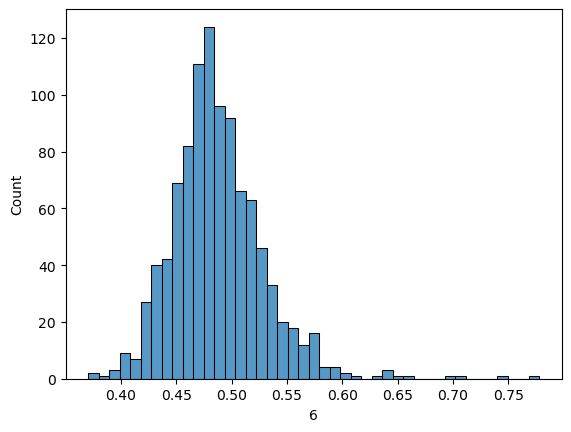

In [749]:
sb.histplot(change_shift_auc.iloc[6])


In [919]:
change_hungry_auc = trace_hungry_auc.auroc
excited_hungry_auc = pd.DataFrame()
inhibited_hungry_auc = pd.DataFrame()


excited_indices_auc = []
inhibited_indices_auc = []

for i in range(len(trace_hungry)):
    change = change_hungry_auc[i]
    change_dist = change_shift_auc.iloc[i, :]

    if change > np.quantile(change_dist, 0.975): 
        excited_indices_auc.append(i)
    elif change < np.quantile(change_dist, 0.025): 
        inhibited_indices_auc.append(i)

# Using .iloc to select rows and then concat to form the final DataFrame
excited_hungry_auc = pd.concat([trace_hungry.iloc[i] for i in excited_indices_auc], axis=1).T
inhibited_hungry_auc = pd.concat([trace_hungry.iloc[i] for i in inhibited_indices_auc], axis=1).T


excited_hungry_auc = excited_hungry_auc[(excited_hungry_auc.iloc[:,Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]>-1.645).any(axis =1)]
excited_hungry_auc = excited_hungry_auc[(excited_hungry_auc.iloc[:, Bins_before-int(CompareRange_base*FR/BinSize)+2:Bins_before+2]< 1.645).any(axis =1)]

inhibited_hungry_auc = inhibited_hungry_auc[(inhibited_hungry_auc.iloc[:, Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]< 1.645).any(axis =1)]
inhibited_hungry_auc = inhibited_hungry_auc[(inhibited_hungry_auc.iloc[:, Bins_before-int(CompareRange_base*FR/BinSize)+2:Bins_before+2]> -1.645).any(axis =1)]

excited_hungry_auc = excited_hungry_auc[trace_hungry_auc.iloc[excited_hungry_auc.index.values].auroc>0.55]
inhibited_hungry_auc = inhibited_hungry_auc[trace_hungry_auc.iloc[inhibited_hungry_auc.index.values].auroc<0.45]

excited_indices_auc = excited_hungry_auc.index.values.tolist()
inhibited_indices_auc = inhibited_hungry_auc.index.values.tolist()

excited_hungry_mean_auc = excited_hungry_auc.iloc[:,2:].mean(axis=0).astype('float')
excited_hungry_sem_auc = excited_hungry_auc.iloc[:,2:].sem(axis=0).astype('float')
inhibited_hungry_mean_auc = inhibited_hungry_auc.iloc[:,2:].mean(axis=0).astype('float')
inhibited_hungry_sem_auc = inhibited_hungry_auc.iloc[:,2:].sem(axis=0).astype('float')


45

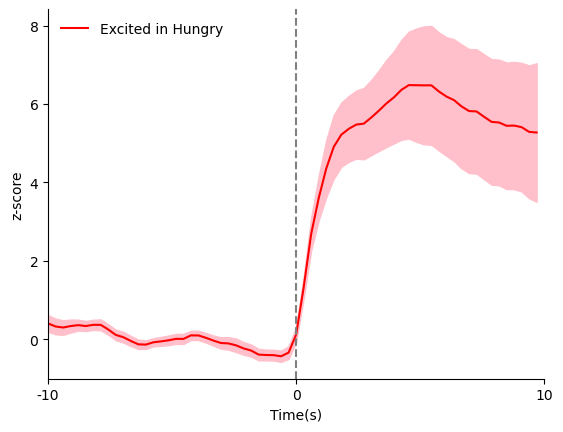

In [895]:
x=np.arange(Bins)
y=excited_hungry_mean_auc
err = excited_hungry_sem_auc
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 2, framealpha = 0)
len(excited_hungry_auc)

53

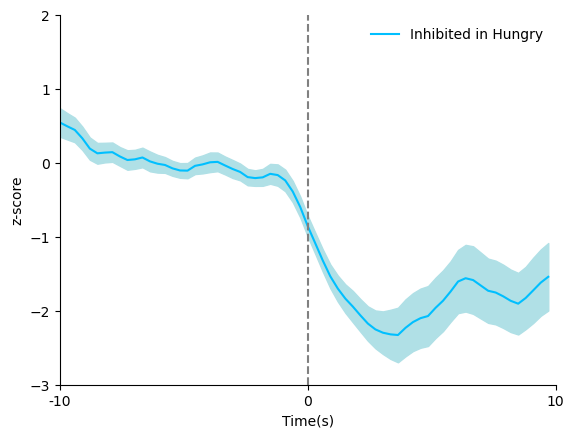

In [896]:
x=np.arange(Bins)
y=inhibited_hungry_mean_auc
err = inhibited_hungry_sem_auc
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue', linestyle = '-')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-3,2)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry_auc)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


45

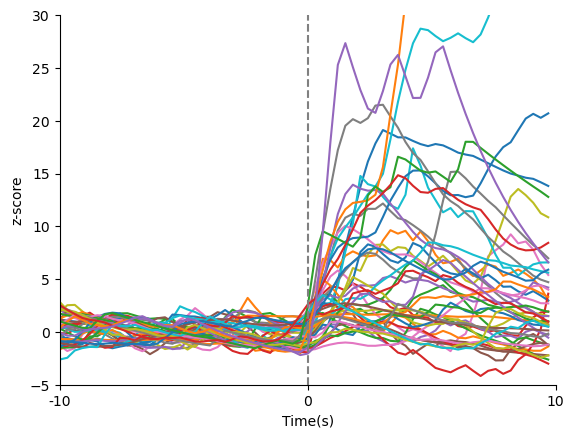

In [897]:
x=np.arange(Bins)
y=excited_hungry_auc.iloc[:,2:]
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-5,30)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry_auc)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


44

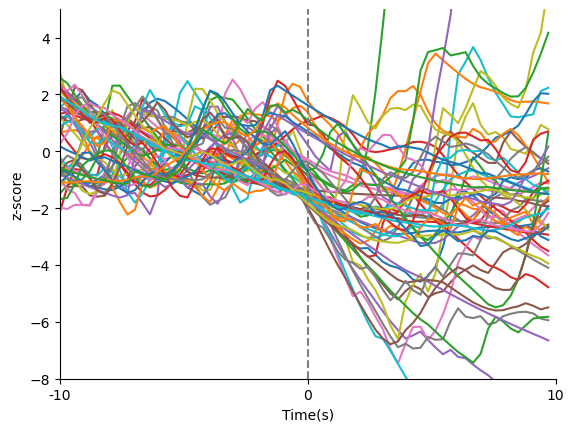

In [898]:
x=np.arange(Bins)
y=inhibited_hungry_auc.iloc[:,2:]
err = inhibited_hungry_sem
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-8,5)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry)

[Text(0, 0, '0'), Text(0, 53, '53')]

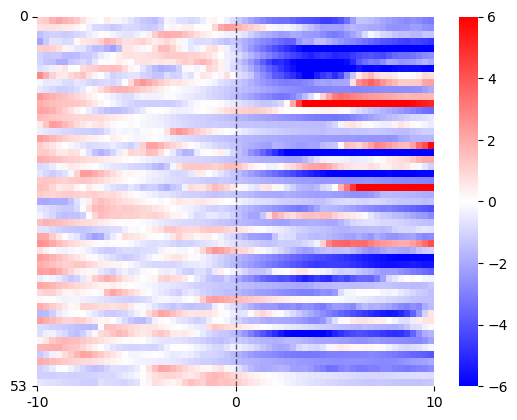

In [899]:
ax = sb.heatmap(inhibited_hungry_auc.iloc[:,2:].astype('float'), vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(inhibited_hungry_auc)])
ax.set_yticklabels([0, len(inhibited_hungry_auc)])

[Text(0, 0, '0'), Text(0, 45, '45')]

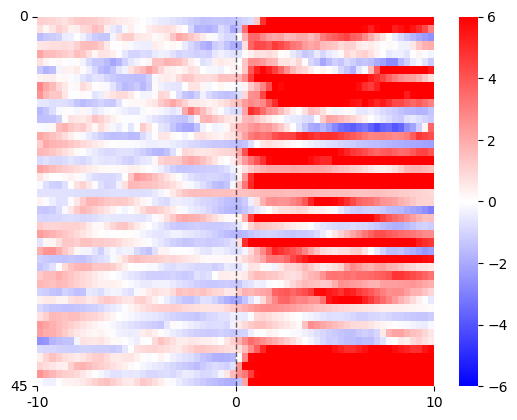

In [900]:
ax = sb.heatmap(excited_hungry_auc.iloc[:,2:].astype('float'), vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(excited_hungry_auc)])
ax.set_yticklabels([0, len(excited_hungry_auc)])

## auROC 30s before

In [807]:
def calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR):
    # Define the time window before and after cue onset
    time_before_cue = int(CompareRange_base * FR)
    time_after_cue = int(CompareRange_after * FR)

    # Initialize the binary series for cue onset
    cue_length = time_before_cue + time_after_cue
    cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
    cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues
    
    # Initialize the DataFrame for ROC AUC results with the same index as tracenew_bycue and one column 'auroc'
    roc_aucs = pd.DataFrame(index=tracenew_bycue.index, columns=['auroc'])

    # Calculate the ROC AUC for each neuron
    for neuron_index in tracenew_bycue.index:
        test_neuron = tracenew_bycue.loc[neuron_index, :]
        fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
        roc_auc = auc(fpr, tpr)
        roc_aucs.at[neuron_index, 'auroc'] = roc_auc  # Assign the calculated AUROC value
        
    return roc_aucs


def calculate_traces_auc_30s(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=None):
    # Identifying cue onsets
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1 -int(30*FR)
    if cue_range is not None:
        # Select a subset of cueonset based on cue_range
        cueonset = cueonset[cue_range[0]:cue_range[1]]
    
    # Select rows where 'cell_id' is numeric and columns from the third column onwards
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
    trace = trace.sub(trace.mean(axis = 1), axis = 0).divide(trace.std(axis = 1), axis = 0)

    
    # Create an empty DataFrame to store concatenated traces for each cell
    total_cue_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
    tracenew_bycue = pd.DataFrame(index=trace.index, columns=np.arange(total_cue_length * len(cueonset)))

    # Aligning traces based on cue onset and store each trials
    for i, onset in enumerate(cueonset):
            # Calculate the valid start indices for each cue onset
            valid_starts = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))
            # Ensure the indices are within the bounds of the trace
            valid_starts = valid_starts[(valid_starts >= 0) & (valid_starts <  len(trace.columns))]

            # Concatenate the trace data around the cue
            tracenew_bycue.iloc[:, i*total_cue_length:(i+1)*total_cue_length] = trace.iloc[:, valid_starts]

    roc_aucs_all = calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR)


    return roc_aucs_all


In [808]:
# Create a list to hold the dataframes
trace_hungry_auc_list = []

# Loop through each animal's DataFrame
for df in all_dataframes:
    animal_id = df['Animal_ID'].iloc[0]  # Extract animal ID
    cell_ids = df['cell_id']  # Extract cell IDs
    
    roc_aucs_all = calculate_traces_auc_30s(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)
    roc_aucs_all['Animal_ID'] = animal_id  # Add animal ID
    roc_aucs_all['cell_id'] = cell_ids  # Add cell IDs
    
    # Reorder columns to make 'Animal_ID' front
    columns = ['Animal_ID', 'cell_id'] + [col for col in roc_aucs_all.columns if col not in ['Animal_ID', 'cell_id']]
    roc_aucs_all = roc_aucs_all[columns]
    
    trace_hungry_auc_list.append(roc_aucs_all)
    trace_hungry_list_c.append(tracebin)

# Concatenate all dataframes in the list
trace_hungry_auc_30s = pd.concat(trace_hungry_auc_list, ignore_index=True)


[Text(0, 0, '-10'), Text(33, 0, '0'), Text(66, 0, '10')]

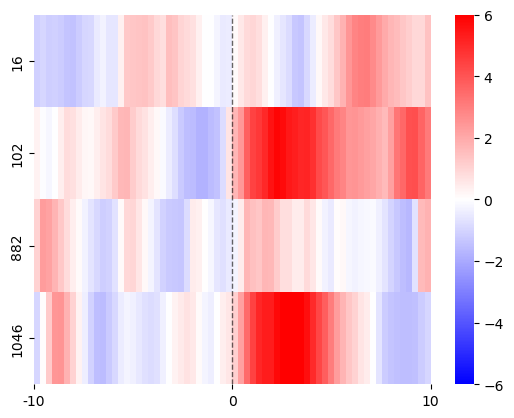

In [809]:

ax = sb.heatmap(trace_hungry_30s[trace_hungry_auc_30s.auroc>0.6].iloc[:,2:].astype('float'), vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])

In [811]:
# Identifying cue onsets
df = all_dataframes[0]
cue_range = hungrycue
cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1 -int(30*FR)
if cue_range is not None:
    # Select a subset of cueonset based on cue_range
    cueonset = cueonset[cue_range[0]:cue_range[1]]

# Select rows where 'cell_id' is numeric and columns from the third column onwards
trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
trace = trace.sub(trace.mean(axis = 1), axis = 0).divide(trace.std(axis = 1), axis = 0)

tracenew = pd.DataFrame(0, index=trace.index, columns=np.arange(TotalFrame))
# Create an empty DataFrame to store concatenated traces for each cell
total_cue_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
tracenew_bycue_30s = pd.DataFrame(index=trace.index, columns=np.arange(total_cue_length * len(cueonset)))

# Aligning traces based on cue onset and store each trials
for i, onset in enumerate(cueonset):
        # Calculate the valid start indices for each cue onset
        valid_starts = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))
        # Ensure the indices are within the bounds of the trace
        valid_starts = valid_starts[(valid_starts >= 0) & (valid_starts <  len(trace.columns))]
        
        # Concatenate the trace data around the cue
        tracenew_bycue_30s.iloc[:, i*total_cue_length:(i+1)*total_cue_length] = trace.iloc[:, valid_starts]


# Define the time window before and after cue onset
time_before_cue = int(CompareRange_base * FR)
time_after_cue = int(CompareRange_after * FR)

# Initialize the binary series for cue onset
cue_length = time_before_cue + time_after_cue
cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues

In [812]:
test_neuron = tracenew_bycue_30s.iloc[6, :]
fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
roc_auc = auc(fpr, tpr)

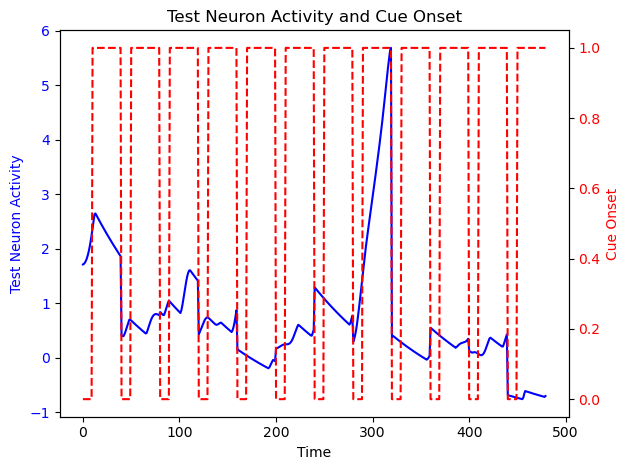

In [813]:
fig, ax1 = plt.subplots()
# Plotting test neuron data
ax1.plot(test_neuron, color='b', label='Test Neuron')
ax1.set_xlabel('Time')
ax1.set_ylabel('Test Neuron Activity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create another axis for the binary cue data
ax2 = ax1.twinx()
ax2.plot(cueon, color='r', linestyle='--', label='Cue Onset')
ax2.set_ylabel('Cue Onset', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Showing the plot
plt.title('Test Neuron Activity and Cue Onset')
fig.tight_layout()
plt.show()

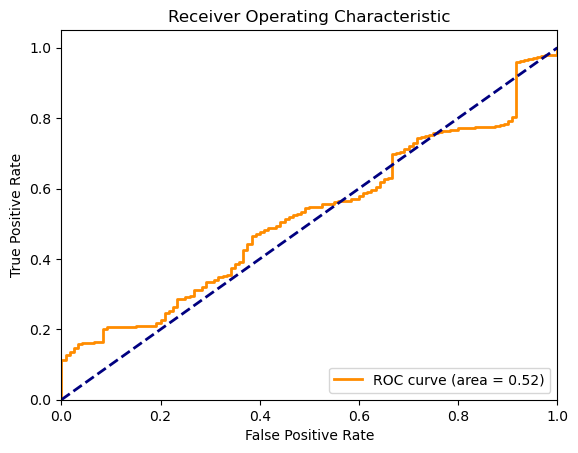

In [814]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [815]:
def calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR):
    # Define the time window before and after cue onset
    time_before_cue = int(CompareRange_base * FR)
    time_after_cue = int(CompareRange_after * FR)

    # Initialize the binary series for cue onset
    cue_length = time_before_cue + time_after_cue
    cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
    cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues
    
    # Initialize the DataFrame for ROC AUC results with the same index as tracenew_bycue and one column 'auroc'
    roc_aucs = pd.DataFrame(index=tracenew_bycue.index, columns=['auroc'])

    # Calculate the ROC AUC for each neuron
    for neuron_index in tracenew_bycue.index:
        test_neuron = tracenew_bycue.loc[neuron_index, :]
        fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
        roc_auc = auc(fpr, tpr)
        roc_aucs.at[neuron_index, 'auroc'] = roc_auc  # Assign the calculated AUROC value
        
    return roc_aucs

def calculate_changes_auc_bycue_30s(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, num_shifts=1000, seed=999):
    random.seed(seed)
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) > 0.5)[0]) + 1 - int(30*FR)
    if cue_range is not None:
        cueonset = cueonset[cue_range[0]:cue_range[1]]

    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
    trace = trace.sub(trace.mean(axis=1), axis=0).divide(trace.std(axis=1), axis=0)

    # Initialize a list to store the ROC AUC DataFrames for all shifts
    roc_aucs_list = []

    for j in range(num_shifts):
        shift = random.randint(0, len(trace.columns))
        shifted_trace = np.roll(trace.values, shift, axis=1)

        # Create an empty DataFrame to store concatenated traces for each cell
        total_cue_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
        tracenew_bycue = pd.DataFrame(index=trace.index, columns=np.arange(total_cue_length * len(cueonset)))

        # Concatenate the trace data around each cue for each shift
        for i, onset in enumerate(cueonset):
            valid_starts = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))
            valid_starts = valid_starts[(valid_starts >= 0) & (valid_starts < len(shifted_trace[0]))]
            tracenew_bycue.iloc[:, i * total_cue_length : (i + 1) * total_cue_length] = shifted_trace[:, valid_starts]

        # Calculate the ROC AUC for this shift
        roc_aucs_shift = calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR)
        
        # Append the DataFrame of AUROCs from this shift to the list
        roc_aucs_shift.rename(columns={'auroc': f'Shift_{j}'}, inplace=True)
        roc_aucs_list.append(roc_aucs_shift)

    # Concatenate all DataFrames in the list to a single DataFrame
    roc_aucs_all_shifts = pd.concat(roc_aucs_list, axis=1)

    return roc_aucs_all_shifts


def worker_process_auc_30s(data):
    FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df = data
    # Call the calculate_changes_auc function with appropriate parameters
    return calculate_changes_auc_bycue_30s(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range)

def parallel_process_and_calculate_change_auc_30s(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range):
    # Determining the number of processes based on available CPU cores
    num_processes = psutil.cpu_count(logical=False)

    # Create a multiprocessing pool and process data
    pool = multiprocessing.Pool(processes=num_processes)
    results = pool.map(worker_process_auc_30s, [(FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df) for df in all_dataframes])
    pool.close()
    pool.join()

    # Flatten list of results and convert to DataFrame
    final_df = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)
    return final_df


# The final_results_df contains the calculated changes for each DataFrame


In [816]:
%%time
change_shift_auc_30s = parallel_process_and_calculate_change_auc_30s(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)

CPU times: user 1.9 s, sys: 1.07 s, total: 2.96 s
Wall time: 2min 13s


<Axes: xlabel='6', ylabel='Count'>

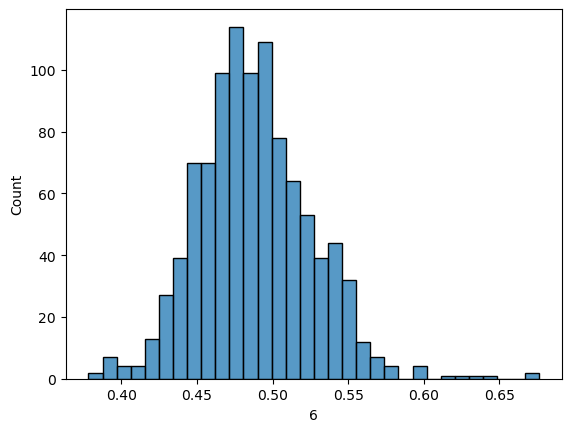

In [817]:
sb.histplot(change_shift_auc_30s.iloc[6])


In [967]:
change_hungry_auc_30s = trace_hungry_auc_30s.auroc
excited_hungry_auc_30s = pd.DataFrame()
inhibited_hungry_auc_30s = pd.DataFrame()


excited_indices_auc_30s = []
inhibited_indices_auc_30s = []

for i in range(len(trace_hungry_30s)):
    change = change_hungry_auc_30s[i]
    change_dist = change_shift_auc_30s.iloc[i, :]

    if change > np.quantile(change_dist, 0.975): 
        excited_indices_auc_30s.append(i)
    elif change < np.quantile(change_dist, 0.025): 
        inhibited_indices_auc_30s.append(i)

# Using .iloc to select rows and then concat to form the final DataFrame
excited_hungry_auc_30s = pd.concat([trace_hungry_30s.iloc[i] for i in excited_indices_auc_30s], axis=1).T
inhibited_hungry_auc_30s = pd.concat([trace_hungry_30s.iloc[i] for i in inhibited_indices_auc_30s], axis=1).T

excited_hungry_auc_30s = excited_hungry_auc_30s[(excited_hungry_auc_30s.iloc[:,Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]>-1.645).any(axis =1)]
excited_hungry_auc_30s = excited_hungry_auc_30s[(excited_hungry_auc_30s.iloc[:, Bins_before-int(CompareRange_base*FR/BinSize)+2:Bins_before+2]< 1.645).any(axis =1)]

inhibited_hungry_auc_30s = inhibited_hungry_auc_30s[(inhibited_hungry_auc_30s.iloc[:, Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]< 1.645).any(axis =1)]
inhibited_hungry_auc_30s = inhibited_hungry_auc_30s[(inhibited_hungry_auc_30s.iloc[:, Bins_before-int(CompareRange_base*FR/BinSize)+2:Bins_before+2]> -1.645).any(axis =1)]

excited_hungry_auc_30s = excited_hungry_auc_30s[trace_hungry_auc_30s.iloc[excited_hungry_auc_30s.index.values].auroc>0.55]
inhibited_hungry_auc_30s = inhibited_hungry_auc_30s[trace_hungry_auc_30s.iloc[inhibited_hungry_auc_30s.index.values].auroc<0.45]

excited_indices_auc_30s = excited_hungry_auc_30s.index.values.tolist()
inhibited_indices_auc_30s = inhibited_hungry_auc_30s.index.values.tolist()

excited_hungry_mean_auc_30s = excited_hungry_auc_30s.iloc[:,2:].mean(axis=0).astype('float')
excited_hungry_sem_auc_30s = excited_hungry_auc_30s.iloc[:,2:].sem(axis=0).astype('float')
inhibited_hungry_mean_auc_30s = inhibited_hungry_auc_30s.iloc[:,2:].mean(axis=0).astype('float')
inhibited_hungry_sem_auc_30s = inhibited_hungry_auc_30s.iloc[:,2:].sem(axis=0).astype('float')


24

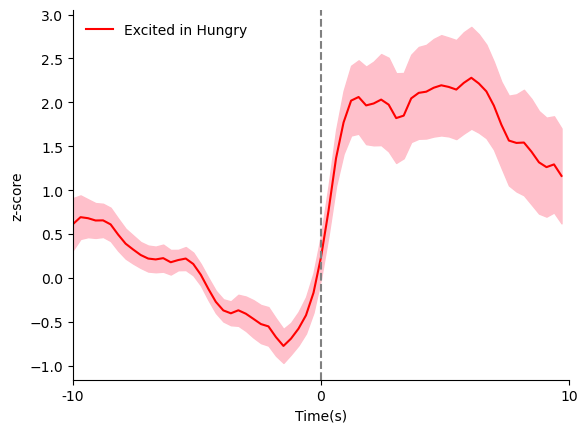

In [968]:
x=np.arange(Bins)
y=excited_hungry_mean_auc_30s
err = excited_hungry_sem_auc_30s
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 2, framealpha = 0)
len(excited_hungry_auc_30s)

24

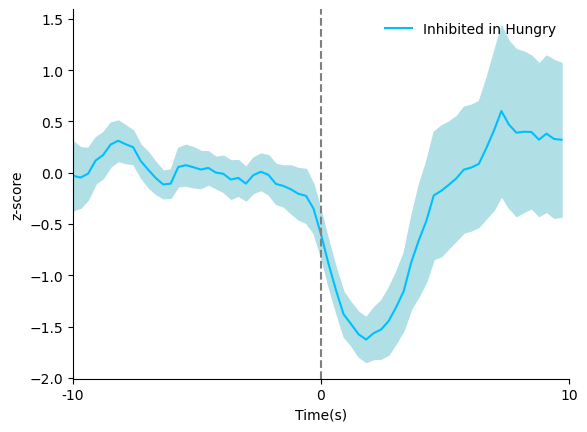

In [969]:
x=np.arange(Bins)
y=inhibited_hungry_mean_auc_30s
err = inhibited_hungry_sem_auc_30s
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue', linestyle = '-')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
# ax.set_ylim(-,1)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry_auc_30s)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


24

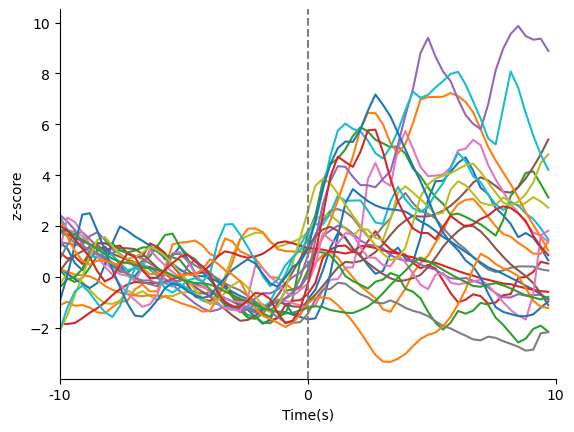

In [972]:
x=np.arange(Bins)
y=excited_hungry_auc_30s.iloc[:,2:]
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
# ax.set_ylim(-5,30)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry_auc_30s)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


24

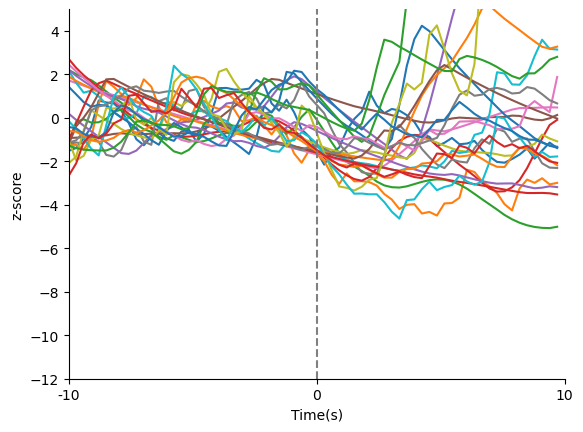

In [973]:
x=np.arange(Bins)
y=inhibited_hungry_auc_30s.iloc[:,2:]
err = inhibited_hungry_sem_30s
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-12,5)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry_auc_30s)

[Text(0, 0, '0'), Text(0, 24, '24')]

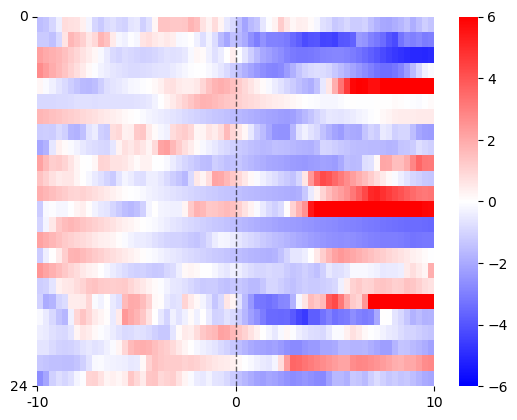

In [974]:
ax = sb.heatmap(inhibited_hungry_auc_30s.iloc[:,2:].astype('float'), vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(inhibited_hungry_auc_30s)])
ax.set_yticklabels([0, len(inhibited_hungry_auc_30s)])

[Text(0, 0, '0'), Text(0, 24, '24')]

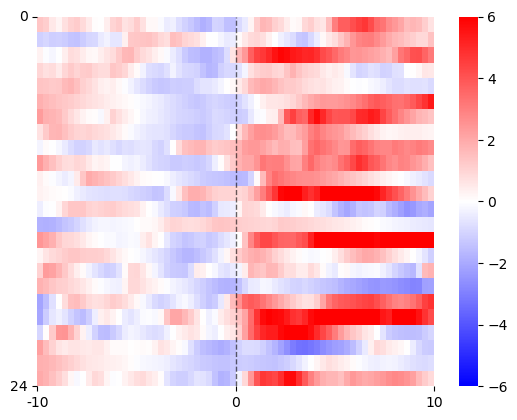

In [975]:
ax = sb.heatmap(excited_hungry_auc_30s.iloc[:,2:].astype('float'), vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(excited_hungry_auc_30s)])
ax.set_yticklabels([0, len(excited_hungry_auc_30s)])

In [976]:
total_cells = len(trace_hungry_30s)

# Calculate percentages
percent_excited_30s = len(excited_indices_auc_30s) / total_cells * 100
percent_inhibited_30s = len(inhibited_indices_auc_30s) / total_cells * 100

percent_excited = len(excited_indices_auc) / total_cells * 100

percent_inhibited = len(inhibited_indices_auc) / total_cells * 100

# Find the intersection (cells that are in both excited_indices_30s and excited_indices)
common_excited_indices = set(excited_indices_auc_30s).intersection(set(excited_indices_auc))
percent_common_excited = len(common_excited_indices) / total_cells * 100

common_inhibited_indices = set(inhibited_indices_auc_30s).intersection(set(inhibited_indices_auc))
percent_common_inhibited = len(common_inhibited_indices) / total_cells * 100

excited_inhibited30s_indices = set(excited_indices_auc).intersection(set(inhibited_indices_auc_30s))
percent_excited_inhibited30s = len(excited_inhibited30s_indices) / total_cells * 100

inhibited_excited30s_indices = set(inhibited_indices_auc).intersection(set(excited_indices_auc_30s))
percent_inhibited_excited30s = len(inhibited_excited30s_indices) / total_cells * 100

# Printing the results
print(f"Percentage of excited cells (30s): {percent_excited_30s:.2f}%")
print(f"Percentage of inhibited cells (30s): {percent_inhibited_30s:.2f}%")
print(f"Percentage of excited cells: {percent_excited:.2f}%")
print(f"Percentage of inhibited cells: {percent_inhibited:.2f}%")
print(f"Percentage of cells excited in both cases: {percent_common_excited:.2f}%")
print(f"Percentage of cells inhibited in both cases: {percent_common_inhibited:.2f}%")
print(f"Percentage of cells excited in hungry cues and inhibited 30s before: {percent_excited_inhibited30s:.2f}%")
print(f"Percentage of cells inhibited in hungry cues and excited 30s before: {percent_inhibited_excited30s:.2f}%")



Percentage of excited cells (30s): 2.16%
Percentage of inhibited cells (30s): 2.16%
Percentage of excited cells: 4.05%
Percentage of inhibited cells: 4.77%
Percentage of cells excited in both cases: 0.09%
Percentage of cells inhibited in both cases: 0.18%
Percentage of cells excited in hungry cues and inhibited 30s before: 0.09%
Percentage of cells inhibited in hungry cues and excited 30s before: 0.18%


In [977]:
common_excited_indices

{457}

In [978]:
common_inhibited_indices

{491, 1107}

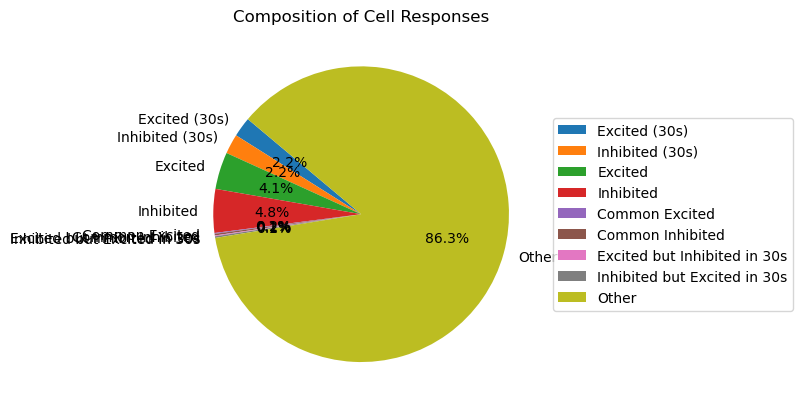

In [979]:
# Assuming you have the total number of cells and the counts for each category
total_cells = len(trace_hungry_30s.index)
excited_30s_count = len(excited_indices_auc_30s)
inhibited_30s_count = len(inhibited_indices_auc_30s)
excited_count = len(excited_indices_auc)
inhibited_count = len(inhibited_indices_auc)
common_excited_count = len(common_excited_indices)
common_inhibited_count = len(common_inhibited_indices)
excited_inhibited30s_count = len(excited_inhibited30s_indices)
inhibited_excited30s_count = len(inhibited_excited30s_indices)

# Calculate the count of cells not in any of the above categories
other_count = total_cells - (excited_30s_count + inhibited_30s_count + excited_count + inhibited_count + common_excited_count + common_inhibited_count + excited_inhibited30s_count + inhibited_excited30s_count)

# Calculate percentages
percentages = {
    "Excited (30s)": excited_30s_count / total_cells * 100,
    "Inhibited (30s)": inhibited_30s_count / total_cells * 100,
    "Excited": excited_count / total_cells * 100,
    "Inhibited": inhibited_count / total_cells * 100,
    "Common Excited": common_excited_count / total_cells * 100,
    "Common Inhibited": common_inhibited_count / total_cells * 100,
    "Excited but Inhibited in 30s": excited_inhibited30s_count / total_cells * 100,
    "Inhibited but Excited in 30s": inhibited_excited30s_count / total_cells * 100,
    "Other": other_count / total_cells * 100
}

# Code to create a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(percentages.values(), labels=percentages.keys(), autopct='%1.1f%%', startangle=140)

# Draw a legend with some space around each entry
ax.legend(wedges, percentages.keys(), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Composition of Cell Responses')
plt.show()





In [980]:
trace_hungry.iloc[491]

Animal_ID         4N6
cell_id            48
0            1.929358
1            1.744111
2            1.576718
               ...   
61           0.903811
62           1.308011
63           1.754704
64           2.042153
65           2.021481
Name: 491, Length: 68, dtype: object

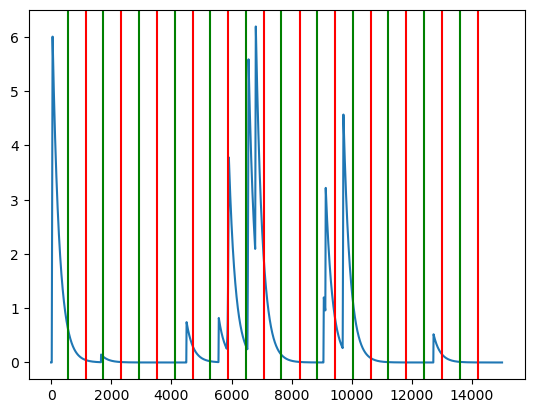

In [981]:
df = all_dataframes[9]
cue_range = hungrycue
cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1
cueonset_30sbefore = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1 -int(30*FR)
if cue_range is not None:
    # Select a subset of cueonset based on cue_range
    cueonset = cueonset[cue_range[0]:cue_range[1]]
    cueonset_30sbefore = cueonset_30sbefore[cue_range[0]:cue_range[1]]
plt.plot(all_dataframes[9].iloc[12, 2:15000])
for i in range(len(cueonset)):
    plt.axvline(cueonset[i], c = 'r')
    plt.axvline(cueonset_30sbefore[i], c = 'g')

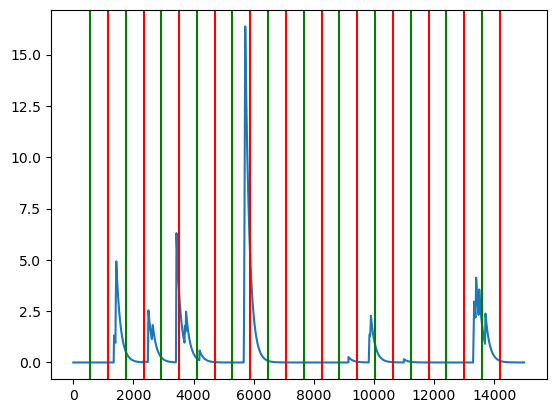

In [982]:
df = all_dataframes[9]
cue_range = hungrycue
cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1
cueonset_30sbefore = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1 -int(30*FR)
if cue_range is not None:
    # Select a subset of cueonset based on cue_range
    cueonset = cueonset[cue_range[0]:cue_range[1]]
    cueonset_30sbefore = cueonset_30sbefore[cue_range[0]:cue_range[1]]
plt.plot(all_dataframes[9].iloc[48, 2:15000])
for i in range(len(cueonset)):
    plt.axvline(cueonset[i], c = 'r')
    plt.axvline(cueonset_30sbefore[i], c = 'g')

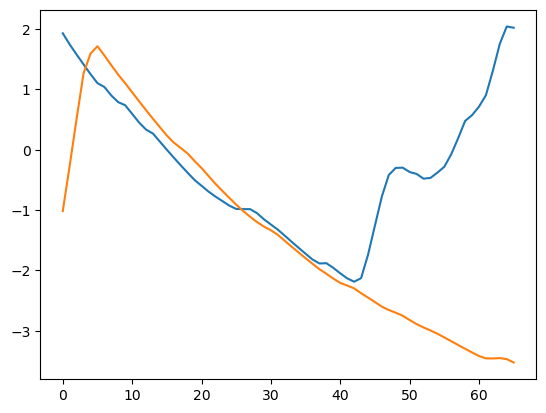

In [983]:
plt.plot(trace_hungry.iloc[491, 2:])
plt.plot(trace_hungry_30s.iloc[491, 2:])

39

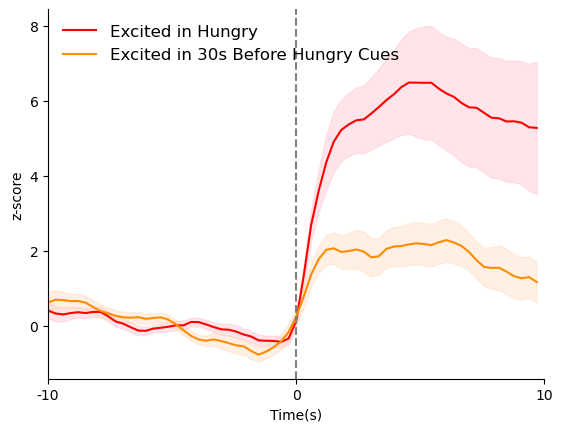

In [984]:
x=np.arange(Bins)
y=excited_hungry_mean_auc
z=excited_hungry_mean_auc_30s
erry = excited_hungry_sem_auc
errz = excited_hungry_sem_auc_30s
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.plot(x, z, label = 'Excited in 30s Before Hungry Cues', color = 'darkorange')
ax.fill_between(x, y-erry, y+erry, color='pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='peachpuff', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)


39

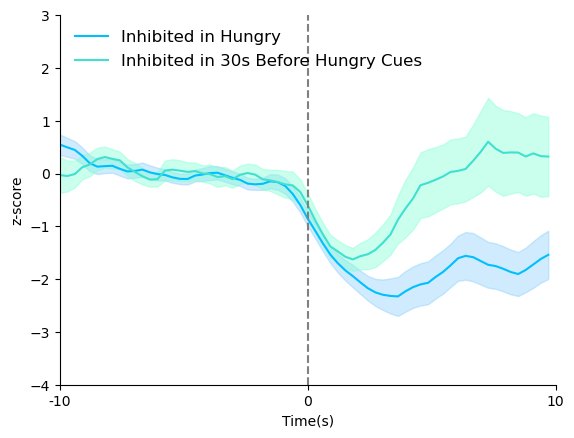

In [985]:
x=np.arange(Bins)
y=inhibited_hungry_mean_auc
z=inhibited_hungry_mean_auc_30s
erry = inhibited_hungry_sem_auc
errz = inhibited_hungry_sem_auc_30s
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue')
ax.plot(x, z, label = 'Inhibited in 30s Before Hungry Cues', color = 'turquoise')
ax.fill_between(x, y-erry, y+erry, color='lightskyblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='aquamarine', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 3)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize= 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)

## auROC with trace normalized to precue 

In [993]:
def calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR):
    # Define the time window before and after cue onset
    time_before_cue = int(CompareRange_base * FR)
    time_after_cue = int(CompareRange_after * FR)

    # Initialize the binary series for cue onset
    cue_length = time_before_cue + time_after_cue
    cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
    cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues
    
    # Initialize the DataFrame for ROC AUC results with the same index as tracenew_bycue and one column 'auroc'
    roc_aucs = pd.DataFrame(index=tracenew_bycue.index, columns=['auroc'])

    # Calculate the ROC AUC for each neuron
    for neuron_index in tracenew_bycue.index:
        test_neuron = tracenew_bycue.loc[neuron_index, :]
        fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
        roc_auc = auc(fpr, tpr)
        roc_aucs.at[neuron_index, 'auroc'] = roc_auc  # Assign the calculated AUROC value
        
    return roc_aucs


def calculate_traces_auc_norm(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=None):
    # Identifying cue onsets within the cue range
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) > 0.5)[0]) + 1
    if cue_range is not None:
        cueonset = cueonset[cue_range[0]:cue_range[1]]

    # Select rows where 'cell_id' is numeric
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
    trace = trace.sub(trace.mean(axis=1), axis=0).divide(trace.std(axis=1), axis=0)

    # Determine the total length of the concatenated segments for each cue
    segment_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
    tracenew_bycue_normalized = pd.DataFrame(index=trace.index, columns=np.arange(segment_length * len(cueonset)))

    # Normalize and concatenate the specified range around each cue
    for i, onset in enumerate(cueonset):
        # Calculate the indices for the entire window and the segment to concatenate
        window_indices = np.arange(onset - FrameRange_before, onset + TotalFrame - FrameRange_before)
        segment_indices = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))

        # Ensure indices are within the bounds of the trace
        window_indices = window_indices[(window_indices >= 0) & (window_indices < len(trace.columns))]
        segment_indices = segment_indices[(segment_indices >= 0) & (segment_indices < len(trace.columns))]

        # Normalize the entire window based on the baseline period
        baseline_values = trace.iloc[:, window_indices[0]:onset]
        window_values = trace.iloc[:, window_indices]

        # Calculate mean and std of baseline
        baseline_mean = baseline_values.mean(axis=1)
        baseline_std = baseline_values.std(axis=1)

        # Create a mask where the mean is < 0.001 or std is < 0.001
        low_variance_mask = (baseline_mean < 0.001) | (baseline_std < 0.001)

        # Replace std values that are 0 with NaN, as well as where the mean is < 0.001
        baseline_std_replaced = baseline_std.mask(low_variance_mask, np.nan)

        # Normalize the segment
        normalized_segment = window_values.iloc[:, segment_indices - window_indices[0]].sub(baseline_mean, axis=0).divide(baseline_std_replaced, axis=0)
        
        normalized_segment.fillna(0, inplace=True)

        # Concatenate the normalized trace data for each cue
        tracenew_bycue_normalized.iloc[:, i * segment_length:(i + 1) * segment_length] = normalized_segment

    # Calculate the ROC AUC for each concatenated normalized trace
    roc_aucs = calculate_roc_auc_bycue(tracenew_bycue_normalized, CompareRange_base, CompareRange_after, FR)

    return roc_aucs




In [994]:
# Create a list to hold the dataframes
trace_hungry_auc_list = []

# Loop through each animal's DataFrame
for df in all_dataframes:
    animal_id = df['Animal_ID'].iloc[0]  # Extract animal ID
    cell_ids = df['cell_id']  # Extract cell IDs
    
    roc_aucs_all = calculate_traces_auc_norm(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)
    roc_aucs_all['Animal_ID'] = animal_id  # Add animal ID
    roc_aucs_all['cell_id'] = cell_ids  # Add cell IDs
    
    # Reorder columns to make 'Animal_ID' front
    columns = ['Animal_ID', 'cell_id'] + [col for col in roc_aucs_all.columns if col not in ['Animal_ID', 'cell_id']]
    roc_aucs_all = roc_aucs_all[columns]
    
    trace_hungry_auc_list.append(roc_aucs_all)

# Concatenate all dataframes in the list
trace_hungry_auc_norm = pd.concat(trace_hungry_auc_list, ignore_index=True)


[Text(0, 0, '-10'), Text(33, 0, '0'), Text(66, 0, '10')]

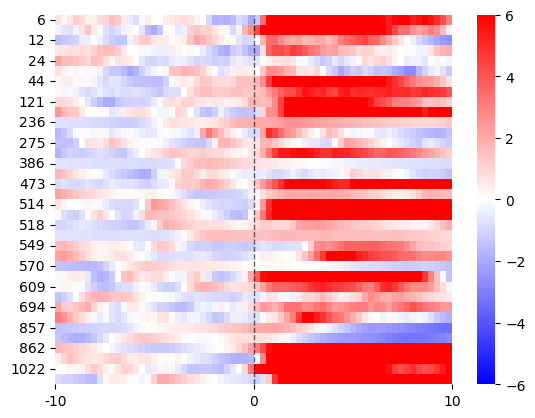

In [995]:

ax = sb.heatmap(trace_hungry[trace_hungry_auc_norm.auroc>0.55].iloc[:,2:].astype('float'), vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,Bins_before,Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])

In [996]:
# Identifying cue onsets
df = all_dataframes[0]
cue_range = hungrycue
# Identifying cue onsets within the cue range
cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) > 0.5)[0]) + 1
if cue_range is not None:
    cueonset = cueonset[cue_range[0]:cue_range[1]]

# Select rows where 'cell_id' is numeric
trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
trace = trace.sub(trace.mean(axis=1), axis=0).divide(trace.std(axis=1), axis=0)

# Determine the total length of the concatenated segments for each cue
segment_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
tracenew_bycue_normalized = pd.DataFrame(index=trace.index, columns=np.arange(segment_length * len(cueonset)))

# Normalize and concatenate the specified range around each cue
for i, onset in enumerate(cueonset):
    # Calculate the indices for the entire window and the segment to concatenate
    window_indices = np.arange(onset - FrameRange_before, onset + TotalFrame - FrameRange_before)
    segment_indices = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))

    # Ensure indices are within the bounds of the trace
    window_indices = window_indices[(window_indices >= 0) & (window_indices < len(trace.columns))]
    segment_indices = segment_indices[(segment_indices >= 0) & (segment_indices < len(trace.columns))]

    # Normalize the entire window based on the baseline period
    baseline_values = trace.iloc[:, window_indices[0]:onset]
    window_values = trace.iloc[:, window_indices]

    # Calculate mean and std of baseline
    baseline_mean = baseline_values.mean(axis=1)
    baseline_std = baseline_values.std(axis=1)

    # Create a mask where the mean is < 0.001 or std is < 0.001
    low_variance_mask = (baseline_mean < 0.001) | (baseline_std < 0.001)

    # Replace std values that are 0 with NaN, as well as where the mean is < 0.001
    baseline_std_replaced = baseline_std.mask(low_variance_mask, np.nan)

    # Normalize the segment
    normalized_segment = window_values.iloc[:, segment_indices - window_indices[0]].sub(baseline_mean, axis=0).divide(baseline_std_replaced, axis=0)

    normalized_segment.fillna(0, inplace=True)

    # Concatenate the normalized trace data for each cue
    tracenew_bycue_normalized.iloc[:, i * segment_length:(i + 1) * segment_length] = normalized_segment


# Calculate the ROC AUC for each concatenated normalized trace
roc_aucs = calculate_roc_auc_bycue(tracenew_bycue_normalized, CompareRange_base, CompareRange_after, FR)



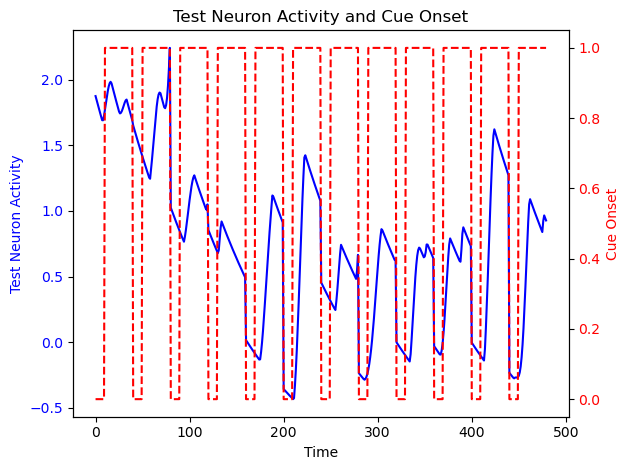

In [997]:
test_neuron = tracenew_bycue.iloc[6, :]
fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
roc_auc = auc(fpr, tpr)
fig, ax1 = plt.subplots()
# Plotting test neuron data
ax1.plot(test_neuron, color='b', label='Test Neuron')
ax1.set_xlabel('Time')
ax1.set_ylabel('Test Neuron Activity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create another axis for the binary cue data
ax2 = ax1.twinx()
ax2.plot(cueon, color='r', linestyle='--', label='Cue Onset')
ax2.set_ylabel('Cue Onset', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Showing the plot
plt.title('Test Neuron Activity and Cue Onset')
fig.tight_layout()
plt.show()

In [998]:
test_neuron = tracenew_bycue_normalized.iloc[6, :]
fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
roc_auc = auc(fpr, tpr)

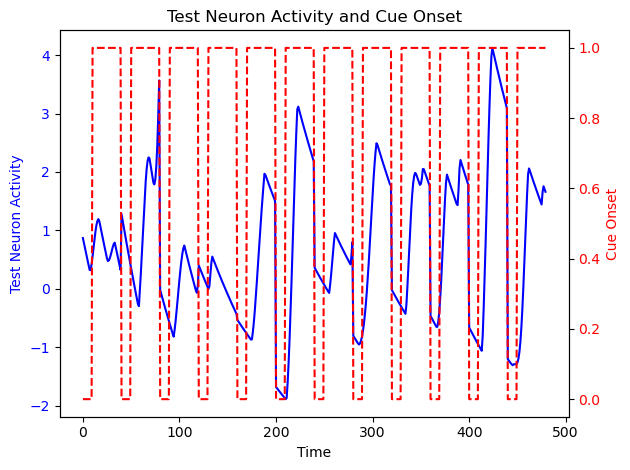

In [999]:
fig, ax1 = plt.subplots()
# Plotting test neuron data
ax1.plot(test_neuron, color='b', label='Test Neuron')
ax1.set_xlabel('Time')
ax1.set_ylabel('Test Neuron Activity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create another axis for the binary cue data
ax2 = ax1.twinx()
ax2.plot(cueon, color='r', linestyle='--', label='Cue Onset')
ax2.set_ylabel('Cue Onset', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Showing the plot
plt.title('Test Neuron Activity and Cue Onset')
fig.tight_layout()
plt.show()

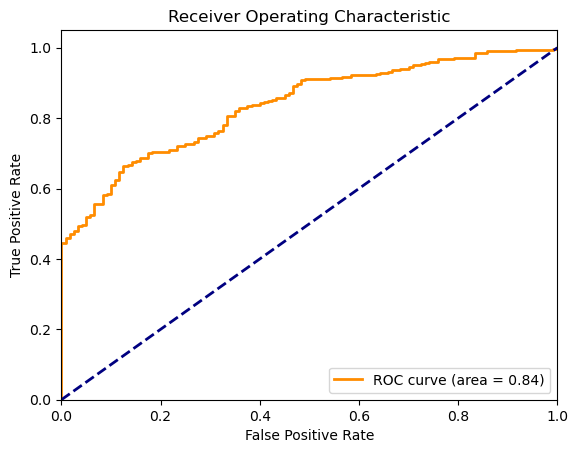

In [1000]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [1001]:
def calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR):
    # Define the time window before and after cue onset
    time_before_cue = int(CompareRange_base * FR)
    time_after_cue = int(CompareRange_after * FR)

    # Initialize the binary series for cue onset
    cue_length = time_before_cue + time_after_cue
    cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
    cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues
    
    # Initialize the DataFrame for ROC AUC results with the same index as tracenew_bycue and one column 'auroc'
    roc_aucs = pd.DataFrame(index=tracenew_bycue.index, columns=['auroc'])

    # Calculate the ROC AUC for each neuron
    for neuron_index in tracenew_bycue.index:
        test_neuron = tracenew_bycue.loc[neuron_index, :]
        fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
        roc_auc = auc(fpr, tpr)
        roc_aucs.at[neuron_index, 'auroc'] = roc_auc  # Assign the calculated AUROC value
        
    return roc_aucs

def calculate_changes_auc_bycue_norm(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, num_shifts=1000, seed=999):
    random.seed(seed)
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) > 0.5)[0]) + 1
    if cue_range is not None:
        cueonset = cueonset[cue_range[0]:cue_range[1]]

    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
    trace = trace.sub(trace.mean(axis=1), axis=0).divide(trace.std(axis=1), axis=0)

    segment_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)

    # Initialize a list to store the ROC AUC DataFrames for all shifts
    roc_aucs_list = []

    for j in range(num_shifts):
        shift = random.randint(0, len(trace.columns))
        shifted_trace = np.roll(trace.values, shift, axis=1)
        # Convert shifted NumPy array back to DataFrame with original index and columns
        shifted_trace = pd.DataFrame(shifted_trace, index=trace.index, columns=trace.columns)

        # Determine the total length of the concatenated segments for each cue
        tracenew_bycue_normalized = pd.DataFrame(index=trace.index, columns=np.arange(segment_length * len(cueonset)))

        # Normalize and concatenate the specified range around each cue
        for i, onset in enumerate(cueonset):
            # Calculate the indices for the entire window and the segment to concatenate
            window_indices = np.arange(onset - FrameRange_before, onset + TotalFrame - FrameRange_before)
            segment_indices = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))

            # Ensure indices are within the bounds of the trace
            window_indices = window_indices[(window_indices >= 0) & (window_indices < len(trace.columns))]
            segment_indices = segment_indices[(segment_indices >= 0) & (segment_indices < len(trace.columns))]

            # Normalize the entire window based on the baseline period
            baseline_values = shifted_trace.iloc[:, window_indices[0]:onset]
            window_values = shifted_trace.iloc[:, window_indices]

            # Calculate mean and std of baseline
            baseline_mean = baseline_values.mean(axis=1)
            baseline_std = baseline_values.std(axis=1)

            # Create a mask where the mean is < 0.001 or std is < 0.001
            low_variance_mask = (baseline_mean < 0.001) | (baseline_std < 0.001)

            # Replace std values that are 0 with NaN, as well as where the mean is < 0.001
            baseline_std_replaced = baseline_std.mask(low_variance_mask, np.nan)

            # Normalize the segment
            normalized_segment = window_values.iloc[:, segment_indices - window_indices[0]].sub(baseline_mean, axis=0).divide(baseline_std_replaced, axis=0)

            normalized_segment.fillna(0, inplace=True)

            # Concatenate the normalized trace data for each cue
            tracenew_bycue_normalized.iloc[:, i * segment_length:(i + 1) * segment_length] = normalized_segment


        # Calculate the ROC AUC for this shift
        roc_aucs_shift = calculate_roc_auc_bycue(tracenew_bycue_normalized, CompareRange_base, CompareRange_after, FR)

        # Append the DataFrame of AUROCs from this shift to the list
        roc_aucs_shift.rename(columns={'auroc': f'Shift_{j}'}, inplace=True)
        roc_aucs_list.append(roc_aucs_shift)

    # Concatenate all DataFrames in the list to a single DataFrame
    roc_aucs_all_shifts = pd.concat(roc_aucs_list, axis=1)

    return roc_aucs_all_shifts


def worker_process_auc_norm(data):
    FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df = data
    # Call the calculate_changes_auc function with appropriate parameters
    return calculate_changes_auc_bycue_norm(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range)

def parallel_process_and_calculate_change_auc_norm(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range):
    # Determining the number of processes based on available CPU cores
    num_processes = psutil.cpu_count(logical=False)

    # Create a multiprocessing pool and process data
    pool = multiprocessing.Pool(processes=num_processes)
    results = pool.map(worker_process_auc_norm, [(FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df) for df in all_dataframes])
    pool.close()
    pool.join()

    # Flatten list of results and convert to DataFrame
    final_df = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)
    return final_df


# The final_results_df contains the calculated changes for each DataFrame


In [1002]:
%%time
change_shift_auc_norm = parallel_process_and_calculate_change_auc_norm(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)

CPU times: user 2.09 s, sys: 1.11 s, total: 3.2 s
Wall time: 2min 47s


<Axes: xlabel='6', ylabel='Count'>

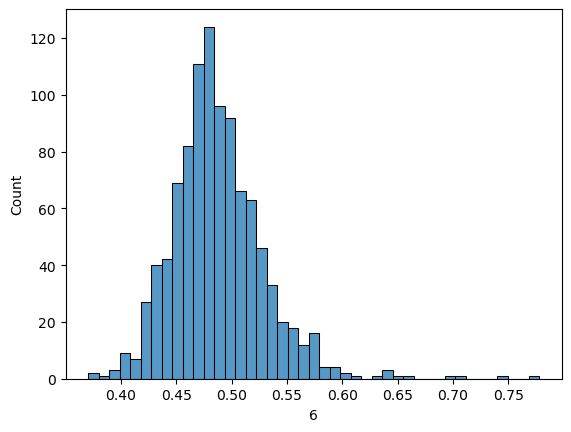

In [1003]:
sb.histplot(change_shift_auc.iloc[6])


In [1004]:
change_hungry_auc_norm

0       0.287477
1       0.747963
2       0.508079
3       0.427917
4       0.540671
          ...   
1106    0.450208
1107    0.378264
1108         0.5
1109    0.496528
1110         0.5
Name: auroc, Length: 1111, dtype: object

In [1005]:
change_hungry_auc_norm = trace_hungry_auc_norm.auroc
excited_hungry_auc_norm = pd.DataFrame()
inhibited_hungry_auc_norm = pd.DataFrame()


excited_indices_auc_norm = []
inhibited_indices_auc_norm = []

for i in range(len(trace_hungry)):
    change = change_hungry_auc_norm[i]
    change_dist = change_shift_auc_norm.iloc[i, :]

    if change > np.quantile(change_dist, 0.975): 
        excited_indices_auc_norm.append(i)
    elif change < np.quantile(change_dist, 0.025): 
        inhibited_indices_auc_norm.append(i)

# Using .iloc to select rows and then concat to form the final DataFrame
excited_hungry_auc_norm = pd.concat([trace_hungry.iloc[i] for i in excited_indices_auc_norm], axis=1).T
inhibited_hungry_auc_norm = pd.concat([trace_hungry.iloc[i] for i in inhibited_indices_auc_norm], axis=1).T

excited_hungry_auc_norm = excited_hungry_auc_norm[(excited_hungry_auc_norm.iloc[:,Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]>-1.645).any(axis =1)]
excited_hungry_auc_norm = excited_hungry_auc_norm[(excited_hungry_auc_norm.iloc[:, Bins_before-int(CompareRange_base*FR/BinSize)+2:Bins_before+2]< 1.645).any(axis =1)]

inhibited_hungry_auc_norm = inhibited_hungry_auc_norm[(inhibited_hungry_auc_norm.iloc[:, Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]< 1.645).any(axis =1)]
inhibited_hungry_auc_norm = inhibited_hungry_auc_norm[(inhibited_hungry_auc_norm.iloc[:, Bins_before-int(CompareRange_base*FR/BinSize)+2:Bins_before+2]> -1.645).any(axis =1)]

excited_hungry_auc_norm = excited_hungry_auc_norm[trace_hungry_auc_norm.iloc[excited_hungry_auc_norm.index.values].auroc>0.55]
inhibited_hungry_auc_norm = inhibited_hungry_auc_norm[trace_hungry_auc_norm.iloc[inhibited_hungry_auc_norm.index.values].auroc<0.45]

excited_indices_auc_norm = excited_hungry_auc_norm.index.values.tolist()
inhibited_indices_auc_norm = inhibited_hungry_auc_norm.index.values.tolist()


excited_hungry_mean_auc_norm = excited_hungry_auc_norm.iloc[:,2:].mean(axis=0).astype('float')
excited_hungry_sem_auc_norm = excited_hungry_auc_norm.iloc[:,2:].sem(axis=0).astype('float')
inhibited_hungry_mean_auc_norm = inhibited_hungry_auc_norm.iloc[:,2:].mean(axis=0).astype('float')
inhibited_hungry_sem_auc_norm = inhibited_hungry_auc_norm.iloc[:,2:].sem(axis=0).astype('float')


25

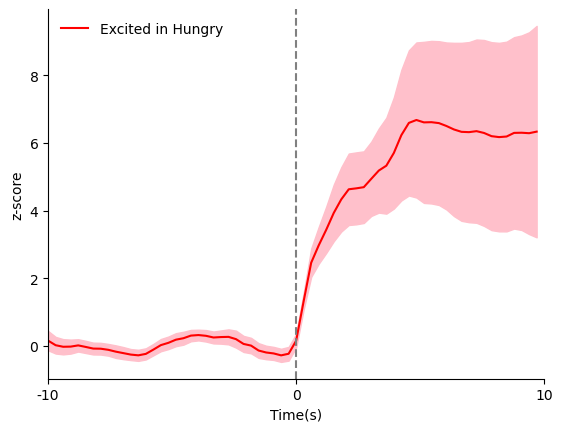

In [1006]:
x=np.arange(Bins)
y=excited_hungry_mean_auc_norm
err = excited_hungry_sem_auc_norm
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0, Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 2, framealpha = 0)
len(excited_hungry_auc_norm)

44

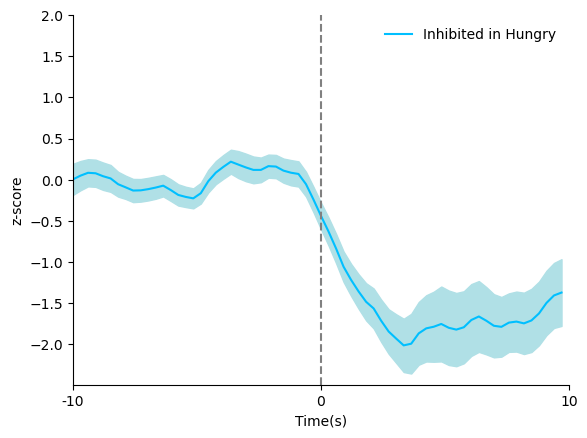

In [1007]:
x=np.arange(Bins)
y=inhibited_hungry_mean_auc_norm
err = inhibited_hungry_sem_auc_norm
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue', linestyle = '-')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(None,2)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry_auc_norm)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


25

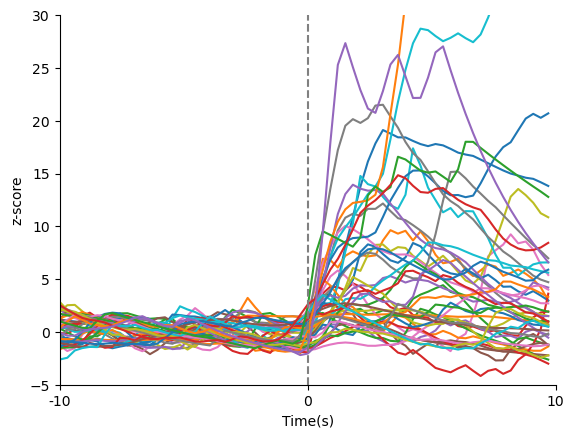

In [1008]:
x=np.arange(Bins)
y=excited_hungry_auc.iloc[:,2:]
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-5,30)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry_auc_norm)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


44

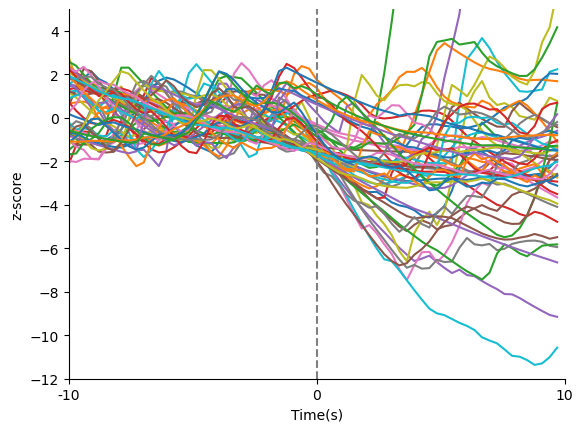

In [1009]:
x=np.arange(Bins)
y=inhibited_hungry_auc.iloc[:,2:]
err = inhibited_hungry_sem
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-12,5)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry_auc_norm)

[Text(0, 0, '0'), Text(0, 44, '44')]

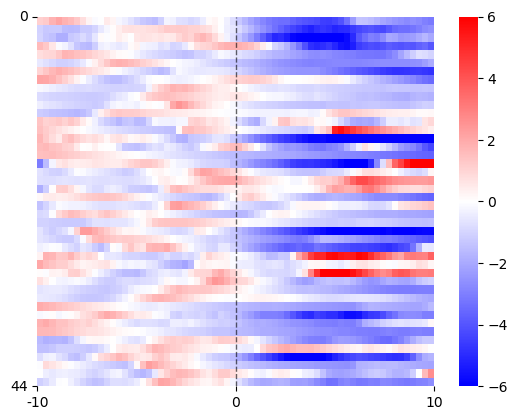

In [1010]:
ax = sb.heatmap(inhibited_hungry_auc_norm.iloc[:,2:].astype('float'), vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(inhibited_hungry_auc_norm)])
ax.set_yticklabels([0, len(inhibited_hungry_auc_norm)])

[Text(0, 0, '0'), Text(0, 45, '45')]

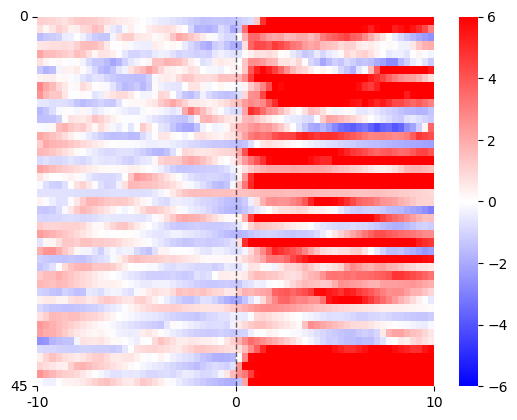

In [1011]:
ax = sb.heatmap(excited_hungry_auc.iloc[:,2:].astype('float'), vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(excited_hungry_auc)])
ax.set_yticklabels([0, len(excited_hungry_auc)])

## -30s

In [1013]:
def calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR):
    # Define the time window before and after cue onset
    time_before_cue = int(CompareRange_base * FR)
    time_after_cue = int(CompareRange_after * FR)

    # Initialize the binary series for cue onset
    cue_length = time_before_cue + time_after_cue
    cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
    cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues
    
    # Initialize the DataFrame for ROC AUC results with the same index as tracenew_bycue and one column 'auroc'
    roc_aucs = pd.DataFrame(index=tracenew_bycue.index, columns=['auroc'])

    # Calculate the ROC AUC for each neuron
    for neuron_index in tracenew_bycue.index:
        test_neuron = tracenew_bycue.loc[neuron_index, :]
        fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
        roc_auc = auc(fpr, tpr)
        roc_aucs.at[neuron_index, 'auroc'] = roc_auc  # Assign the calculated AUROC value
        
    return roc_aucs


def calculate_traces_auc_norm_30s(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=None):
    # Identifying cue onsets within the cue range
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) > 0.5)[0]) + 1 -int(30*FR)
    if cue_range is not None:
        cueonset = cueonset[cue_range[0]:cue_range[1]]

    # Select rows where 'cell_id' is numeric
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
    trace = trace.sub(trace.mean(axis=1), axis=0).divide(trace.std(axis=1), axis=0)

    # Determine the total length of the concatenated segments for each cue
    segment_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
    tracenew_bycue_normalized = pd.DataFrame(index=trace.index, columns=np.arange(segment_length * len(cueonset)))

    # Normalize and concatenate the specified range around each cue
    for i, onset in enumerate(cueonset):
        # Calculate the indices for the entire window and the segment to concatenate
        window_indices = np.arange(onset - FrameRange_before, onset + TotalFrame - FrameRange_before)
        segment_indices = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))

        # Ensure indices are within the bounds of the trace
        window_indices = window_indices[(window_indices >= 0) & (window_indices < len(trace.columns))]
        segment_indices = segment_indices[(segment_indices >= 0) & (segment_indices < len(trace.columns))]

        # Normalize the entire window based on the baseline period
        baseline_values = trace.iloc[:, window_indices[0]:onset]
        window_values = trace.iloc[:, window_indices]

        # Calculate mean and std of baseline
        baseline_mean = baseline_values.mean(axis=1)
        baseline_std = baseline_values.std(axis=1)

        # Create a mask where the mean is < 0.001 or std is < 0.001
        low_variance_mask = (baseline_mean < 0.001) | (baseline_std < 0.001)

        # Replace std values that are 0 with NaN, as well as where the mean is < 0.001
        baseline_std_replaced = baseline_std.mask(low_variance_mask, np.nan)

        # Normalize the segment
        normalized_segment = window_values.iloc[:, segment_indices - window_indices[0]].sub(baseline_mean, axis=0).divide(baseline_std_replaced, axis=0)
        
        normalized_segment.fillna(0, inplace=True)

        # Concatenate the normalized trace data for each cue
        tracenew_bycue_normalized.iloc[:, i * segment_length:(i + 1) * segment_length] = normalized_segment

    # Calculate the ROC AUC for each concatenated normalized trace
    roc_aucs = calculate_roc_auc_bycue(tracenew_bycue_normalized, CompareRange_base, CompareRange_after, FR)

    return roc_aucs




In [1014]:
# Create a list to hold the dataframes
trace_hungry_auc_list = []

# Loop through each animal's DataFrame
for df in all_dataframes:
    animal_id = df['Animal_ID'].iloc[0]  # Extract animal ID
    cell_ids = df['cell_id']  # Extract cell IDs
    
    roc_aucs_all = calculate_traces_auc_norm_30s(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)
    roc_aucs_all['Animal_ID'] = animal_id  # Add animal ID
    roc_aucs_all['cell_id'] = cell_ids  # Add cell IDs
    
    # Reorder columns to make 'Animal_ID' front
    columns = ['Animal_ID', 'cell_id'] + [col for col in roc_aucs_all.columns if col not in ['Animal_ID', 'cell_id']]
    roc_aucs_all = roc_aucs_all[columns]
    
    trace_hungry_auc_list.append(roc_aucs_all)

# Concatenate all dataframes in the list
trace_hungry_auc_norm_30s = pd.concat(trace_hungry_auc_list, ignore_index=True)


[Text(0, 0, '-10'), Text(33, 0, '0'), Text(66, 0, '10')]

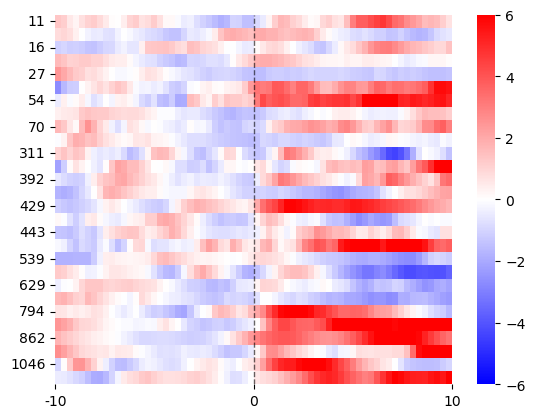

In [1016]:

ax = sb.heatmap(trace_hungry_30s[trace_hungry_auc_norm_30s.auroc>0.55].iloc[:,2:].astype('float'), vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,Bins_before,Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])

In [1018]:
# Identifying cue onsets
df = all_dataframes[0]
cue_range = hungrycue
# Identifying cue onsets within the cue range
cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) > 0.5)[0]) + 1 -int(30*FR)
if cue_range is not None:
    cueonset = cueonset[cue_range[0]:cue_range[1]]

# Select rows where 'cell_id' is numeric
trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
trace = trace.sub(trace.mean(axis=1), axis=0).divide(trace.std(axis=1), axis=0)

# Determine the total length of the concatenated segments for each cue
segment_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)
tracenew_bycue_normalized_30s = pd.DataFrame(index=trace.index, columns=np.arange(segment_length * len(cueonset)))

# Normalize and concatenate the specified range around each cue
for i, onset in enumerate(cueonset):
    # Calculate the indices for the entire window and the segment to concatenate
    window_indices = np.arange(onset - FrameRange_before, onset + TotalFrame - FrameRange_before)
    segment_indices = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))

    # Ensure indices are within the bounds of the trace
    window_indices = window_indices[(window_indices >= 0) & (window_indices < len(trace.columns))]
    segment_indices = segment_indices[(segment_indices >= 0) & (segment_indices < len(trace.columns))]

    # Normalize the entire window based on the baseline period
    baseline_values = trace.iloc[:, window_indices[0]:onset]
    window_values = trace.iloc[:, window_indices]

    # Calculate mean and std of baseline
    baseline_mean = baseline_values.mean(axis=1)
    baseline_std = baseline_values.std(axis=1)

    # Create a mask where the mean is < 0.001 or std is < 0.001
    low_variance_mask = (baseline_mean < 0.001) | (baseline_std < 0.001)

    # Replace std values that are 0 with NaN, as well as where the mean is < 0.001
    baseline_std_replaced = baseline_std.mask(low_variance_mask, np.nan)

    # Normalize the segment
    normalized_segment = window_values.iloc[:, segment_indices - window_indices[0]].sub(baseline_mean, axis=0).divide(baseline_std_replaced, axis=0)

    normalized_segment.fillna(0, inplace=True)

    # Concatenate the normalized trace data for each cue
    tracenew_bycue_normalized_30s.iloc[:, i * segment_length:(i + 1) * segment_length] = normalized_segment


# Calculate the ROC AUC for each concatenated normalized trace
roc_aucs = calculate_roc_auc_bycue(tracenew_bycue_normalized, CompareRange_base, CompareRange_after, FR)



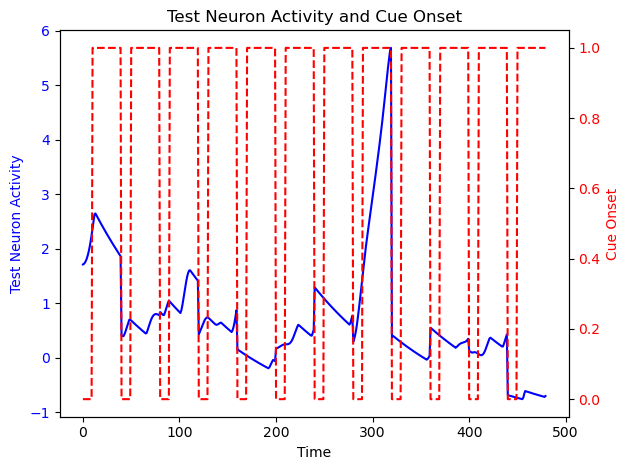

In [1019]:
test_neuron = tracenew_bycue_30s.iloc[6, :]
fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
roc_auc = auc(fpr, tpr)
fig, ax1 = plt.subplots()
# Plotting test neuron data
ax1.plot(test_neuron, color='b', label='Test Neuron')
ax1.set_xlabel('Time')
ax1.set_ylabel('Test Neuron Activity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create another axis for the binary cue data
ax2 = ax1.twinx()
ax2.plot(cueon, color='r', linestyle='--', label='Cue Onset')
ax2.set_ylabel('Cue Onset', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Showing the plot
plt.title('Test Neuron Activity and Cue Onset')
fig.tight_layout()
plt.show()

In [1020]:
test_neuron = tracenew_bycue_normalized_30s.iloc[6, :]
fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
roc_auc = auc(fpr, tpr)

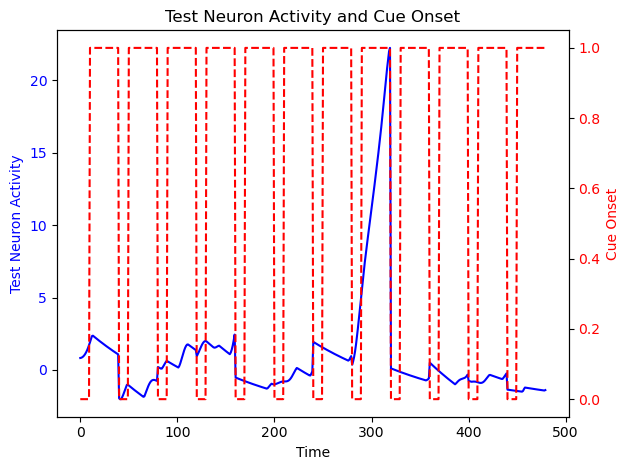

In [1021]:
fig, ax1 = plt.subplots()
# Plotting test neuron data
ax1.plot(test_neuron, color='b', label='Test Neuron')
ax1.set_xlabel('Time')
ax1.set_ylabel('Test Neuron Activity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create another axis for the binary cue data
ax2 = ax1.twinx()
ax2.plot(cueon, color='r', linestyle='--', label='Cue Onset')
ax2.set_ylabel('Cue Onset', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Showing the plot
plt.title('Test Neuron Activity and Cue Onset')
fig.tight_layout()
plt.show()

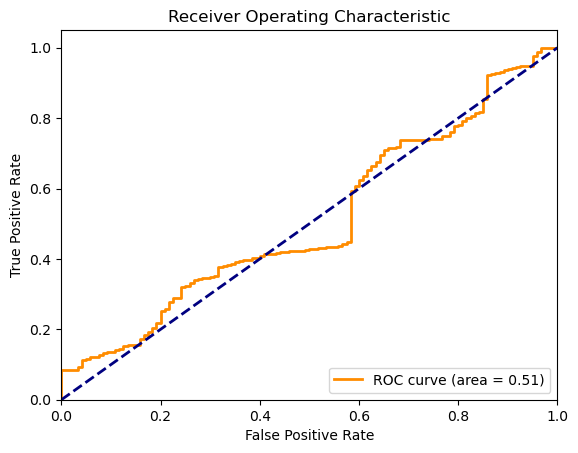

In [1022]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [1023]:
def calculate_roc_auc_bycue(tracenew_bycue, CompareRange_base, CompareRange_after, FR):
    # Define the time window before and after cue onset
    time_before_cue = int(CompareRange_base * FR)
    time_after_cue = int(CompareRange_after * FR)

    # Initialize the binary series for cue onset
    cue_length = time_before_cue + time_after_cue
    cueon_per_cue = [0] * time_before_cue + [1] * time_after_cue
    cueon = cueon_per_cue * len(cueonset)  # Repeat for the number of cues
    
    # Initialize the DataFrame for ROC AUC results with the same index as tracenew_bycue and one column 'auroc'
    roc_aucs = pd.DataFrame(index=tracenew_bycue.index, columns=['auroc'])

    # Calculate the ROC AUC for each neuron
    for neuron_index in tracenew_bycue.index:
        test_neuron = tracenew_bycue.loc[neuron_index, :]
        fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
        roc_auc = auc(fpr, tpr)
        roc_aucs.at[neuron_index, 'auroc'] = roc_auc  # Assign the calculated AUROC value
        
    return roc_aucs

def calculate_changes_auc_bycue_norm_30s(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, num_shifts=1000, seed=999):
    random.seed(seed)
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) > 0.5)[0]) + 1 - int(30*FR)
    if cue_range is not None:
        cueonset = cueonset[cue_range[0]:cue_range[1]]

    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
    trace = trace.sub(trace.mean(axis=1), axis=0).divide(trace.std(axis=1), axis=0)

    segment_length = int(CompareRange_base * FR) + int(CompareRange_after * FR)

    # Initialize a list to store the ROC AUC DataFrames for all shifts
    roc_aucs_list = []

    for j in range(num_shifts):
        shift = random.randint(0, len(trace.columns))
        shifted_trace = np.roll(trace.values, shift, axis=1)
        # Convert shifted NumPy array back to DataFrame with original index and columns
        shifted_trace = pd.DataFrame(shifted_trace, index=trace.index, columns=trace.columns)

        # Determine the total length of the concatenated segments for each cue
        tracenew_bycue_normalized = pd.DataFrame(index=trace.index, columns=np.arange(segment_length * len(cueonset)))

        # Normalize and concatenate the specified range around each cue
        for i, onset in enumerate(cueonset):
            # Calculate the indices for the entire window and the segment to concatenate
            window_indices = np.arange(onset - FrameRange_before, onset + TotalFrame - FrameRange_before)
            segment_indices = np.arange(onset - int(CompareRange_base * FR), onset + int(CompareRange_after * FR))

            # Ensure indices are within the bounds of the trace
            window_indices = window_indices[(window_indices >= 0) & (window_indices < len(trace.columns))]
            segment_indices = segment_indices[(segment_indices >= 0) & (segment_indices < len(trace.columns))]

            # Normalize the entire window based on the baseline period
            baseline_values = shifted_trace.iloc[:, window_indices[0]:onset]
            window_values = shifted_trace.iloc[:, window_indices]

            # Calculate mean and std of baseline
            baseline_mean = baseline_values.mean(axis=1)
            baseline_std = baseline_values.std(axis=1)

            # Create a mask where the mean is < 0.001 or std is < 0.001
            low_variance_mask = (baseline_mean < 0.001) | (baseline_std < 0.001)

            # Replace std values that are 0 with NaN, as well as where the mean is < 0.001
            baseline_std_replaced = baseline_std.mask(low_variance_mask, np.nan)

            # Normalize the segment
            normalized_segment = window_values.iloc[:, segment_indices - window_indices[0]].sub(baseline_mean, axis=0).divide(baseline_std_replaced, axis=0)

            normalized_segment.fillna(0, inplace=True)

            # Concatenate the normalized trace data for each cue
            tracenew_bycue_normalized.iloc[:, i * segment_length:(i + 1) * segment_length] = normalized_segment


        # Calculate the ROC AUC for this shift
        roc_aucs_shift = calculate_roc_auc_bycue(tracenew_bycue_normalized, CompareRange_base, CompareRange_after, FR)

        # Append the DataFrame of AUROCs from this shift to the list
        roc_aucs_shift.rename(columns={'auroc': f'Shift_{j}'}, inplace=True)
        roc_aucs_list.append(roc_aucs_shift)

    # Concatenate all DataFrames in the list to a single DataFrame
    roc_aucs_all_shifts = pd.concat(roc_aucs_list, axis=1)

    return roc_aucs_all_shifts


def worker_process_auc_norm_30s(data):
    FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df = data
    # Call the calculate_changes_auc function with appropriate parameters
    return calculate_changes_auc_bycue_norm_30s(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range)

def parallel_process_and_calculate_change_auc_norm_30s(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range):
    # Determining the number of processes based on available CPU cores
    num_processes = psutil.cpu_count(logical=False)

    # Create a multiprocessing pool and process data
    pool = multiprocessing.Pool(processes=num_processes)
    results = pool.map(worker_process_auc_norm_30s, [(FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df) for df in all_dataframes])
    pool.close()
    pool.join()

    # Flatten list of results and convert to DataFrame
    final_df = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)
    return final_df


# The final_results_df contains the calculated changes for each DataFrame


In [1025]:
%%time
change_shift_auc_norm_30s = parallel_process_and_calculate_change_auc_norm_30s(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)

CPU times: user 2.04 s, sys: 1.28 s, total: 3.32 s
Wall time: 2min 46s


<Axes: xlabel='6', ylabel='Count'>

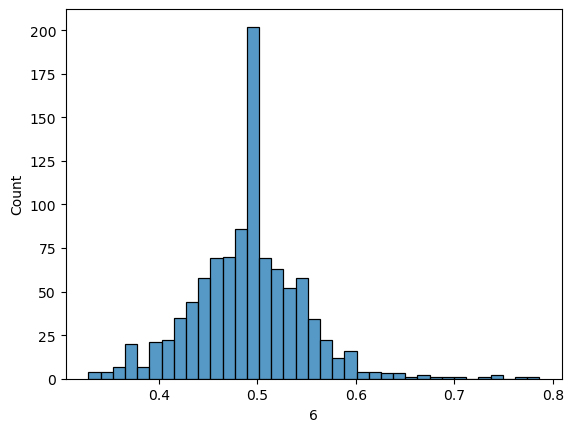

In [1026]:
sb.histplot(change_shift_auc_norm_30s.iloc[6])


In [1027]:
change_shift_auc_norm_30s

Shift_0   Shift_1   Shift_2   Shift_3   Shift_4   Shift_5   Shift_6  \
0     0.521343  0.500023  0.524861  0.496528  0.500741  0.433356  0.496852   
1     0.496528  0.483102  0.396736   0.48037  0.489583  0.481273  0.493056   
2     0.496528  0.486111  0.481181  0.511667  0.496528  0.486111  0.496528   
3     0.494444  0.431204  0.480069  0.496528  0.475694  0.546111  0.493056   
4     0.439583  0.492986  0.528935   0.46831  0.488819  0.493056  0.486111   
...        ...       ...       ...       ...       ...       ...       ...   
1106  0.496528       0.5       0.5       0.5  0.496528       0.5  0.496528   
1107  0.483264  0.494792  0.496528  0.494167  0.485602       0.5  0.496528   
1108       0.5       0.5  0.496528   0.43287       0.5       0.5       0.5   
1109       0.5  0.465278  0.496528  0.493056       0.5  0.496528  0.486875   
1110       0.5       0.5       0.5       0.5       0.5       0.5  0.496528   

       Shift_7   Shift_8   Shift_9  ... Shift_990 Shift_991 Shift_992  \
0     0.527315  0.404815  0.435949  ...  0.526644  0.488171  0.492037   
1     0.480556  0.491782  0.469097  ...   0.51463  0.446088  0.514144   
2     0.496528  0.483333  0.485231  ...  0.473056  0.482639  0.493056   
3     0.493171  0.565278  0.496528  ...  0.496528  0.445903  0.485255   
4     0.458241  0.518426  0.410394  ...  0.496227    0.4725  0.453681   
...        ...       ...       ...  ...       ...       ...       ...   
1106  0.496528  0.501065  0.496528  ...  0.482639  0.475324       0.5   
1107       0.5       0.5       0.5  ...  0.496528  0.493056  0.493056   
1108       0.5       0.5  0.494167  ...  0.496528       0.5       0.5   
1109  0.496528  0.496528   0.46088  ...  0.493056  0.496528  0.497546   
1110  0.496528       0.5  0.496528  ...  0.496528  0.496528  0.486111   

     Shift_993 Shift_994 Shift_995 Shift_996 Shift_997 Shift_998 Shift_999  
0     0.552639  0.502014  0.492431  0.415486  0.493171  0.476111   0.48963  
1     0.469907  0.494583  0.518542  0.494236  0.493056  0.524931  0.445486  
2     0.478264  0.490694  0.496528  0.503472  0.496528   0.46588  0.482894  
3     0.500162  0.459514  0.496528  0.512824  0.493056  0.566204  0.436181  
4     0.491019  0.430972  0.453866  0.474537  0.523472  0.446505  0.490278  
...        ...       ...       ...       ...       ...       ...       ...  
1106  0.496528  0.493056       0.5  0.493056  0.430556  0.486319  0.496528  
1107  0.496528  0.445394  0.483333       0.5  0.479421       0.5  0.496528  
1108       0.5       0.5       0.5  0.493056       0.5  0.493056    0.4375  
1109  0.488889       0.5  0.496528  0.493056       0.5  0.493056  0.496528  
1110       0.5       0.5       0.5  0.496528  0.458333  0.496528       0.5  

[1111 rows x 1000 columns]

In [1028]:
change_hungry_auc_norm_30s = trace_hungry_auc_norm_30s.auroc
excited_hungry_auc_norm_30s = pd.DataFrame()
inhibited_hungry_auc_norm_30s = pd.DataFrame()


excited_indices_auc_norm_30s = []
inhibited_indices_auc_norm_30s = []

for i in range(len(trace_hungry_30s)):
    change = change_hungry_auc_norm_30s[i]
    change_dist = change_shift_auc_norm_30s.iloc[i, :]

    if change > np.quantile(change_dist, 0.975): 
        excited_indices_auc_norm_30s.append(i)
    elif change < np.quantile(change_dist, 0.025): 
        inhibited_indices_auc_norm_30s.append(i)

# Using .iloc to select rows and then concat to form the final DataFrame
excited_hungry_auc_norm_30s = pd.concat([trace_hungry_30s.iloc[i] for i in excited_indices_auc_norm_30s], axis=1).T
inhibited_hungry_auc_norm_30s = pd.concat([trace_hungry_30s.iloc[i] for i in inhibited_indices_auc_norm_30s], axis=1).T

excited_hungry_auc_norm_30s = excited_hungry_auc_norm_30s[(excited_hungry_auc_norm_30s.iloc[:,Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]>-1.645).any(axis =1)]
excited_hungry_auc_norm_30s = excited_hungry_auc_norm_30s[(excited_hungry_auc_norm_30s.iloc[:, Bins_before-int(CompareRange_base*FR/BinSize)+2:Bins_before+2]< 1.645).any(axis =1)]

inhibited_hungry_auc_norm_30s = inhibited_hungry_auc_norm_30s[(inhibited_hungry_auc_norm_30s.iloc[:, Bins_before+2:Bins_before+int(CompareRange_after*FR/BinSize)+2]< 1.645).any(axis =1)]
inhibited_hungry_auc_norm_30s = inhibited_hungry_auc_norm_30s[(inhibited_hungry_auc_norm_30s.iloc[:, Bins_before-int(CompareRange_base*FR/BinSize)+2:Bins_before+2]> -1.645).any(axis =1)]

excited_hungry_auc_norm_30s = excited_hungry_auc_norm_30s[trace_hungry_auc_norm_30s.iloc[excited_hungry_auc_norm_30s.index.values].auroc>0.55]
inhibited_hungry_auc_norm_30s = inhibited_hungry_auc_norm_30s[trace_hungry_auc_norm_30s.iloc[inhibited_hungry_auc_norm_30s.index.values].auroc<0.45]

excited_indices_auc_norm_30s = excited_hungry_auc_norm_30s.index.values.tolist()
inhibited_indices_auc_norm_30s = inhibited_hungry_auc_norm_30s.index.values.tolist()


excited_hungry_mean_auc_norm_30s = excited_hungry_auc_norm_30s.iloc[:,2:].mean(axis=0).astype('float')
excited_hungry_sem_auc_norm_30s = excited_hungry_auc_norm_30s.iloc[:,2:].sem(axis=0).astype('float')
inhibited_hungry_mean_auc_norm_30s = inhibited_hungry_auc_norm_30s.iloc[:,2:].mean(axis=0).astype('float')
inhibited_hungry_sem_auc_norm_30s = inhibited_hungry_auc_norm_30s.iloc[:,2:].sem(axis=0).astype('float')


11

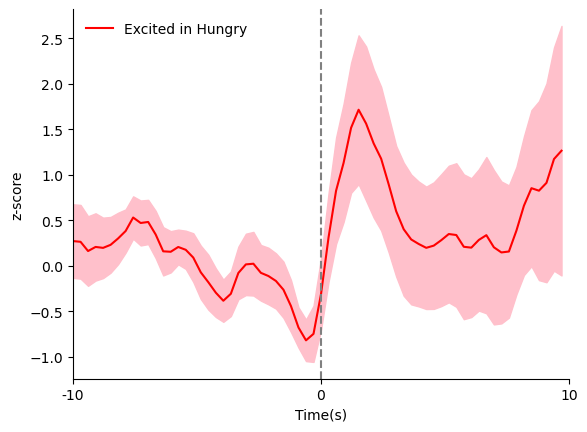

In [1033]:
x=np.arange(Bins)
y=excited_hungry_mean_auc_norm_30s
err = excited_hungry_sem_auc_norm_30s
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0, Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 2, framealpha = 0)
len(excited_hungry_auc_norm_30s)

31

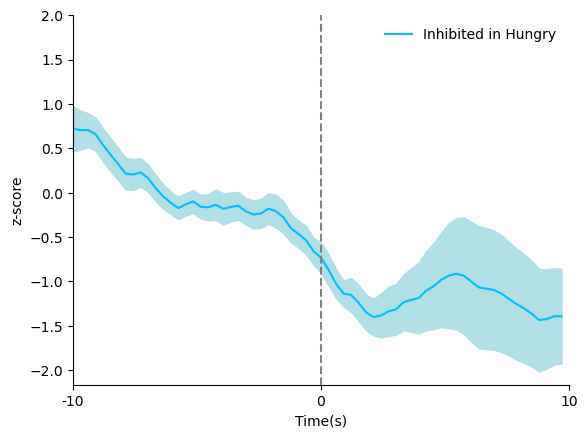

In [1031]:
x=np.arange(Bins)
y=inhibited_hungry_mean_auc_norm_30s
err = inhibited_hungry_sem_auc_norm_30s
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue', linestyle = '-')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,Bins_before,Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(None,2)
ax.axvline(Bins_before, color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry_auc_norm_30s)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


25

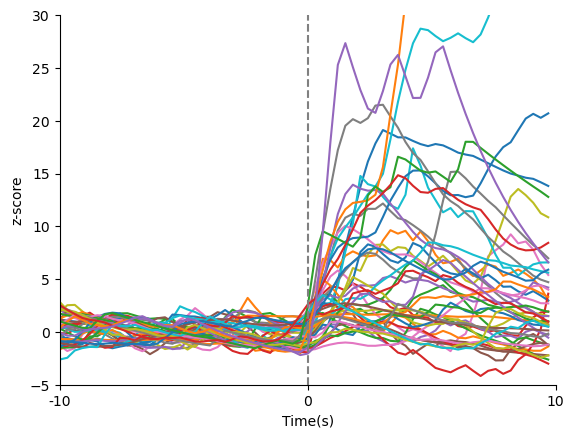

In [1008]:
x=np.arange(Bins)
y=excited_hungry_auc_norm_30s.iloc[:,2:]
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-5,30)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry_auc_norm_30s)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


31

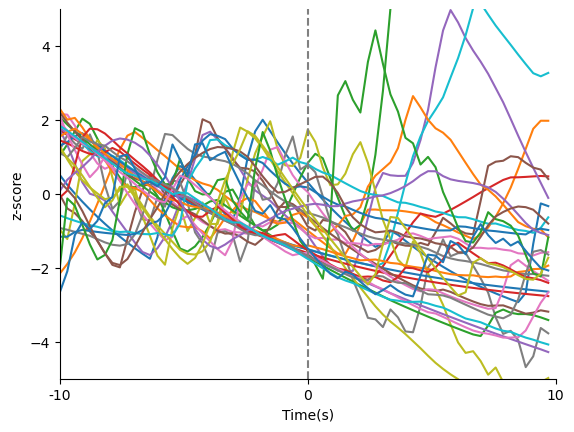

In [1035]:
x=np.arange(Bins)
y=inhibited_hungry_auc_norm_30s.iloc[:,2:]
err = inhibited_hungry_sem
fig, ax = plt.subplots()
for i in range(len(y)):
    ax.plot(x, y.iloc[i,:])
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-5,5)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry_auc_norm_30s)

[Text(0, 0, '0'), Text(0, 31, '31')]

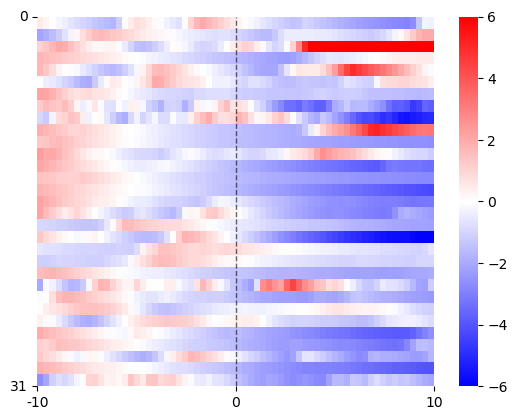

In [1036]:
ax = sb.heatmap(inhibited_hungry_auc_norm_30s.iloc[:,2:].astype('float'), vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(inhibited_hungry_auc_norm_30s)])
ax.set_yticklabels([0, len(inhibited_hungry_auc_norm_30s)])

[Text(0, 0, '0'), Text(0, 11, '11')]

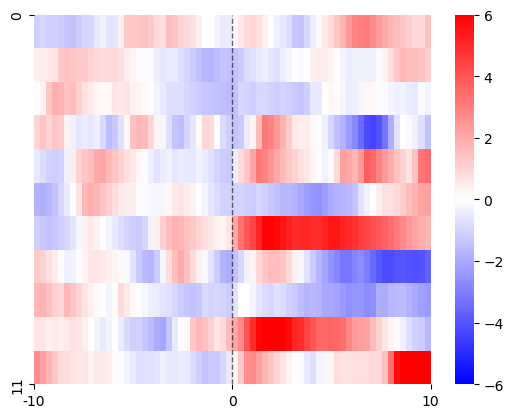

In [1037]:
ax = sb.heatmap(excited_hungry_auc_norm_30s.iloc[:,2:].astype('float'), vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int(Bins/2),Bins])
ax.axvline(Bins_before, ls = '--', lw = 1, c = 'black', alpha = 0.6)
ax.set_xticklabels([-TimeRange_before, 0, TimeRange_after])
ax.set_yticks([0,len(excited_hungry_auc_norm_30s)])
ax.set_yticklabels([0, len(excited_hungry_auc_norm_30s)])

In [1038]:
total_cells = len(trace_hungry_30s)

# Calculate percentages
percent_excited_30s = len(excited_indices_auc_norm_30s) / total_cells * 100
percent_inhibited_30s = len(inhibited_indices_auc_norm_30s) / total_cells * 100

percent_excited = len(excited_indices_auc_norm) / total_cells * 100

percent_inhibited = len(inhibited_indices_auc_norm) / total_cells * 100

# Find the intersection (cells that are in both excited_indices_30s and excited_indices)
common_excited_indices = set(excited_indices_auc_norm_30s).intersection(set(excited_indices_auc_norm))
percent_common_excited = len(common_excited_indices) / total_cells * 100

common_inhibited_indices = set(inhibited_indices_auc_norm_30s).intersection(set(inhibited_indices_auc_norm))
percent_common_inhibited = len(common_inhibited_indices) / total_cells * 100

excited_inhibited30s_indices = set(excited_indices_auc_norm).intersection(set(inhibited_indices_auc_norm_30s))
percent_excited_inhibited30s = len(excited_inhibited30s_indices) / total_cells * 100

inhibited_excited30s_indices = set(inhibited_indices_auc_norm).intersection(set(excited_indices_auc_norm_30s))
percent_inhibited_excited30s = len(inhibited_excited30s_indices) / total_cells * 100

# Printing the results
print(f"Percentage of excited cells (30s): {percent_excited_30s:.2f}%")
print(f"Percentage of inhibited cells (30s): {percent_inhibited_30s:.2f}%")
print(f"Percentage of excited cells: {percent_excited:.2f}%")
print(f"Percentage of inhibited cells: {percent_inhibited:.2f}%")
print(f"Percentage of cells excited in both cases: {percent_common_excited:.2f}%")
print(f"Percentage of cells inhibited in both cases: {percent_common_inhibited:.2f}%")
print(f"Percentage of cells excited in hungry cues and inhibited 30s before: {percent_excited_inhibited30s:.2f}%")
print(f"Percentage of cells inhibited in hungry cues and excited 30s before: {percent_inhibited_excited30s:.2f}%")



Percentage of excited cells (30s): 0.99%
Percentage of inhibited cells (30s): 2.79%
Percentage of excited cells: 2.25%
Percentage of inhibited cells: 3.96%
Percentage of cells excited in both cases: 0.09%
Percentage of cells inhibited in both cases: 0.00%
Percentage of cells excited in hungry cues and inhibited 30s before: 0.09%
Percentage of cells inhibited in hungry cues and excited 30s before: 0.00%


In [1039]:
common_excited_indices

{270}

In [1040]:
common_inhibited_indices

set()

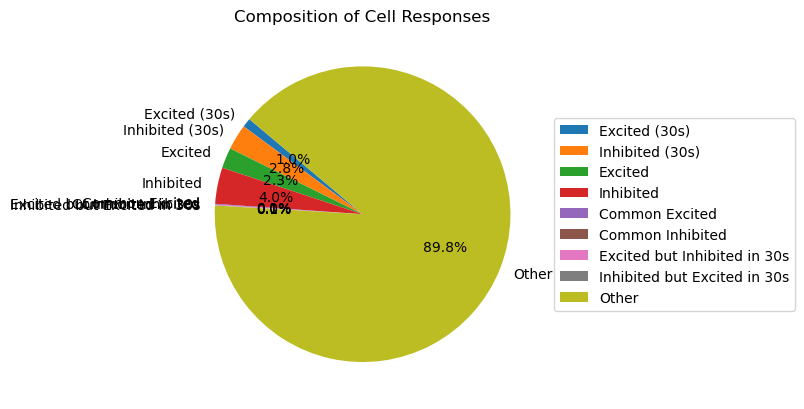

In [1041]:
# Assuming you have the total number of cells and the counts for each category
total_cells = len(trace_hungry_30s.index)
excited_30s_count = len(excited_indices_auc_norm_30s)
inhibited_30s_count = len(inhibited_indices_auc_norm_30s)
excited_count = len(excited_indices_auc_norm)
inhibited_count = len(inhibited_indices_auc_norm)
common_excited_count = len(common_excited_indices)
common_inhibited_count = len(common_inhibited_indices)
excited_inhibited30s_count = len(excited_inhibited30s_indices)
inhibited_excited30s_count = len(inhibited_excited30s_indices)

# Calculate the count of cells not in any of the above categories
other_count = total_cells - (excited_30s_count + inhibited_30s_count + excited_count + inhibited_count + common_excited_count + common_inhibited_count + excited_inhibited30s_count + inhibited_excited30s_count)

# Calculate percentages
percentages = {
    "Excited (30s)": excited_30s_count / total_cells * 100,
    "Inhibited (30s)": inhibited_30s_count / total_cells * 100,
    "Excited": excited_count / total_cells * 100,
    "Inhibited": inhibited_count / total_cells * 100,
    "Common Excited": common_excited_count / total_cells * 100,
    "Common Inhibited": common_inhibited_count / total_cells * 100,
    "Excited but Inhibited in 30s": excited_inhibited30s_count / total_cells * 100,
    "Inhibited but Excited in 30s": inhibited_excited30s_count / total_cells * 100,
    "Other": other_count / total_cells * 100
}

# Code to create a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(percentages.values(), labels=percentages.keys(), autopct='%1.1f%%', startangle=140)

# Draw a legend with some space around each entry
ax.legend(wedges, percentages.keys(), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Composition of Cell Responses')
plt.show()





In [1042]:
trace_hungry.iloc[270]

Animal_ID         7H6
cell_id             2
0           -1.654474
1           -1.351194
2           -0.841823
               ...   
61          -1.627845
62          -1.658466
63          -1.782192
64          -1.781074
65          -1.376206
Name: 270, Length: 68, dtype: object

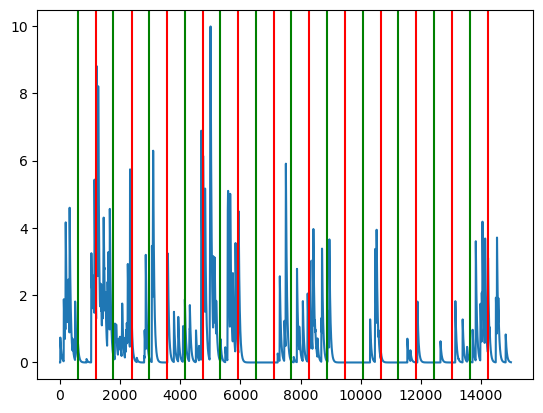

In [1058]:
df = all_dataframes[4]
cue_range = hungrycue
cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1
cueonset_30sbefore = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) >0.5)[0]) + 1 -int(30*FR)
if cue_range is not None:
    # Select a subset of cueonset based on cue_range
    cueonset = cueonset[cue_range[0]:cue_range[1]]
    cueonset_30sbefore = cueonset_30sbefore[cue_range[0]:cue_range[1]]
plt.plot(all_dataframes[4].iloc[2, 2:15000])
for i in range(len(cueonset)):
    plt.axvline(cueonset[i], c = 'r')
    plt.axvline(cueonset_30sbefore[i], c = 'g')

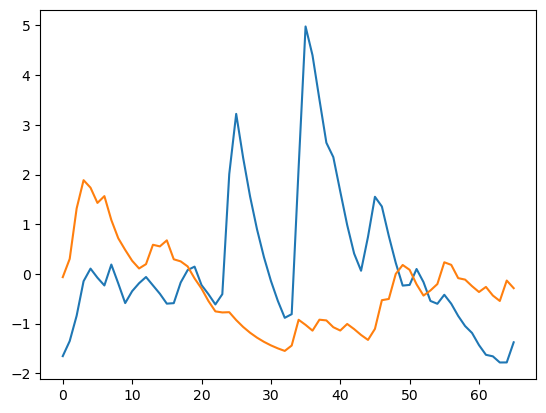

In [1059]:
plt.plot(trace_hungry.iloc[270, 2:])
plt.plot(trace_hungry_30s.iloc[270, 2:])

25

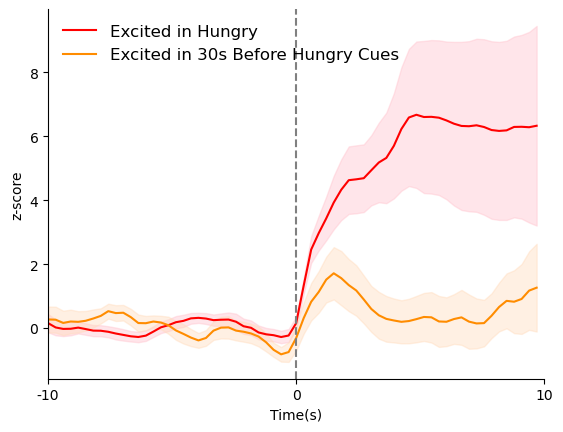

In [1062]:
x=np.arange(Bins)
y=excited_hungry_mean_auc_norm
z=excited_hungry_mean_auc_norm_30s
erry = excited_hungry_sem_auc_norm
errz = excited_hungry_sem_auc_norm_30s
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.plot(x, z, label = 'Excited in 30s Before Hungry Cues', color = 'darkorange')
ax.fill_between(x, y-erry, y+erry, color='pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='peachpuff', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry_auc_norm)


39

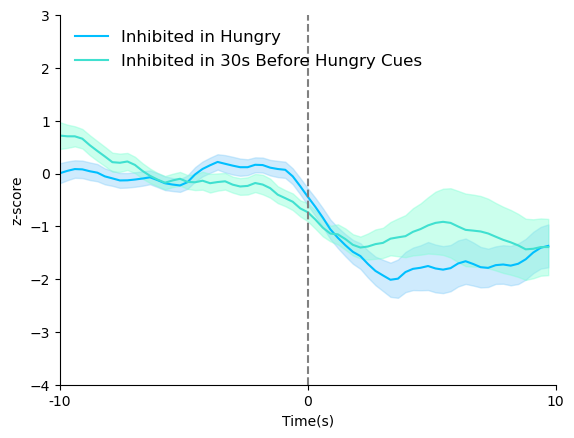

In [1063]:
x=np.arange(Bins)
y=inhibited_hungry_mean_auc_norm
z=inhibited_hungry_mean_auc_norm_30s
erry = inhibited_hungry_sem_auc_norm
errz = inhibited_hungry_sem_auc_norm_30s
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue')
ax.plot(x, z, label = 'Inhibited in 30s Before Hungry Cues', color = 'turquoise')
ax.fill_between(x, y-erry, y+erry, color='lightskyblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='aquamarine', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 3)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize= 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)

In [1116]:
def calculate_roc_auc(tracezscore, Bins_before, CompareRange_base, CompareRange_after, FR, BinSize):
    # Define the time window before and after cue onset
    time_before_cue = int(CompareRange_base * FR / BinSize)
    time_after_cue = int(CompareRange_after * FR / BinSize)
    
    # Initialize the binary series for cue onset
    cueon = pd.Series(0, index=tracezscore.columns)
    cueon[Bins_before:(Bins_before + time_after_cue)] = 1
    cueon = cueon[:(tracezscore.shape[1] - time_after_cue)]
    tracezscore = tracezscore.iloc[:, :(tracezscore.shape[1] - time_after_cue)]
    
    # Calculate the ROC AUC for each neuron
    roc_aucs = []
    for neuron_index in range(tracezscore.shape[0]):
        test_neuron = tracezscore.iloc[neuron_index, :]
        fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
        roc_auc = auc(fpr, tpr)
        roc_aucs.append(roc_auc)
    
    return roc_aucs


def calculate_changes_auc_30sbefore(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, num_shifts=1000, seed=42):
    random.seed(seed)
    cueonset = np.array(np.where(np.diff(df[df['cell_id'] == 'Tone active'].iloc[:, 2:].squeeze()) > 0.5)[0]) + 1 - int(30*FR)
    if cue_range is not None:
        cueonset = cueonset[cue_range[0]:cue_range[1]]
    
    trace = df[df['cell_id'].astype(str).str.isnumeric()].iloc[:, 2:]
#     trace = trace.sub(trace.mean(axis = 1), axis =0).divide(trace.std(axis = 1), axis =0)

    # Perform ROC analysis for each shift for each neuron
    roc_aucs_all_shifts = np.zeros((len(trace), num_shifts))
    

    for j in range(num_shifts):
        shift = random.randint(0, len(trace.columns))
        shifted_trace = np.roll(trace.values, shift, axis=1)
        tracenew = pd.DataFrame(0, index=trace.index, columns=np.arange(TotalFrame))
        

        # Use shifted_trace for calculations
        for i in range(TotalFrame):
            start = cueonset - FrameRange_before + i
            valid_starts = start[start >= 0]
            # Apply mean calculation on the shifted_trace
            tracenew.iloc[:,i] = shifted_trace[:, valid_starts].mean(axis=1)
        

        tracebin = tracenew.groupby(pd.cut(tracenew.columns, Bins), axis=1).mean()
        tracebin.columns = np.arange(0, Bins)
        
        # Calculate the mean and std, handle the situation of 0 std
        mean_vals = tracebin.iloc[:, 0:Bins_before].mean(axis=1)
        std_vals = tracebin.iloc[:, 0:Bins_before].std(axis=1)
        
        # Create a mask where the mean is < 0.001 or std is < 0.001
        low_variance_mask = (mean_vals < 0.001) | (std_vals < 0.001)

        # Replace std values that are 0 with NaN, as well as where the mean is < 0.001
        std_vals_replaced = std_vals.mask(low_variance_mask, np.nan)
    
        # Calculate z-scores, NaN will result in the z-scores where std is zero
        tracezscore = tracebin.sub(mean_vals, axis=0).divide(std_vals_replaced, axis=0)
        
        # Replace NaN z-scores with 0, as these are the ones with std of 0
        tracezscore = tracezscore.fillna(0)

        roc_aucs_all_shifts[:, j] = calculate_roc_auc(tracezscore, Bins_before, CompareRange_base, CompareRange_after, FR, BinSize)

    return roc_aucs_all_shifts


def worker_process_auc_30s(data):
    FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df = data
    # Call the calculate_changes_auc function with appropriate parameters
    return calculate_changes_auc_30sbefore(df, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range)

def parallel_process_and_calculate_change_auc_30s(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range):
    # Determining the number of processes based on available CPU cores
    num_processes = psutil.cpu_count(logical=False)

    # Create a multiprocessing pool and process data
    pool = multiprocessing.Pool(processes=num_processes)
    results = pool.map(worker_process_auc, [(FrameRange_before, TotalFrame, Bins, Bins_before, cue_range, df) for df in all_dataframes])
    pool.close()
    pool.join()

    # Flatten list of results and convert to DataFrame
    final_df = pd.concat([pd.DataFrame(result) for result in results], ignore_index=True)
    return final_df


# The final_results_df contains the calculated changes for each DataFrame


In [1117]:
%%time
change_shift_auc = parallel_process_and_calculate_change_auc_30s(all_dataframes, FrameRange_before, TotalFrame, Bins, Bins_before, cue_range=hungrycue)

CPU times: user 28.5 ms, sys: 1.03 s, total: 1.06 s
Wall time: 2min 10s


In [1118]:
change_shift_auc

0         1         2         3         4         5         6    \
0   0.966016  0.945547  0.500234  0.648594  0.984141  0.175391  0.543750   
1   0.155469  0.345313  0.177891  0.538281  0.443828  0.726094  0.429844   
2   0.025547  0.387109  0.375000  0.571328  0.008203  0.502734  0.816563   
3   0.024531  0.374297  0.077500  0.452422  0.232969  0.752891  0.481953   
4   0.331953  0.853516  0.225547  0.595078  0.778828  0.132031  0.520938   
5   0.375000  0.941016  0.285859  0.431562  0.875703  0.092891  0.376328   
6   0.083047  0.427578  0.083828  0.421406  0.700391  0.287578  0.378984   
7   0.253437  0.255312  0.374297  0.237031  0.845547  0.669297  0.364063   
8   0.149219  0.832812  0.903203  0.480781  0.991250  0.358828  0.376094   
9   0.484844  0.831484  0.185312  0.256563  0.306328  0.092344  0.064844   
10  0.007578  0.583594  0.056875  0.209219  0.778438  0.307266  0.380078   
11  0.306953  0.646016  0.861797  0.463750  0.210000  0.971016  0.675156   
12  0.488359  0.723672  0.665859  0.111094  0.898359  0.062266  0.566953   
13  0.163516  0.278906  0.492031  0.405469  0.138359  0.766797  0.563359   
14  0.476016  0.000625  0.128672  0.522578  0.658984  0.587969  0.265313   
15  0.996484  0.230703  0.638750  0.732266  0.290156  0.424922  0.915859   
16  0.264844  0.672031  0.526641  0.010313  0.665703  0.135391  0.598672   
17  0.505703  0.020078  0.200547  0.506797  0.253672  0.510859  0.895859   
18  0.189531  0.371719  0.375000  0.609297  0.150078  0.377188  0.730312   
19  0.387891  0.498281  0.612109  0.537500  0.143750  0.638359  0.970156   
20  0.267891  0.319688  0.514609  0.321094  0.756719  0.267188  0.245703   
21  0.525000  0.704219  0.629609  0.288359  0.967031  0.433906  0.312344   
22  0.074844  0.692188  0.548906  0.529609  0.779687  0.291094  0.419453   
23  0.925156  0.532891  0.375000  0.375000  0.615313  0.066406  0.376328   
24  0.073203  0.313672  0.924453  0.207734  0.452578  0.064531  0.785156   
25  0.375000  0.394687  0.751016  0.514687  0.728281  0.443672  0.560937   
26  0.123594  0.591719  0.812656  0.363750  0.283203  0.981563  0.498359   
27  0.456328  0.388125  0.848906  0.435391  0.987578  0.087187  0.278203   
28  0.359219  0.755469  0.703125  0.235781  0.620391  0.822266  0.984141   
29  0.302734  0.363750  0.757187  0.502578  0.337109  0.855703  0.721562   
30  0.305547  0.569375  0.036172  0.508359  0.395078  0.781875  0.152969   
31  0.071875  0.919687  0.544922  0.644609  0.138906  0.799219  0.464766   
32  0.913281  0.892500  0.357578  0.631328  0.584531  0.346250  0.840391   
33  0.616406  0.699063  0.939844  0.536875  0.402109  0.088594  0.380000   
34  0.942422  0.867031  0.450469  0.378672  0.350078  0.279141  0.631172   
35  0.549063  0.590391  0.848203  0.538750  0.264609  0.616172  0.881016   
36  0.627969  0.489063  0.589297  0.639219  0.237812  0.648984  0.871875   
37  0.979297  0.994375  0.693281  0.661875  0.369844  0.639844  0.580313   
38  0.877266  0.599141  0.705469  0.589375  0.072187  0.463359  0.523906   
39  0.361250  0.633438  0.304844  0.206172  0.928125  0.699063  0.672500   
40  0.877109  0.978516  0.784531  0.756328  0.474766  0.662734  0.287031   
41  0.616172  0.407813  0.350000  0.966953  0.077578  0.877969  0.588203   
42  0.193125  0.166484  0.374766  0.409922  0.426641  0.963750  0.461641   
43  0.024766  0.060000  0.375547  0.566641  0.365000  0.869922  0.452500   
44  0.535000  0.395547  0.464375  0.444688  0.429063  0.358828  0.453672   
45  0.898359  0.080781  0.182969  0.818047  0.765391  0.328281  0.240000   
46  0.065078  0.366406  0.935781  0.606797  0.306328  0.258125  0.203828   
47  0.709609  0.832344  0.522969  0.379609  0.714219  0.644766  0.717109   
48  0.934375  0.666875  0.575391  0.412187  0.754375  0.391797  0.292969   
49  0.580547  0.810469  0.954219  0.562266  0.207344  0.195781  0.865703   
50  0.249688  0.455000  0.625078  0.811953  0.627500  0.285938  0.912031   
51  0.057813  0.498281  0.659844  0.345234  0.455156  0.8

In [1113]:
tracehungry = trace_hungry.iloc[:,2:]

(array([ 80.,  82.,  96., 140., 127., 108., 101.,  84.,  95.,  87.]),
 array([0.        , 0.09982031, 0.19964062, 0.29946094, 0.39928125,
        0.49910156, 0.59892187, 0.69874219, 0.7985625 , 0.89838281,
        0.99820312]),
 <BarContainer object of 10 artists>)

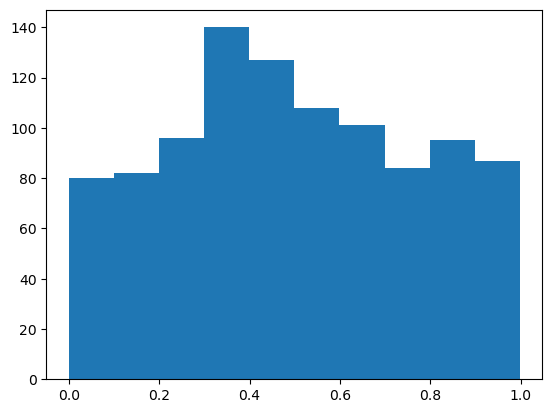

In [1124]:
plt.hist(change_shift_auc.iloc[5,:])

In [ ]:
## tracehungry = trace_hungry.iloc[:,2:]
change_hungry_auc = calculate_roc_auc(tracehungry, Bins_before, CompareRange_base, CompareRange_after, FR, BinSize)

excited_hungry = pd.DataFrame()
inhibited_hungry = pd.DataFrame()
excitedsem_hungry = pd.DataFrame()
inhibitedsem_hungry = pd.DataFrame()

excited_indices = []
inhibited_indices = []

for i in range(len(trace_hungry)):
    change = change_hungry_auc[i]
    change_dist = change_shift_auc.iloc[i, :]

    if change > np.quantile(change_dist, 0.975): 
        excited_indices.append(i)
    elif change < np.quantile(change_dist, 0.025): 
        inhibited_indices.append(i)

# Using .iloc to select rows and then concat to form the final DataFrame
excited_hungry = pd.concat([trace_hungry.iloc[i] for i in excited_indices], axis=1).T
inhibited_hungry = pd.concat([trace_hungry.iloc[i] for i in inhibited_indices], axis=1).T

excited_hungry_mean = excited_hungry.iloc[:,2:].mean(axis=0).astype('float')
excited_hungry_sem = excited_hungry.iloc[:,2:].sem(axis=0).astype('float')
inhibited_hungry_mean = inhibited_hungry.iloc[:,2:].mean(axis=0).astype('float')
inhibited_hungry_sem = inhibited_hungry.iloc[:,2:].sem(axis=0).astype('float')

excited_hungry_median = excited_hungry.iloc[:,2:].median(axis=0).astype('float')
excited_hungry_mad =  excited_hungry.iloc[:,2:].sub(excited_hungry_median, axis=0).abs().median(axis=0).astype('float')

In [1105]:
inhibited_indices

[]

In [ ]:
x=np.arange(Bins)
y=excited_hungry_mean
err = excited_hungry_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 2, framealpha = 0)
len(excited_hungry)

494

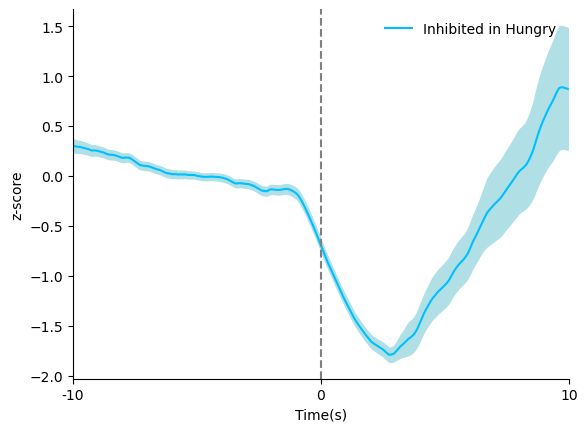

In [1059]:
x=np.arange(Bins)
y=inhibited_hungry_mean
err = inhibited_hungry_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue', linestyle = '-')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange_before,'0',TimeRange_after])
ax.set_xlim(0, Bins)
# ax.set_ylim(-,1)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry)

In [1091]:

tracezscore = trace_hungry.iloc[0:10, 2:]
# Define the time window before and after cue onset
time_before_cue = int(CompareRange_base * FR / BinSize)

# Initialize the binary series for cue onset
cueon = pd.Series(0, index=tracezscore.columns)
cueon[Bins_before:Bins_before + time_after_cue] = 1
cueon = cueon[:Bins_before + time_after_cue]
tracezscore = tracezscore.iloc[:, :Bins_before + time_after_cue]

# Calculate the ROC AUC for each neuron
roc_aucs = []
for neuron_index in range(tracezscore.shape[0]):
    test_neuron = tracezscore.iloc[neuron_index, :]
    fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)




In [1092]:
roc_aucs

[0.377,
 1.0,
 0.62975,
 0.538875,
 0.0,
 0.5325,
 0.8714999999999999,
 0.546,
 0.04012500000000001,
 0.788]

In [1109]:
time_after_cue = int(CompareRange_after * FR / BinSize)

# Initialize the series with zeros
cueon = pd.Series(0, index=trace_hungry.columns[2:Bins_before+time_after_cue+2])

cueon.iloc[Bins_before:(Bins_before+time_after_cue)] = 1


In [1110]:
len(cueon)

240

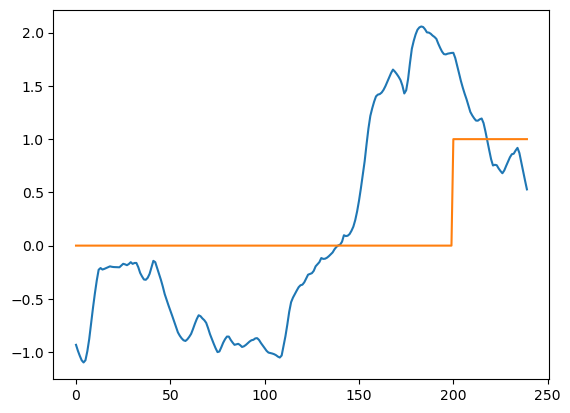

In [1111]:
plt.plot(test_neuron)
plt.plot(cueon)

In [1011]:
fpr, tpr, thresholds = roc_curve(cueon, test_neuron)
roc_auc = auc(fpr, tpr)

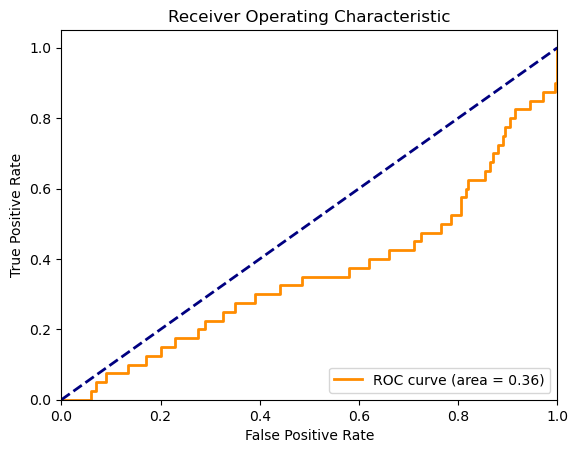

In [1012]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


548 neurons in Satiated


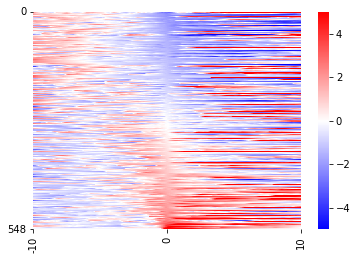

In [6]:
tracesatiated = pd.DataFrame()

for n in range(len(os.listdir(satiated_dir))):
    f = pd.read_pickle(os.path.join(satiated_dir, os.listdir(satiated_dir)[n]))
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)] 
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracesatiated = tracesatiated.append(tracezscore)

tracesorted_satiated = tracesatiated.sort_values(by=int((Bins/2)), axis =0)
ax = sb.heatmap(tracesorted_satiated, vmin = -5, vmax= 5, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(tracesorted_satiated)])
ax.set_yticklabels([0, len(tracesorted_satiated)])
print(str(len(tracesatiated)) + ' neurons in Satiated')

In [514]:
tracesatiated.iloc[excited_satiated_where[0].values]

animal         0         1         2         3         4         5  \
27        0  0.470692  0.654644  0.860812  0.952894  1.032085  1.065121   
30        0 -0.039436 -0.093490  0.055404  0.543660  1.011494  1.445234   
43        1  2.438022  2.263680  2.118896  2.022368  1.960031  1.917888   
79        1 -2.280969 -2.131675 -2.039084 -2.072221 -2.101977 -2.127647   
31        2  3.174318  3.104992  2.969346  2.850540  2.749734  2.670915   
61        2  0.350054  0.281553  0.211467  0.142887  0.076957  0.040118   
64        2  1.008499  1.013832  1.017803  1.019259  1.018810  1.021841   
75        2  1.579664  1.579869  1.635202  1.682170  1.695176  1.705331   
128       2  1.748508  1.760607  1.795060  1.770619  1.742765  1.716353   
164       2  0.704049  0.753369  0.794725  0.815588  0.826500  0.891833   
65        3 -0.229285 -0.187068 -0.140886 -0.082532 -0.021611  0.038304   
68        3 -0.321379 -0.370139 -0.419782 -0.470336 -0.521309 -0.569227   
73        3  1.184086  1.094786  1.052310  1.085582  1.142013  1.134864   
69        4 -1.458403 -1.329311 -1.184311 -1.037782 -0.907276 -0.800075   
75        4 -1.273003 -1.248314 -1.086900 -0.962767 -0.863219 -0.821594   
160       4  0.578165  0.526864  0.501277  0.502811  0.527944  0.573287   
165       4 -0.187056 -0.187120 -0.187183 -0.187247 -0.187314 -0.187381   
19        5 -1.738586 -1.661562 -1.596751 -1.494202 -1.412390 -1.350978   

            6         7         8  ...        390        391        392  \
27   1.058539  1.035803  1.016503  ...  13.145886  13.159964  13.195382   
30   1.832275  1.739386  1.649861  ...  13.204810  14.172574  15.279521   
43   1.875658  1.818285  1.711014  ...  -0.549682  -0.623729  -0.697879   
79  -2.146446 -2.159962 -2.062753  ...   3.502776   3.532399   3.556621   
31   2.607324  2.549539  2.495814  ...   2.501837   2.640472   2.780405   
61   0.034304  0.032905  0.025754  ...   0.729290   0.644331   0.564313   
64   1.022387  1.012884  0.998374  ...  15.876237  15.807105  15.745294   
75   1.685766  1.658041  1.623127  ...   0.067657   0.015268  -0.034329   
128  1.742612  1.818959  1.902313  ...   9.023870   9.056956   9.137965   
164  1.020829  1.193717  1.342597  ...   4.943473   4.836158   4.733792   
65   0.086738  0.121056  0.159609  ...   9.461787   9.399534   9.314468   
68  -0.614898 -0.660134 -0.699445  ...   5.337290   5.278153   5.284015   
73   1.040851  0.947746  0.871417  ...  -3.397700  -3.358673  -3.306626   
69  -0.721424 -0.661679 -0.627306  ...   4.090401   4.048647   4.006864   
75  -0.696735 -0.637512 -0.587604  ...  -2.239931  -2.263013  -2.286187   
160  0.634645  0.915827  1.140570  ...   3.604129   3.462814   3.329495   
165 -0.187447 -0.187509 -0.187567  ...   0.067963   0.062507   0.057039   
19  -1.301819 -1.240345 -1.138822  ...  -2.409845  -2.472114  -2.512588   

           393        394        395        396        397        398  \
27   13.211695  13.219725  13.178236  13.100564  13.012577  12.928227   
30   16.443090  17.607198  18.862147  20.359277  21.978908  23.596031   
43   -0.725100  -0.709167  -0.653558  -0.513295  -0.291393  -0.038469   
79    3.621846   3.703012   3.796673   3.873728   3.942841   4.005296   
31    2.976746   3.068187   3.097436   3.160874   3.278911   3.418301   
61    0.562971   0.577989   0.518242   0.441897   0.367098   0.292472   
64   15.693715  15.643516  15.599079  15.559999  15.526476  15.492239   
75   -0.072137  -0.105651  -0.133591  -0.159741  -0.176208  -0.146620   
128   9.186076   9.167614   9.152639   9.134587   9.121221   9.115756   
164   4.642404   4.554317   4.481473   4.410789   4.341162   4.272075   
65    9.224715   9.143629   9.050170   8.955287   8.882529   8.808144   
68    5.319353   5.270592   5.214511   5.160100   5.105831   5.049708   
73   -3.240475  -3.162656  -3.075835  -2.982379  -2.923015  -2.926544   
69    3.964445   3.879300   3.798971   3.722374   3.642016   3.548398   
75   -2.296645  -2.302421  -2.295041  -2.274468  -2.257393

In [643]:
tracehungry.iloc[inhibited_hungry_where[0].values]

animal         0         1         2         3         4         5  \
23        0 -1.616613 -1.585188 -1.601101 -1.620669 -1.635934 -1.641918   
25        0  2.702189  2.637037  2.531460  2.325824  2.128685  2.035768   
75        0 -0.559045 -0.285690 -0.093084  0.001171 -0.084242 -0.204734   
15        1 -0.482663 -0.565050 -0.641095 -0.509216 -0.557633 -0.706390   
18        1 -1.071018 -1.111492 -1.112534 -1.137909 -1.197475 -1.175335   
94        1  0.256518  0.210937  0.157520  0.085694 -0.009537 -0.152713   
30        2  2.033254  1.971719  1.909859  1.839165  1.763595  1.688709   
75        2 -0.541125 -0.558019 -0.576548 -0.606455 -0.638542 -0.672051   
24        3  2.139861  2.078425  2.066446  2.071124  2.092020  2.035252   
63        4 -2.196429 -2.180101 -2.157660 -2.130551 -2.104350 -2.078414   
71        4 -0.721260 -0.731087 -0.739900 -0.747431 -0.753892 -0.759361   
76        4  3.667597  3.390174  3.135783  2.913327  2.712627  2.541132   
134       4  0.543626  0.482284  0.467226  0.383668  0.393721  0.432737   
140       4  0.837570  0.754477  0.677880  0.602483  0.529641  0.453780   
190       4 -0.630129 -0.640953 -0.648078 -0.650751 -0.654584 -0.657974   
14        5  1.039540  1.096313  1.147176  1.185628  1.210688  1.218359   
65        5  0.968771  0.896769  0.796018  0.875957  0.954526  1.066086   

            6         7         8  ...       390       391       392  \
23  -1.638401 -1.634918 -1.633767  ...  0.963389  0.885489  0.798120   
25   1.947518  1.832664  1.669055  ...  6.474717  6.571043  6.629540   
75  -0.319495 -0.430668 -0.340207  ... -6.743553 -6.693060 -6.643981   
15  -0.706883 -0.712692 -0.793210  ... -5.414101 -5.425872 -5.447971   
18  -1.117509 -1.056949 -0.996861  ...  0.443856  0.675832  0.637716   
94  -0.347506 -0.491600 -0.559105  ...  3.280336  3.509632  3.755480   
30   1.616084  1.546385  1.475299  ...  1.772353  1.703743  1.804203   
75  -0.705293 -0.737689 -0.771031  ... -5.324065 -5.322337 -5.300097   
24   1.957784  1.912866  1.939379  ... -3.762372 -3.841906 -3.915417   
63  -2.054262 -2.027303 -2.002172  ... -2.937526 -2.901146 -2.860533   
71  -0.763853 -0.767418 -0.770165  ...  7.505612  7.307791  7.100951   
76   2.393473  2.276258  2.185399  ...  4.189010  4.080198  3.964856   
134  0.479375  0.553643  0.597460  ... -1.168258 -1.230792 -1.210113   
140  0.379514  0.314531  0.244755  ... -3.902400 -3.908730 -3.914863   
190 -0.662040 -0.665081 -0.667284  ... -1.694541 -1.709944 -1.724679   
14   1.221722  1.222310  1.223505  ... -2.418108 -2.422780 -2.438764   
65   1.020283  0.853456  0.687274  ... -1.214368 -1.300670 -1.388599   

          393       394       395       396       397       398       399  
23   0.685499  0.567268  0.457800  0.356547  0.274774  0.188907  0.115143  
25   6.634507  6.617023  6.601222  6.628460  6.522299  6.258802  6.038889  
75  -6.608894 -6.688296 -6.811529 -6.937216 -7.061164 -7.189703 -7.318145  
15  -5.392954 -5.097914 -4.787665 -4.533761 -4.344309 -4.201401 -4.143800  
18   0.597013  0.573770  0.550657  0.527262  0.433701  0.336124  0.268246  
94   3.971865  4.053263  3.967217  3.873661  3.782794  3.687217  3.583081  
30   1.904229  1.831547  1.757415  1.683032  1.609674  1.535312  1.462409  
75  -5.267619 -5.238418 -5.212189 -5.190423 -5.170830 -5.162265 -5.161228  
24  -3.974105 -4.024221 -4.072020 -4.116244 -4.156077 -4.193867 -4.228803  
63  -2.811681 -2.752561 -2.680453 -2.596912 -2.507198 -2.417507 -2.337953  
71   6.885265  6.663310  6.443103  6.244414  6.049080  5.849625  5.647167  
76   3.842114  3.716032  3.592844  3.477881  3.362345  3.241466  3.114476  
134 -1.232765 -1.255966 -1.237871 -1.072028 -0.824409 -0.534869 -0.232708  
140 -3.920872 -3.926648 -3.932398 -3.937959 -3.943480 -3.948913 -3.954267  
190 -1.738991 -1.754237 -1.769648 -1.784572 -1.799879 -1.815813 -1.831261  
14  -2.448688 -2.448195 -2.448225 -2.455604 -2.454062 -2.447547 -2.438611  
65  -1.476040 -1.558177 -1.632773 -1.698635 -1.756410 -1.643414 -

In [617]:
trace=pd.read_pickle(os.path.join(hungry_dir, os.listdir(hungry_dir)[4]))
len(trace)

141

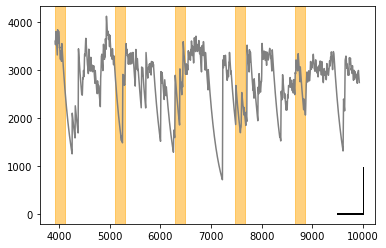

In [694]:
fig, ax = plt.subplots()
ax.plot(trace.loc['17'][(cueonset[5]-3000):(cueonset[5]+3000)], color = 'gray')
ax.axvspan(3921, 3921+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(5107, 5107+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(6292, 6292+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(7478, 7478+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(8664, 8664+10*FR, color = 'Orange', alpha = 0.5)
ax.axhline(y = 0, xmin = 0.89, xmax=0.965, lw=2, color = 'black')
ax.axvline(x= 10000, ymin =0.05, ymax = 0.26, lw =1, color = 'black')

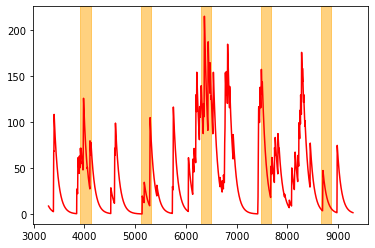

In [535]:
fig, ax = plt.subplots()
ax.plot(trace.loc['30'][(cueonset[5]-3000):(cueonset[5]+3000)], color = 'red')
ax.axvspan(3921, 3921+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(5107, 5107+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(6292, 6292+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(7478, 7478+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(8664, 8664+10*FR, color = 'Orange', alpha = 0.5)

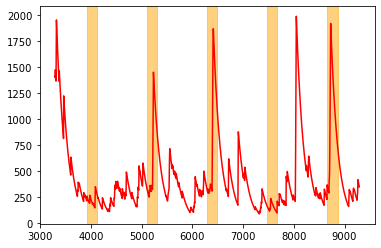

In [461]:
fig, ax = plt.subplots()
ax.plot(trace.iloc[21, (cueonset[5]-3000):(cueonset[5]+3000)], color = 'red')
ax.axvspan(3921, 3921+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(5107, 5107+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(6292, 6292+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(7478, 7478+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(8664, 8664+10*FR, color = 'Orange', alpha = 0.5)

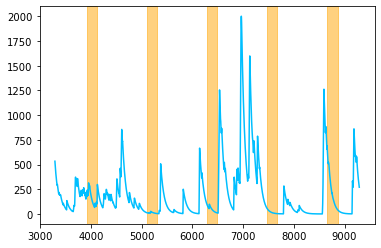

In [556]:
fig, ax = plt.subplots()
ax.plot(trace.loc['66'][(cueonset[5]-3000):(cueonset[5]+3000)], color = 'deepskyblue')
ax.axvspan(3921, 3921+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(5107, 5107+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(6292, 6292+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(7478, 7478+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(8664, 8664+10*FR, color = 'Orange', alpha = 0.5)

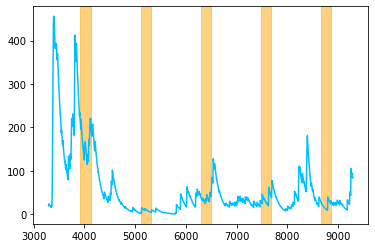

In [561]:
fig, ax = plt.subplots()
ax.plot(trace.loc['2'][(cueonset[5]-3000):(cueonset[5]+3000)], color = 'deepskyblue')
ax.axvspan(3921, 3921+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(5107, 5107+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(6292, 6292+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(7478, 7478+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(8664, 8664+10*FR, color = 'Orange', alpha = 0.5)

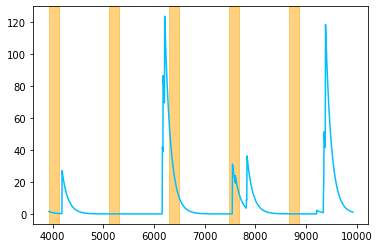

In [594]:
fig, ax = plt.subplots()
ax.plot(trace.loc['190'][(cueonset[5]-3000):(cueonset[5]+3000)], color = 'deepskyblue')
ax.axvspan(3921, 3921+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(5107, 5107+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(6292, 6292+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(7478, 7478+10*FR, color = 'Orange', alpha = 0.5)
ax.axvspan(8664, 8664+10*FR, color = 'Orange', alpha = 0.5)

In [429]:
cueonset

array([  362,  1549,  2734,  3921,  5107,  6292,  7478,  8664,  9850,
       11036, 12222, 13409], dtype=int64)

In [179]:
%%time

change_shift_satiated = np.array([])

for n in range(len(os.listdir(satiated_dir))):
    f = pd.read_pickle(os.path.join(satiated_dir, os.listdir(satiated_dir)[n]))
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)]
    change_shift = np.zeros((len(trace), 100))
    shift = random.sample(range(len(trace.columns)), 100)
    trace = np.array(trace)
    for j in range(len(shift)):        
        tracenew = pd.DataFrame(0, index = f[:(len(f)-2)].index, columns= np.arange(TotalFrame))
        trace = np.roll(trace, shift[j], axis = 1)
        for i in range(TotalFrame):
            tracenew.iloc[:,i] = trace[:,start+i].mean(axis=1)
        tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
        tracebin.columns = np.arange(0,Bins)
        tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
        before_shift = tracezscore.iloc[:,(int(Bins/2)-int(CompareRange_base*FR/BinSize)):(int((Bins/2)))].mean(axis=1)
        after_shift = tracezscore.iloc[:,(int((Bins/2))):(int(Bins/2)+int(CompareRange_after*FR/BinSize))].mean(axis=1)
        change = after_shift - before_shift
        change_shift[:, j] = change
    change_shift_satiated = np.vstack([change_shift_satiated, change_shift]) if change_shift_satiated.size else change_shift

Wall time: 1min 9s


In [180]:
before_satiated = tracesatiated.iloc[:,(int(Bins/2)-int(CompareRange_base*FR/BinSize)):(int((Bins/2)))]
after_satiated = tracesatiated.iloc[:,(int((Bins/2))):(int(Bins/2)+int(CompareRange_after*FR/BinSize))]
change_satiated = after_satiated.mean(axis= 1) - before_satiated.mean(axis=1)

excited_satiated = pd.DataFrame()
inhibited_satiated = pd.DataFrame()
excitedsem_satiated = pd.DataFrame()
inhibitedsem_satiated = pd.DataFrame()

excited_satiated_where = pd.DataFrame()
inhibited_satiated_where = pd.DataFrame()

for i in range(len(tracesatiated)):
    if (change_satiated[i] > np.quantile(change_shift_satiated[i], 0.975)):#  & (np.absolute(tracesatiated.iloc[:,(int(Bins/2)-int(1*FR/BinSize)):(int((Bins/2)))].mean(axis=1)[i]) < 1):
        excited_satiated = excited_satiated.append(tracesatiated.iloc[i,:])
        excited_satiated_where = excited_satiated_where.append([i])
        #excitedsem = excitedsem.append(trace_sem.iloc[i,:])
    elif (change_satiated[i] < np.quantile(change_shift_satiated[i], 0.025)):#  &  (np.absolute(tracesatiated.iloc[:,(int(Bins/2)-int(1*FR/BinSize)):(int((Bins/2)))].mean(axis=1)[i]) < 1):
        inhibited_satiated = inhibited_satiated.append(tracesatiated.iloc[i,:])
        inhibited_satiated_where = inhibited_satiated_where.append([i])
        #inhibitedsem = inhibitedsem.append(trace_sem.iloc[i,:])


excited_satiated_mean = excited_satiated.mean(axis=0)
excited_satiated_sem = excited_satiated.sem(axis=0)
inhibited_satiated_mean = inhibited_satiated.mean(axis=0)
inhibited_satiated_sem = inhibited_satiated.sem(axis=0)

20

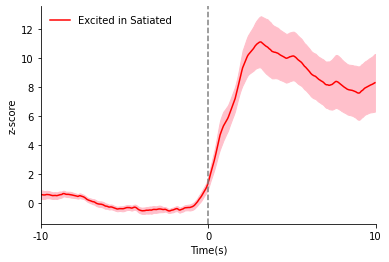

In [181]:
x=np.arange(Bins)
y=excited_satiated_mean
err = excited_satiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Satiated', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_satiated)

16

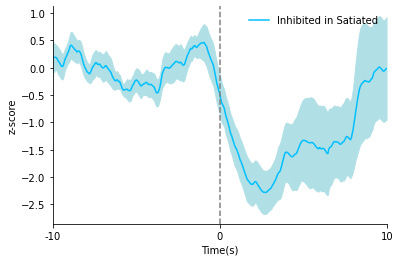

In [182]:
x=np.arange(Bins)
y=inhibited_satiated_mean
err = inhibited_satiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Satiated', color = 'deepskyblue')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_satiated)

[Text(0, 0.5, '0'), Text(0, 1.5, '16')]

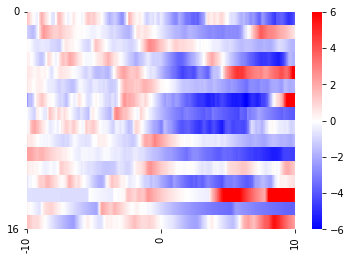

In [185]:
ax = sb.heatmap(inhibited_satiated, vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(inhibited_satiated)])
ax.set_yticklabels([0, len(inhibited_satiated)])

[Text(0, 0.5, '0'), Text(0, 1.5, '20')]

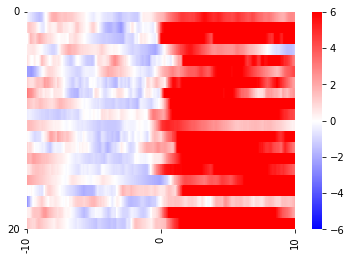

In [186]:
ax = sb.heatmap(excited_satiated, vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(excited_satiated)])
ax.set_yticklabels([0, len(excited_satiated)])

15

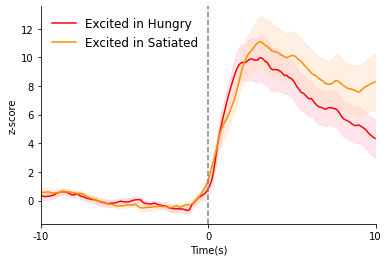

In [187]:
x=np.arange(Bins)
y=excited_hungry_mean
z=excited_satiated_mean
erry = excited_hungry_sem
errz = excited_satiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.plot(x, z, label = 'Excited in Satiated', color = 'darkorange')
ax.fill_between(x, y-erry, y+erry, color='pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='peachpuff', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)

15

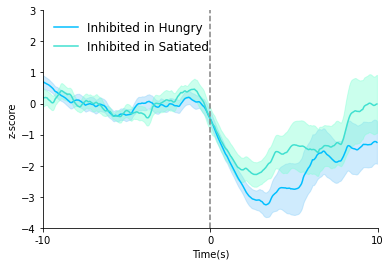

In [190]:
x=np.arange(Bins)
y=inhibited_hungry_mean
z=inhibited_satiated_mean
erry = inhibited_hungry_sem
errz = inhibited_satiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue')
ax.plot(x, z, label = 'Inhibited in Satiated', color = 'turquoise')
ax.fill_between(x, y-erry, y+erry, color='lightskyblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='aquamarine', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 3)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize= 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)

In [191]:
excited_hungry_insatiated_mean = tracesatiated.iloc[excited_hungry_where[0].values].mean(axis=0)
excited_hungry_insatiated_sem =  tracesatiated.iloc[excited_hungry_where[0].values].sem(axis=0)

15

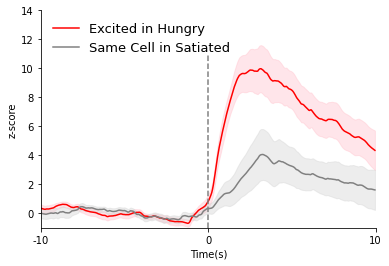

In [205]:
x=np.arange(Bins)
y=excited_hungry_mean
z=excited_hungry_insatiated_mean
erry = excited_hungry_sem
errz = excited_hungry_insatiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.plot(x, z, label = 'Same Cell in Satiated', color = 'grey')
ax.fill_between(x, y-erry, y+erry, color='pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='lightgrey', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-1, 14)
ax.axvline(int((Bins/2)), ymax=0.8, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)

In [195]:
inhibited_hungry_insatiated_mean = tracesatiated.iloc[inhibited_hungry_where[0].values].mean(axis=0)
inhibited_hungry_insatiated_sem =  tracesatiated.iloc[inhibited_hungry_where[0].values].sem(axis=0)

24

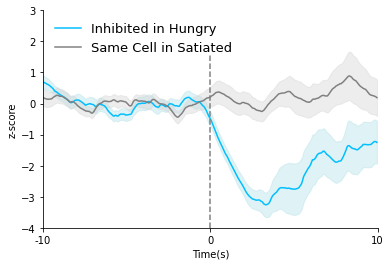

In [198]:
x=np.arange(Bins)
y=inhibited_hungry_mean
z=inhibited_hungry_insatiated_mean
erry = inhibited_hungry_sem
errz = inhibited_hungry_insatiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color='deepskyblue')
ax.plot(x, z, label = 'Same Cell in Satiated', color='grey')
ax.fill_between(x, y-erry, y+erry, color = 'powderblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color = 'lightgrey', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 3)
ax.axvline(int((Bins/2)), ymax=0.8,color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry)

In [199]:
excited_satiated_inhungry_mean = tracehungry.iloc[excited_satiated_where[0].values].mean(axis=0)
excited_satiated_inhungry_sem =  tracehungry.iloc[excited_satiated_where[0].values].sem(axis=0)

20

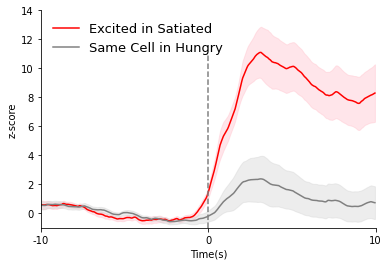

In [203]:
x=np.arange(Bins)
y=excited_satiated_mean
z=excited_satiated_inhungry_mean
erry = excited_satiated_sem
errz = excited_satiated_inhungry_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Satiated',color='red')
ax.plot(x, z, label = 'Same Cell in Hungry',color='grey')
ax.fill_between(x, y-erry, y+erry, color = 'pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color = 'lightgrey', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-1, 14)
ax.axvline(int((Bins/2)), ymax = 0.8,color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_satiated)

In [206]:
inhibited_satiated_inhungry_mean = tracehungry.iloc[inhibited_satiated_where[0].values].mean(axis=0)
inhibited_satiated_inhungry_sem =  tracehungry.iloc[inhibited_satiated_where[0].values].sem(axis=0)

16

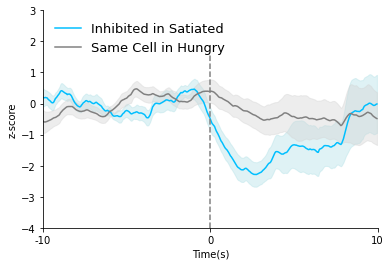

In [208]:
x=np.arange(Bins)
y=inhibited_satiated_mean
z=inhibited_satiated_inhungry_mean
erry = inhibited_satiated_sem
errz = inhibited_satiated_inhungry_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Satiated',color='deepskyblue')
ax.plot(x, z, label = 'Same Cell in Hungry',color='grey')
ax.fill_between(x, y-erry, y+erry, color = 'powderblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color = 'lightgrey', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 3)
ax.axvline(int((Bins/2)), ymax = 0.8, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_satiated)

In [7]:
tracehungry.reset_index(inplace=True)
tracesorted_hungry = tracehungry.sort_values(by=int((Bins/2)), axis =0)

In [8]:
tracesatiated.reset_index(inplace=True)
tracesorted_satiated = tracesatiated.sort_values(by=int((Bins/2)), axis =0)

548 neurons in Satiated


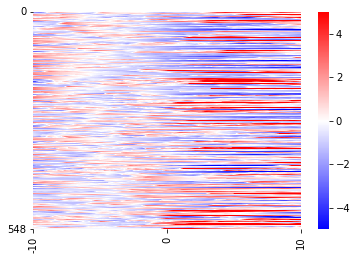

In [9]:
cross_hungry_satiated = tracesatiated.iloc[tracesorted_hungry.index, 1:]
cross_hungry_satiated
ax = sb.heatmap(cross_hungry_satiated, vmin = -5, vmax= 5, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(cross_hungry_satiated)])
ax.set_yticklabels([0, len(cross_hungry_satiated)])
print(str(len(tracesatiated)) + ' neurons in Satiated')

548 neurons in Satiated


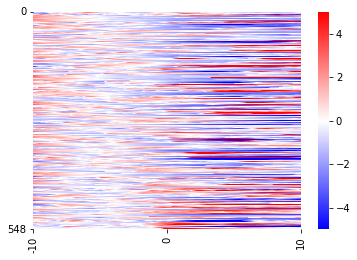

In [10]:
cross_satiatde_hungry = tracehungry.iloc[tracesorted_satiated.index, 1:]

ax = sb.heatmap(cross_satiatde_hungry, vmin = -5, vmax= 5, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(cross_satiatde_hungry)])
ax.set_yticklabels([0, len(cross_satiatde_hungry)])
print(str(len(tracesatiated)) + ' neurons in Satiated')

In [11]:
tracesatiated_mean = tracesatiated.iloc[:,1:].mean(axis=0)#.dropna(axis=0))
tracesatiated_sem = tracesatiated.iloc[:,1:].sem(axis=0)#.dropna(axis=0))
tracehungry_mean = tracehungry.iloc[:,1:].mean(axis=0)#.dropna(axis=0)
tracehungry_sem = tracehungry.iloc[:,1:].sem(axis=0)#.dropna(axis=0)

In [12]:
tracesatiated_mean

0      0.138233
1      0.136576
2      0.133884
3      0.131577
4      0.129575
         ...   
395    1.148674
396    1.140096
397    1.132779
398    1.125866
399    1.123269
Length: 400, dtype: float64

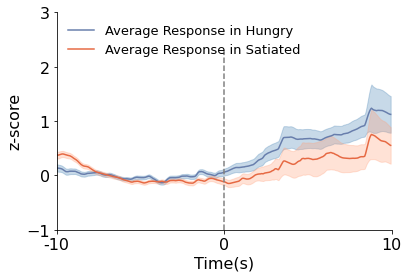

In [15]:
x=np.arange(Bins)
z=tracesatiated_mean
y=tracehungry_mean
errz = tracesatiated_sem
erry = tracehungry_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Average Response in Hungry', color = '#687eac')
ax.plot(x, z, label = 'Average Response in Satiated', color = '#e66943')
ax.fill_between(x, y-erry, y+erry, color='steelblue', alpha = 0.3)
ax.fill_between(x, z-errz, z+errz, color='lightsalmon', alpha = 0.3)
ax.set_xlabel('Time(s)', fontsize=16)
ax.set_ylabel('z-score', fontsize=16)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-1,3)
ax.tick_params(labelsize = 16)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--', ymax = 0.82)
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#len(excited_hungry)

In [218]:
hungrycells = np.append(excited_hungry_where[0].values, inhibited_hungry_where[0].values)
satiatedcells = np.append(excited_satiated_where[0].values, inhibited_satiated_where[0].values)

In [219]:
len(np.intersect1d(hungrycells, satiatedcells))

6

In [220]:
len((satiatedcells))

36

In [221]:
len((hungrycells))

39

In [164]:
excited_hungry = tracehungry[np.array(tracehungry.iloc[:,(int((Bins/2))):(int((Bins/2)+(1/(BinSize/FR))))]>Zsig).sum(axis=1) >0]
inhibited_hungry = tracehungry[np.array(tracehungry.iloc[:,(int((Bins/2))):(int((Bins/2)+(1/(BinSize/FR))))]<-ZsigI).sum(axis=1) >0]
excited_hungry_mean = excited_hungry.mean(axis=0)
excited_hungry_sem = excited_hungry.sem(axis=0)
inhibited_hungry_mean = inhibited_hungry.mean(axis=0)
inhibited_hungry_sem = inhibited_hungry.sem(axis=0)

45

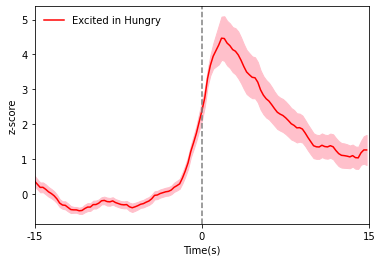

In [165]:
x=np.arange(Bins)
y=excited_hungry_mean
err = excited_hungry_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0)
len(excited_hungry)

51

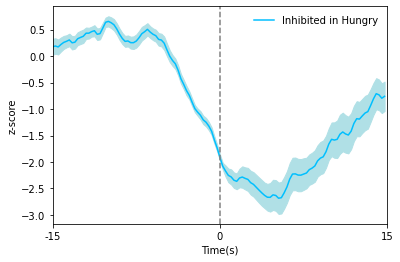

In [166]:
x=np.arange(Bins)
y=inhibited_hungry_mean
err = inhibited_hungry_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 0, framealpha = 0)
len(inhibited_hungry)

In [161]:
excited_satiated = tracesatiated[np.array(tracesatiated.iloc[:,(int((Bins/2))):(int((Bins/2)+(1/(BinSize/FR))))]>Zsig).sum(axis=1) >0]
inhibited_satiated = tracesatiated[np.array(tracesatiated.iloc[:,(int((Bins/2))):(int((Bins/2)+(1/(BinSize/FR))))]<-Zsig).sum(axis=1) >0]
excited_satiated_mean = excited_satiated.mean(axis=0)
excited_satiated_sem = excited_satiated.sem(axis=0)
inhibited_satiated_mean = inhibited_satiated.mean(axis=0)
inhibited_satiated_sem = inhibited_satiated.sem(axis=0)

42

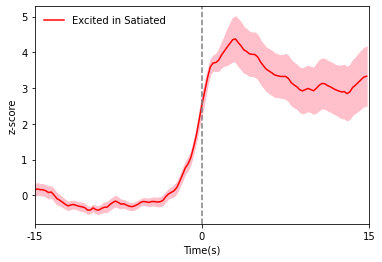

In [162]:
x=np.arange(Bins)
y=excited_satiated_mean
err = excited_satiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Excited in Satiated', color = 'red')
ax.fill_between(x, y-err, y+err, color='pink')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0)
len(excited_satiated)

3

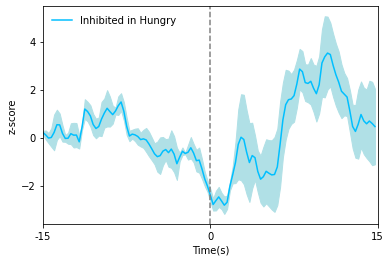

In [163]:
x=np.arange(Bins)
y=inhibited_satiated_mean
err = inhibited_satiated_sem
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue')
ax.fill_between(x, y-err, y+err, color='powderblue')
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0)
len(inhibited_satiated)

# This section analyze the cells that can be matched across the two sessions

In [222]:
tracehungry = pd.DataFrame()
animalid = pd.DataFrame()

for n in range(len(os.listdir(hungry_dir))):
    f = pd.read_pickle(os.path.join(hungry_dir, os.listdir(hungry_dir)[n]))
    animalid = pd.DataFrame(np.tile(n,len(f)-2), columns = ['animal'])
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)]
    trace = (trace-trace.mean(axis=0))/trace.mean(axis=0)
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracezscore.insert(0, 'animal', animalid.values)
    tracehungry = tracehungry.append(tracezscore)

In [223]:
tracesatiated = pd.DataFrame()
animalid = pd.DataFrame()

for n in range(len(os.listdir(satiated_dir))):
    f = pd.read_pickle(os.path.join(satiated_dir, os.listdir(satiated_dir)[n]))
    animalid = pd.DataFrame(np.tile(n,len(f)-2), columns = ['animal'])
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)]
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracezscore.insert(0, 'animal', animalid.values)
    tracesatiated = tracesatiated.append(tracezscore)

In [224]:
os.listdir(hungry_dir)

['1I5_Hungry.pkl',
 '1S5_Hungry.pkl',
 '2I5_Hungry.pkl',
 '2S5_Hungry.pkl',
 '2Z4_Hungry.pkl',
 '6S5_Hungry.pkl']

In [226]:
tracehungry.iloc[excited_hungry_where[0]]

animal         0         1         2         3         4         5  \
49        0  0.342515  0.299781  0.255503  0.206535  0.155874  0.113594   
84        1 -0.741378 -0.535403 -0.400591 -0.366358 -0.555031 -0.553119   
13        2 -0.957388 -0.958418 -0.960143 -0.977648 -0.982409 -0.978890   
17        2 -0.628075 -0.600636 -0.627155 -0.657748 -0.688719 -0.718805   
0         3  2.043608  2.010972  1.971160  1.909079  1.862545  1.817319   
75        4 -1.304279 -1.271194 -1.103265 -0.976414 -0.874889 -0.832298   
160       4  0.573140  0.523667  0.499219  0.501155  0.526600  0.572171   
184       4  1.024977  0.961711  0.906152  0.859470  0.818874  0.778519   
2         5  2.189337  2.079935  1.967708  1.845333  1.715901  1.714967   
3         5  0.778368  0.777113  0.774962  0.765590  0.762982  0.761313   
8         5  0.844829  0.859993  0.870377  0.860349  0.828084  0.773942   
13        5  1.310304  1.239922  1.161203  1.086033  1.026563  0.939003   
17        5  0.143179  0.074347  0.047202  0.037812  0.027586  0.010152   
32        5 -0.954341 -1.035540 -1.118582 -1.205754 -1.275461 -1.336199   
51        5  0.159154  0.199319  0.233948  0.254901  0.296063  0.381392   

            6         7         8  ...        390        391        392  \
49   0.092515  0.076327  0.062873  ...   6.601979   6.652251   6.699610   
84  -0.438145 -0.364029 -0.251566  ...   2.267666   2.232663   2.189496   
13  -0.953302 -0.819053 -0.673825  ...   4.355202   4.280049   4.271996   
17  -0.747021 -0.775132 -0.805161  ...   5.736971   5.643561   5.557817   
0    1.770899  1.718045  1.662577  ...   2.864533   2.821525   2.746020   
75  -0.706364 -0.646744 -0.574963  ...  -2.271842  -2.299401  -2.322758   
160  0.633646  0.915220  1.139993  ...   3.608299   3.466429   3.332975   
184  0.736311  0.691610  0.641082  ...  17.056780  17.009815  17.026823   
2    1.969959  2.015409  1.874583  ...   3.947111   3.931745   4.012761   
3    0.761650  0.760650  0.754622  ...  11.199083  11.211127  11.213251   
8    0.628224  0.471582  0.322116  ...   4.240704   4.107105   3.969461   
13   0.815280  0.701646  0.612659  ...   2.003108   1.949923   1.892965   
17  -0.001759 -0.019843 -0.047897  ...   2.406945   2.496735   2.587019   
32  -1.393631 -1.451343 -1.517283  ...   7.148495   6.963201   6.777823   
51   0.475931  0.503705  0.381813  ...   4.198831   4.131272   4.057576   

           393        394        395        396        397        398  \
49    6.734829   6.779842   6.887587   7.007971   7.137504   7.271102   
84    2.148873   2.161308   2.190853   2.213230   2.232547   2.232325   
13    4.266741   4.213940   4.132003   4.064872   3.986075   3.952572   
17    5.490813   5.431083   5.374616   5.315561   5.257375   5.195191   
0     2.648706   2.550750   2.452732   2.355807   2.259594   2.168504   
75   -2.333492  -2.341230  -2.334785  -2.313129  -2.296740  -2.267430   
160   3.206484   3.070385   2.929596   2.796489   2.663659   2.527504   
184  17.092289  17.189681  17.316005  17.458379  17.602936  17.725864   
2     4.157780   4.291433   4.468017   4.776303   5.106640   5.393176   
3    11.212100  11.223797  11.244710  11.281183  11.349568  11.423577   
8     3.832577   3.708843   3.607391   3.523243   3.462653   3.429827   
13    1.828093   1.771669   1.730519   1.701160   1.679205   1.663409   
17    2.671141   2.757813   2.848939   2.931022   3.003861   3.149764   
32    6.623813   6.499423   6.393158   6.302641   6.220212   6.128380   
51    3.975261   3.902369   3.850051   3.813382   3.794183   3.783150   

           399  
49    7.409998  
84    2.186162  
13    3.877277  
17    5.133438  
0     2.087889  
75   -2.223537  
160   2.384126  
184  17.814283  
2     5.303249  
3    11.495354  
8     3.441921  
13    1.636880  
17    3.323495  
32    5.998024  
51    3.763759  

[15 rows x 401 columns]

In [228]:
tracehungry.iloc[inhibited_hungry_where[0]].to_csv('Inhibited_Hungry.csv')

In [231]:
tracesatiated.iloc[inhibited_satiated_where[0]].to_csv('Inhibited_Satiated.csv')

In [232]:
tracesatiated.iloc[excited_satiated_where[0]].to_csv('Excited_Satiated.csv')

In [403]:
tracehungry.iloc[np.sort(np.append(excited_hungry_where[0].values, inhibited_hungry_where[0].values))]

animal         0         1         2         3         4         5  \
23        0 -1.616613 -1.585188 -1.601101 -1.620669 -1.635934 -1.641918   
25        0  2.702189  2.637037  2.531460  2.325824  2.128685  2.035768   
66        0 -2.423664 -2.230740 -2.021819 -1.699115 -1.388871 -1.109469   
75        0 -0.559045 -0.285690 -0.093084  0.001171 -0.084242 -0.204734   
15        1 -0.482663 -0.565050 -0.641095 -0.509216 -0.557633 -0.706390   
18        1 -1.071018 -1.111492 -1.112534 -1.137909 -1.197475 -1.175335   
84        1 -0.741378 -0.535403 -0.400591 -0.366358 -0.555031 -0.553119   
94        1  0.256518  0.210937  0.157520  0.085694 -0.009537 -0.152713   
0         2  0.170308  0.149526  0.129180  0.107170  0.085403  0.064149   
13        2 -0.957388 -0.958418 -0.960143 -0.977648 -0.982409 -0.978890   
27        2  0.726666  0.712248  0.693752  0.663238  0.636301  0.617701   
30        2  2.033254  1.971719  1.909859  1.839165  1.763595  1.688709   
68        2  0.278828  0.244847  0.222107  0.200915  0.181378  0.188182   
75        2 -0.541125 -0.558019 -0.576548 -0.606455 -0.638542 -0.672051   
24        3  2.139861  2.078425  2.066446  2.071124  2.092020  2.035252   
63        4 -2.196429 -2.180101 -2.157660 -2.130551 -2.104350 -2.078414   
69        4 -1.464667 -1.330317 -1.182371 -1.035383 -0.904720 -0.797607   
71        4 -0.721260 -0.731087 -0.739900 -0.747431 -0.753892 -0.759361   
75        4 -1.304279 -1.271194 -1.103265 -0.976414 -0.874889 -0.832298   
76        4  3.667597  3.390174  3.135783  2.913327  2.712627  2.541132   
104       4 -2.873041 -2.818576 -2.573490 -2.345442 -2.139419 -1.939471   
134       4  0.543626  0.482284  0.467226  0.383668  0.393721  0.432737   
140       4  0.837570  0.754477  0.677880  0.602483  0.529641  0.453780   
160       4  0.573140  0.523667  0.499219  0.501155  0.526600  0.572171   
165       4 -0.187056 -0.187120 -0.187183 -0.187247 -0.187314 -0.187381   
190       4 -0.630129 -0.640953 -0.648078 -0.650751 -0.654584 -0.657974   
2         5  2.189337  2.079935  1.967708  1.845333  1.715901  1.714967   
8         5  0.844829  0.859993  0.870377  0.860349  0.828084  0.773942   
13        5  1.310304  1.239922  1.161203  1.086033  1.026563  0.939003   
14        5  1.039540  1.096313  1.147176  1.185628  1.210688  1.218359   
15        5 -1.412587 -1.360536 -1.307535 -1.255133 -1.205585 -1.158492   
17        5  0.143179  0.074347  0.047202  0.037812  0.027586  0.010152   
65        5  0.968771  0.896769  0.796018  0.875957  0.954526  1.066086   

            6         7         8  ...       390       391       392  \
23  -1.638401 -1.634918 -1.633767  ...  0.963389  0.885489  0.798120   
25   1.947518  1.832664  1.669055  ...  6.474717  6.571043  6.629540   
66  -0.866930 -0.672228 -0.607893  ... -3.682581 -3.738219 -3.775060   
75  -0.319495 -0.430668 -0.340207  ... -6.743553 -6.693060 -6.643981   
15  -0.706883 -0.712692 -0.793210  ... -5.414101 -5.425872 -5.447971   
18  -1.117509 -1.056949 -0.996861  ...  0.443856  0.675832  0.637716   
84  -0.438145 -0.364029 -0.251566  ...  2.267666  2.232663  2.189496   
94  -0.347506 -0.491600 -0.559105  ...  3.280336  3.509632  3.755480   
0    0.042935  0.022342  0.002413  ...  2.634699  2.581922  2.531130   
13  -0.953302 -0.819053 -0.673825  ...  4.355202  4.280049  4.271996   
27   0.614280  0.663007  0.744268  ...  1.467534  1.412842  1.359683   
30   1.616084  1.546385  1.475299  ...  1.772353  1.703743  1.804203   
68   0.219794  0.246845  0.278811  ...  0.516301  0.660903  0.777632   
75  -0.705293 -0.737689 -0.771031  ... -5.324065 -5.322337 -5.300097   
24   1.957784  1.912866  1.939379  ... -3.762372 -3.841906 -3.915417   
63  -2.054262 -2.027303 -2.002172  ... -2.937526 -2.901146 -2.860533   
69  -0.719351 -0.659980 -0.626855  ...  4.100100  4.059914  4.018883   
71  -0.763853 -0.767418 -0.770165  ...  7.505612  7.307791  7.100951   
75  -0.706364 -0.646744 -0.574963  ... -2.271842 -2.299401 -2.322758   
76   2.393473 

In [397]:
tracesatiated.iloc[np.sort(np.append(excited_satiated_where[0].values, inhibited_satiated_where[0].values))]

animal         0         1         2         3         4         5  \
27        0  0.470692  0.654644  0.860812  0.952894  1.032085  1.065121   
30        0 -0.039436 -0.093490  0.055404  0.543660  1.011494  1.445234   
57        0  1.723499  1.624015  1.525872  1.427437  1.326729  1.229228   
60        0 -1.063578 -1.119726 -1.174227 -1.226858 -1.277381 -1.323919   
66        0  0.655888  0.617918  0.571194  0.510184  0.438752  0.362028   
78        0  1.401012  1.332305  1.287461  1.278477  1.260527  1.202675   
43        1  2.438022  2.263680  2.118896  2.022368  1.960031  1.917888   
79        1 -2.280969 -2.131675 -2.039084 -2.072221 -2.101977 -2.127647   
96        1  1.358320  1.380664  1.362510  1.350913  1.336878  1.340147   
2         2  0.097242  0.024892 -0.047651 -0.122677 -0.148805 -0.144384   
8         2 -2.745537 -2.726903 -2.360651 -2.043288 -1.911874 -1.786181   
12        2 -0.207756 -0.283524 -0.358480 -0.430561 -0.499886 -0.567330   
31        2  3.174318  3.104992  2.969346  2.850540  2.749734  2.670915   
61        2  0.350054  0.281553  0.211467  0.142887  0.076957  0.040118   
64        2  1.008499  1.013832  1.017803  1.019259  1.018810  1.021841   
75        2  1.579664  1.579869  1.635202  1.682170  1.695176  1.705331   
122       2  0.176495  0.091505 -0.002411 -0.101560 -0.202109 -0.300488   
128       2  1.748508  1.760607  1.795060  1.770619  1.742765  1.716353   
137       2  0.466727  0.482726  0.451436  0.393969  0.337329  0.282468   
164       2  0.704049  0.753369  0.794725  0.815588  0.826500  0.891833   
16        3 -1.010255 -0.899204 -0.739020 -0.609677 -0.514064 -0.475066   
60        3 -2.761727 -2.796117 -2.829537 -2.822050 -2.800882 -2.731606   
65        3 -0.229285 -0.187068 -0.140886 -0.082532 -0.021611  0.038304   
68        3 -0.321379 -0.370139 -0.419782 -0.470336 -0.521309 -0.569227   
73        3  1.184086  1.094786  1.052310  1.085582  1.142013  1.134864   
69        4 -1.458403 -1.329311 -1.184311 -1.037782 -0.907276 -0.800075   
71        4 -0.721260 -0.731087 -0.739900 -0.747431 -0.753892 -0.759361   
75        4 -1.273003 -1.248314 -1.086900 -0.962767 -0.863219 -0.821594   
76        4  3.669407  3.390778  3.135658  2.912995  2.712164  2.540609   
134       4  0.560470  0.493744  0.475540  0.390320  0.399808  0.438797   
140       4  0.837570  0.754477  0.677880  0.602483  0.529641  0.453780   
160       4  0.578165  0.526864  0.501277  0.502811  0.527944  0.573287   
165       4 -0.187056 -0.187120 -0.187183 -0.187247 -0.187314 -0.187381   
19        5 -1.738586 -1.661562 -1.596751 -1.494202 -1.412390 -1.350978   

            6         7         8  ...        390        391        392  \
27   1.058539  1.035803  1.016503  ...  13.145886  13.159964  13.195382   
30   1.832275  1.739386  1.649861  ...  13.204810  14.172574  15.279521   
57   1.136063  1.114672  1.221136  ...   3.490258   3.595199   3.787037   
60  -1.368774 -1.411749 -1.454098  ...   2.150882   2.040518   1.940125   
66   0.255344  0.169284  0.129296  ...  -1.639558  -1.745824  -1.845216   
78   1.142098  1.086192  1.037231  ...  -3.012586  -2.797435  -2.674771   
43   1.875658  1.818285  1.711014  ...  -0.549682  -0.623729  -0.697879   
79  -2.146446 -2.159962 -2.062753  ...   3.502776   3.532399   3.556621   
96   1.362275  1.428459  1.496309  ...   2.290329   2.474427   2.708310   
2   -0.168359 -0.230806 -0.308935  ...  -1.478964  -1.555919  -1.631099   
8   -1.851304 -1.942478 -1.771740  ...   8.365688   8.618587   8.721386   
12  -0.636262 -0.703727 -0.777311  ...  -3.208406  -3.240160  -3.270574   
31   2.607324  2.549539  2.495814  ...   2.501837   2.640472   2.780405   
61   0.034304  0.032905  0.025754  ...   0.729290   0.644331   0.564313   
64   1.022387  1.012884  0.998374  ...  15.876237  15.807105  15.745294   
75   1.685766  1.658041  1.623127  ...   0.067657   0.015268  -0.034329   
122 -0.399836 -0.508807 -0.628282  ...  -0.788915  -0.725906  -0.720939   
128  1.742612  1.818959  1.90

# After the frist run, read from saved csv file

548 neurons in Hungry


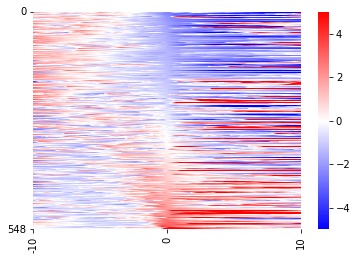

In [5]:
tracehungry = pd.DataFrame()


for n in range(len(os.listdir(hungry_dir))):
    f = pd.read_pickle(os.path.join(hungry_dir, os.listdir(hungry_dir)[n]))
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)] 
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracehungry = tracehungry.append(tracezscore)

#tracehungry = tracehungry.dropna()
tracesorted_hungry = tracehungry.sort_values(by=int((Bins/2)), axis =0)
ax = sb.heatmap(tracesorted_hungry, vmin = -5, vmax= 5, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(tracesorted_hungry)])
ax.set_yticklabels([0, len(tracesorted_hungry)])
print(str(len(tracehungry)) + ' neurons in Hungry')

548 neurons in Satiated


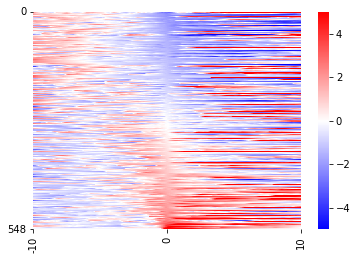

In [6]:
tracesatiated = pd.DataFrame()

for n in range(len(os.listdir(satiated_dir))):
    f = pd.read_pickle(os.path.join(satiated_dir, os.listdir(satiated_dir)[n]))
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)] 
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracesatiated = tracesatiated.append(tracezscore)

tracesorted_satiated = tracesatiated.sort_values(by=int((Bins/2)), axis =0)
ax = sb.heatmap(tracesorted_satiated, vmin = -5, vmax= 5, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(tracesorted_satiated)])
ax.set_yticklabels([0, len(tracesorted_satiated)])
print(str(len(tracesatiated)) + ' neurons in Satiated')

In [7]:
tracehungry = pd.DataFrame()
animalid = pd.DataFrame()

for n in range(len(os.listdir(hungry_dir))):
    f = pd.read_pickle(os.path.join(hungry_dir, os.listdir(hungry_dir)[n]))
    animalid = pd.DataFrame(np.tile(n,len(f)-2), columns = ['animal'])
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)]
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracezscore.insert(0, 'animal', animalid.values)
    tracehungry = tracehungry.append(tracezscore)

In [8]:
tracesatiated = pd.DataFrame()
animalid = pd.DataFrame()

for n in range(len(os.listdir(satiated_dir))):
    f = pd.read_pickle(os.path.join(satiated_dir, os.listdir(satiated_dir)[n]))
    animalid = pd.DataFrame(np.tile(n,len(f)-2), columns = ['animal'])
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)]
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracezscore.insert(0, 'animal', animalid.values)
    tracesatiated = tracesatiated.append(tracezscore)

In [9]:
excited_hungry = pd.read_csv(".\Excited_Hungry.csv")
inhibited_hungry = pd.read_csv(".\Inhibited_Hungry.csv")
excited_satiated = pd.read_csv(".\Excited_Satiated.csv")
inhibited_satiated = pd.read_csv(".\Inhibited_Satiated.csv")


excited_hungry_where = np.zeros(len(excited_hungry))
inhibited_hungry_where = np.zeros(len(inhibited_hungry))
excited_satiated_where = np.zeros(len(excited_satiated))
inhibited_satiated_where = np.zeros(len(inhibited_satiated))

for i in excited_hungry.index:
    where = np.where((tracehungry.index.values.astype('int64')==excited_hungry.iloc[i,0])&(tracehungry.animal==excited_hungry.iloc[i,1]))[0]
    excited_hungry_where[i] = where
    
for i in inhibited_hungry.index:
    where = np.where((tracehungry.index.values.astype('int64')==inhibited_hungry.iloc[i,0])&(tracehungry.animal==inhibited_hungry.iloc[i,1]))[0]
    inhibited_hungry_where[i] = where
    
for i in excited_satiated.index:
    where = np.where((tracesatiated.index.values.astype('int64')==excited_satiated.iloc[i,0])&(tracesatiated.animal==excited_satiated.iloc[i,1]))[0]
    excited_satiated_where[i] = where
    
for i in inhibited_satiated.index:
    where = np.where((tracesatiated.index.values.astype('int64')==inhibited_satiated.iloc[i,0])&(tracesatiated.animal==inhibited_satiated.iloc[i,1]))[0]
    inhibited_satiated_where[i] = where


In [10]:
excited_hungry

Unnamed: 0  animal         0         1         2         3         4  \
0           49       0  0.342515  0.299781  0.255503  0.206535  0.155874   
1           90       1  0.643532  0.582861  0.536335  0.500849  0.467399   
2           13       2 -0.957388 -0.958418 -0.960143 -0.977648 -0.982409   
3           17       2 -0.628075 -0.600636 -0.627155 -0.657748 -0.688719   
4           27       2  0.726666  0.712248  0.693752  0.663238  0.636301   
5            0       3  2.043608  2.010972  1.971160  1.909079  1.862545   
6           89       4  2.841547  2.769730  2.696487  2.595647  2.491051   
7          104       4 -2.873041 -2.818576 -2.573490 -2.345442 -2.139419   
8          160       4  0.573140  0.523667  0.499219  0.501155  0.526600   
9            2       5  2.189337  2.079935  1.967708  1.845333  1.715901   
10           3       5  0.778368  0.777113  0.774962  0.765590  0.762982   
11           8       5  0.844829  0.859993  0.870377  0.860349  0.828084   
12          13       5  1.310304  1.239922  1.161203  1.086033  1.026563   
13          17       5  0.143179  0.074347  0.047202  0.037812  0.027586   
14          32       5 -0.954341 -1.035540 -1.118582 -1.205754 -1.275461   
15          51       5  0.159154  0.199319  0.233948  0.254901  0.296063   

           5         6         7  ...        390        391        392  \
0   0.113594  0.092515  0.076327  ...   6.601979   6.652251   6.699610   
1   0.422487  0.345118  0.266696  ...   7.393636   7.314766   7.185773   
2  -0.978890 -0.953302 -0.819053  ...   4.355202   4.280049   4.271996   
3  -0.718805 -0.747021 -0.775132  ...   5.736971   5.643561   5.557817   
4   0.617701  0.614280  0.663007  ...   1.467534   1.412842   1.359683   
5   1.817319  1.770899  1.718045  ...   2.864533   2.821525   2.746020   
6   2.472725  2.444532  2.394520  ...  -1.381891  -1.400931  -1.433763   
7  -1.939471 -1.555919 -1.280004  ...   0.265338   0.241452   0.250678   
8   0.572171  0.633646  0.915220  ...   3.608299   3.466429   3.332975   
9   1.714967  1.969959  2.015409  ...   3.947111   3.931745   4.012761   
10  0.761313  0.761650  0.760650  ...  11.199083  11.211127  11.213251   
11  0.773942  0.628224  0.471582  ...   4.240704   4.107105   3.969461   
12  0.939003  0.815280  0.701646  ...   2.003108   1.949923   1.892965   
13  0.010152 -0.001759 -0.019843  ...   2.406945   2.496735   2.587019   
14 -1.336199 -1.393631 -1.451343  ...   7.148495   6.963201   6.777823   
15  0.381392  0.475931  0.503705  ...   4.198831   4.131272   4.057576   

          393        394        395        396        397        398  \
0    6.734829   6.779842   6.887587   7.007971   7.137504   7.271102   
1    7.027968   6.951786   6.899927   6.843732   6.796413   6.742277   
2    4.266741   4.213940   4.132003   4.064872   3.986075   3.952572   
3    5.490813   5.431083   5.374616   5.315561   5.257375   5.195191   
4    1.306788   1.254345   1.199136   1.145440   1.093374   1.034254   
5    2.648706   2.550750   2.452732   2.355807   2.259594   2.168504   
6   -1.484994  -1.536604  -1.586467  -1.633355  -1.680653  -1.731106   
7    0.274048   0.298686   0.336266   0.388255   0.440551   0.481425   
8    3.206484   3.070385   2.929596   2.796489   2.663659   2.527504   
9    4.157780   4.291433   4.468017   4.776303   5.106640   5.393176   
10  11.212100  11.223797  11.244710  11.281183  11.349568  11.423577   
11   3.832577   3.708843   3.607391   3.523243   3.462653   3.429827   
12   1.828093   1.771669   1.730519   1.701160   1.679205   1.663409   
13   2.671141   2.757813   2.848939   2.931022   3.003861   3.149764   
14   6.623813   6.499423   6.393158   6.302641   6.220212   6.128380   
15   3.975261   3.902369   3.850051   3.813382   3.794183   3.783150   

          399  
0    7.409998  
1    6.683928  
2    3.877277  
3    5.133438  
4    0.973228  
5    2.087889  
6   -1.781002  
7    0.607504  
8    2.384126  
9    5.303249  
10  11.495354  
11   3.441921  
12   1.636880  
13 

[Text(0, 0.5, '0'), Text(0, 2.5, '24')]

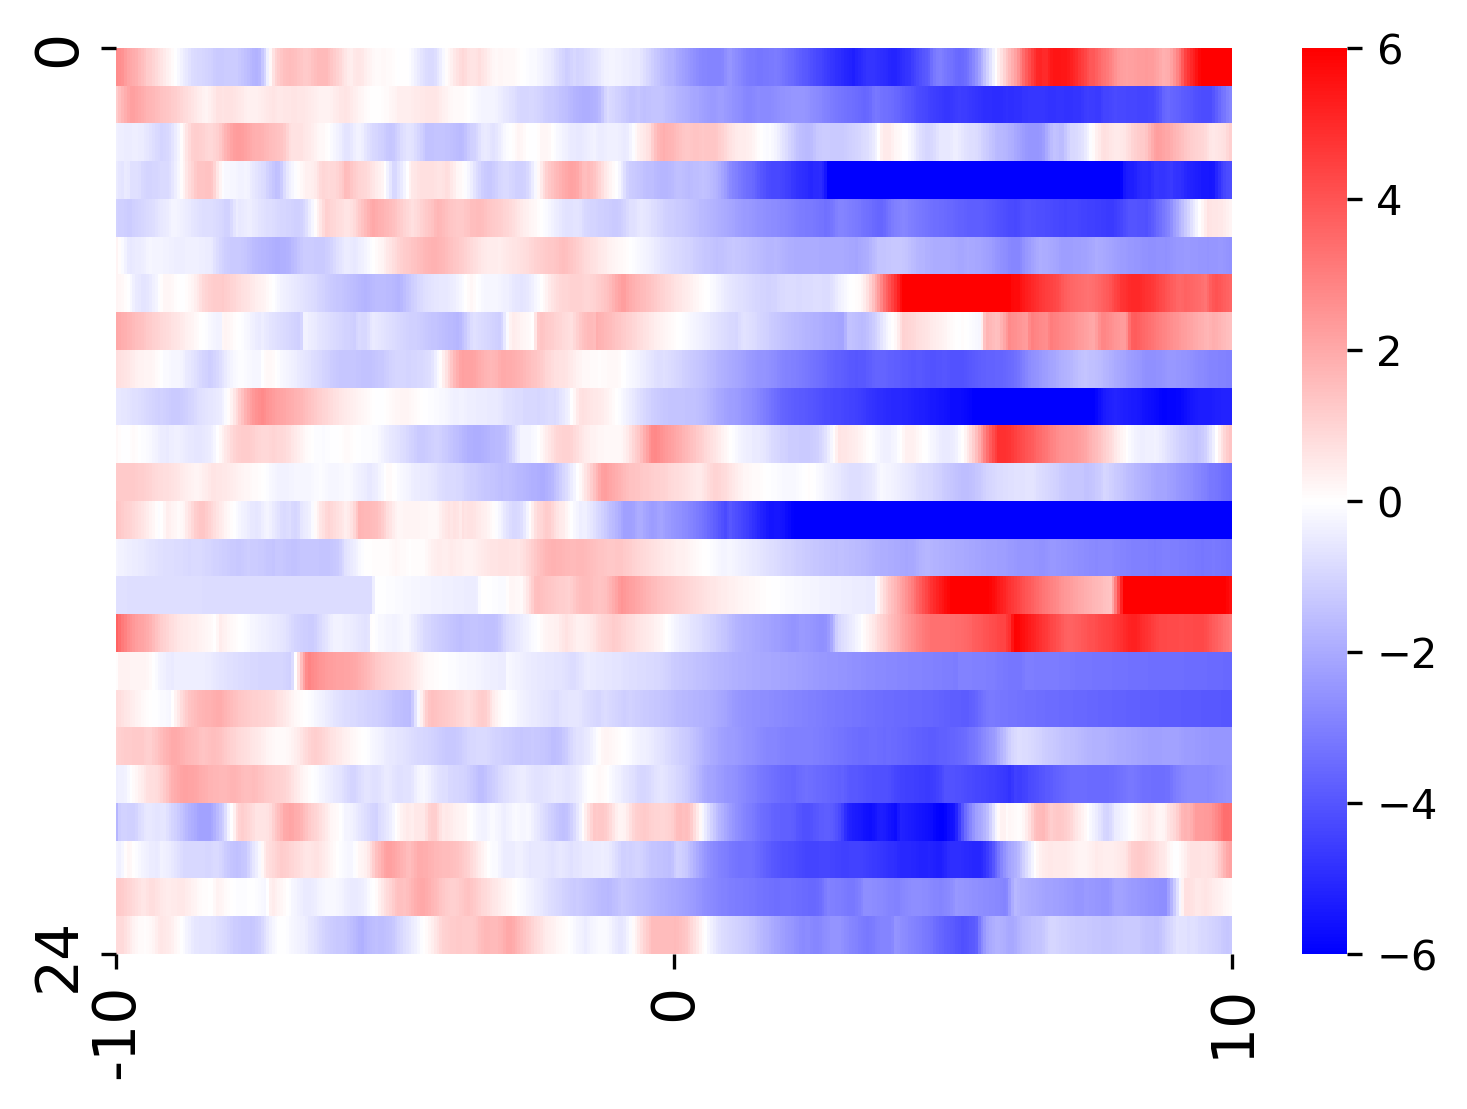

In [11]:
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 14)
ax = sb.heatmap(inhibited_hungry.iloc[:,2:], vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(inhibited_hungry.iloc[:,2:])])
ax.set_yticklabels([0, len(inhibited_hungry.iloc[:,2:])])



[Text(0, 0.5, '0'), Text(0, 2.5, '16')]

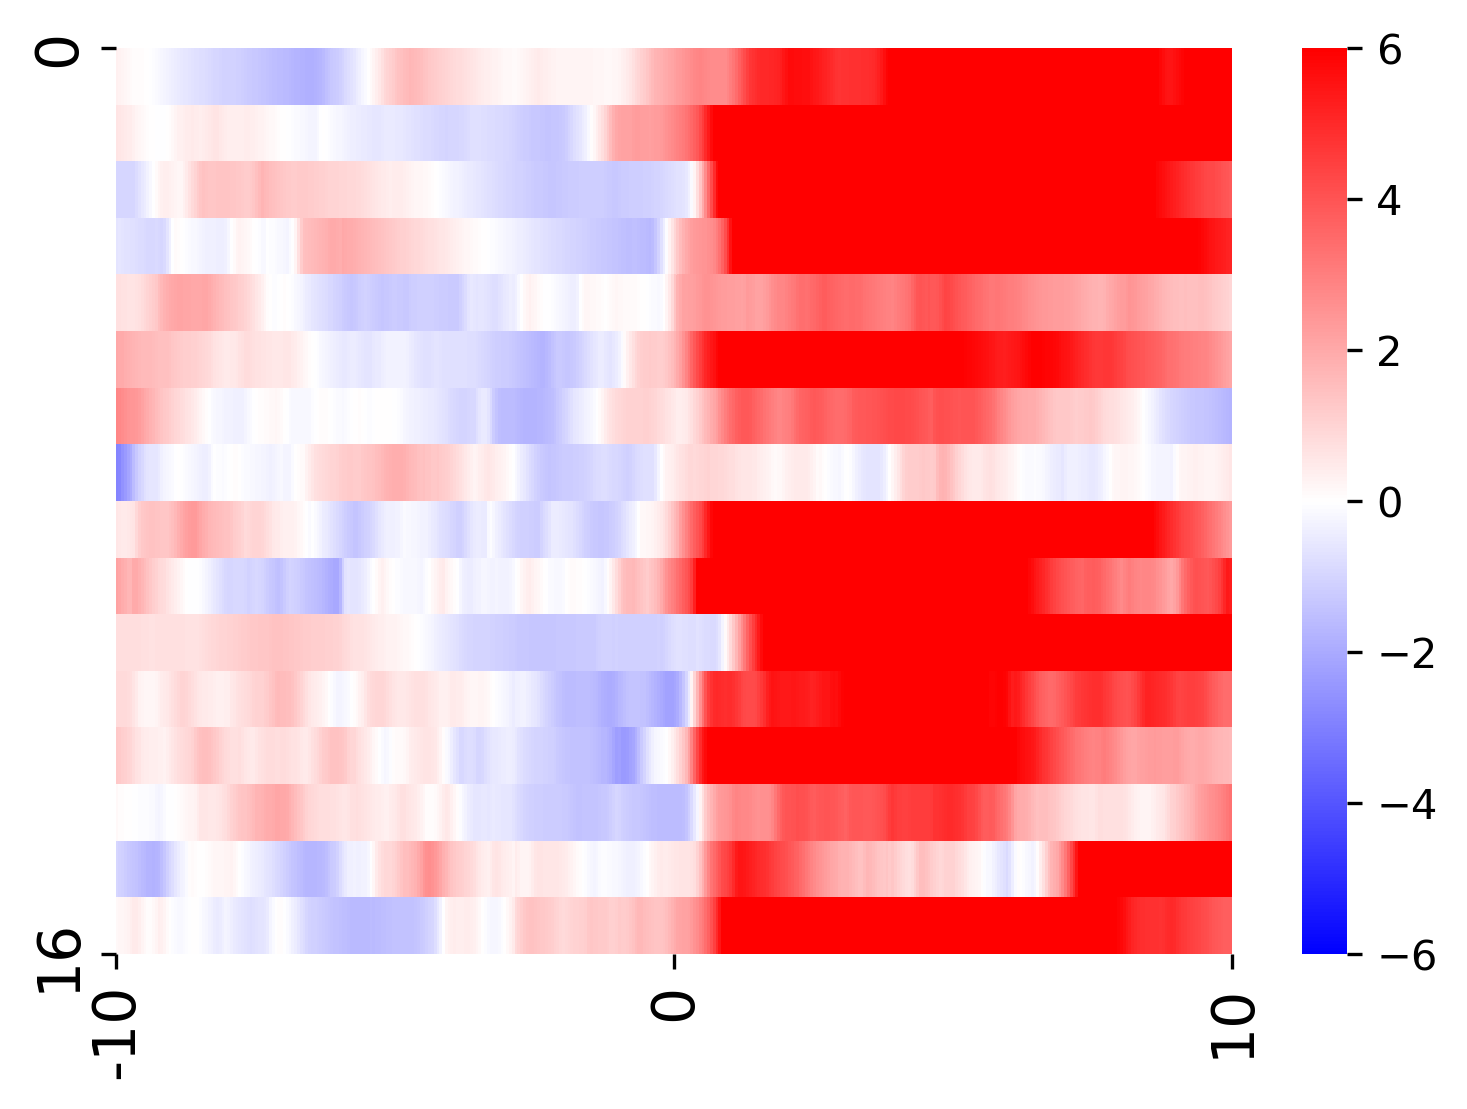

In [12]:
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 14)
ax = sb.heatmap(excited_hungry.iloc[:,2:], vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(excited_hungry.iloc[:,2:])])
ax.set_yticklabels([0, len(excited_hungry.iloc[:,2:])])

[Text(0, 0.5, '0'), Text(0, 2.5, '16')]

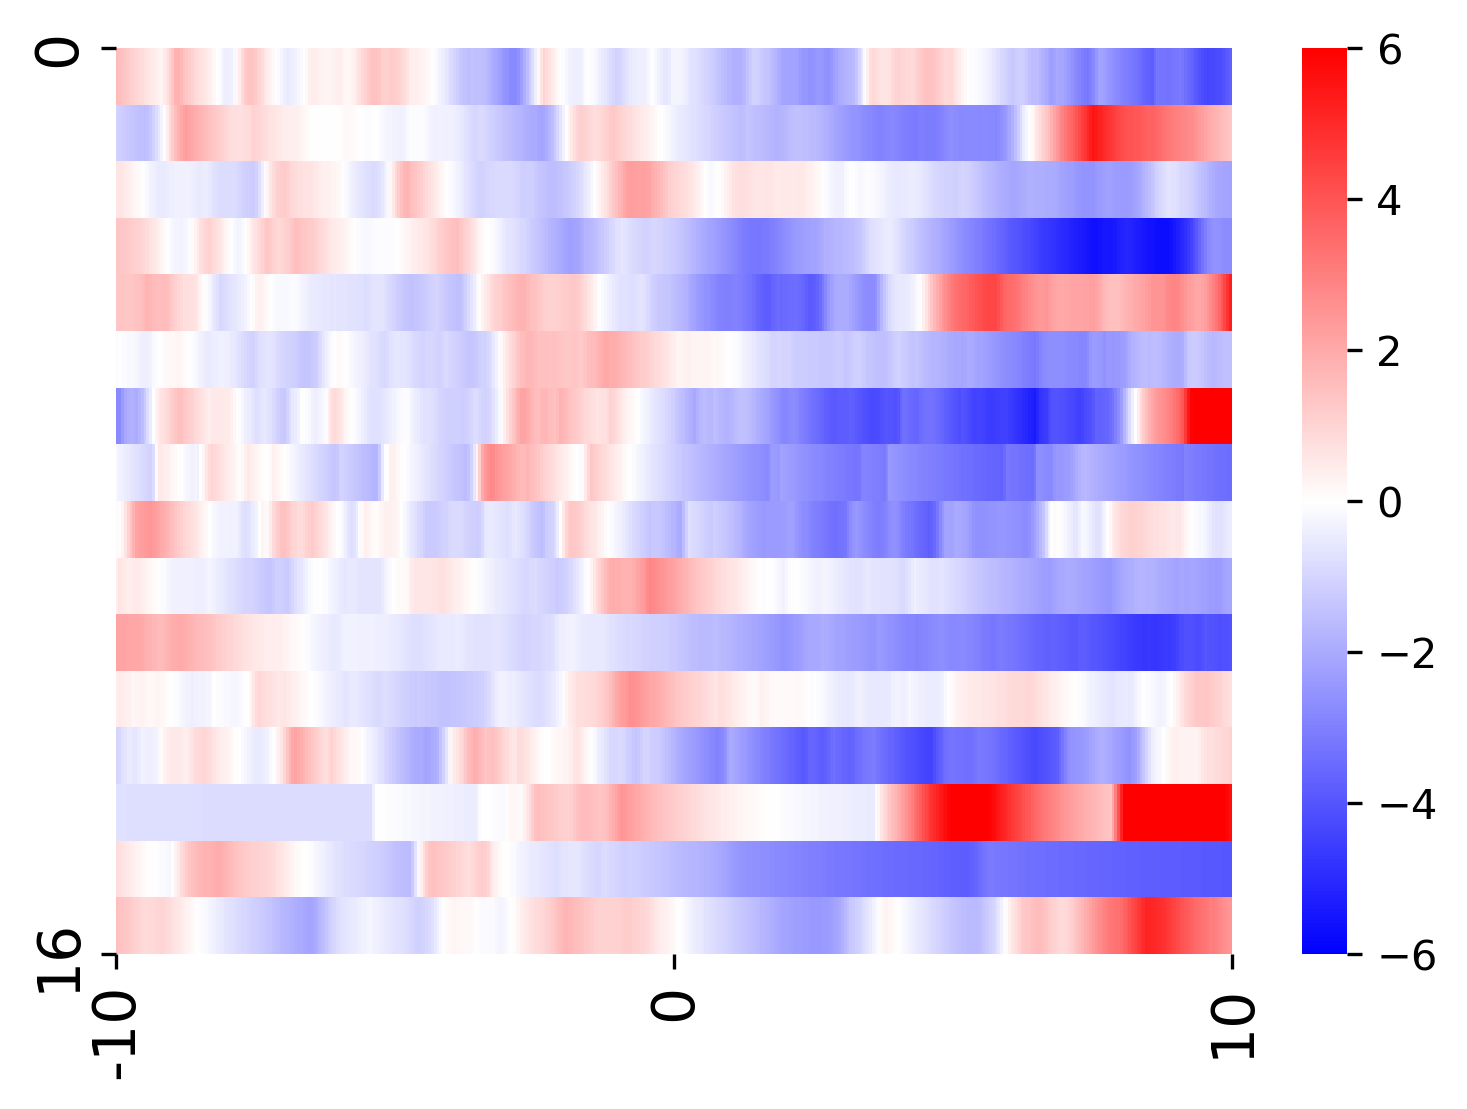

In [13]:
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 14)
ax = sb.heatmap(inhibited_satiated.iloc[:,2:], vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(inhibited_satiated.iloc[:,2:])])
ax.set_yticklabels([0, len(inhibited_satiated.iloc[:,2:])])

[Text(0, 0.5, '0'), Text(0, 2.5, '20')]

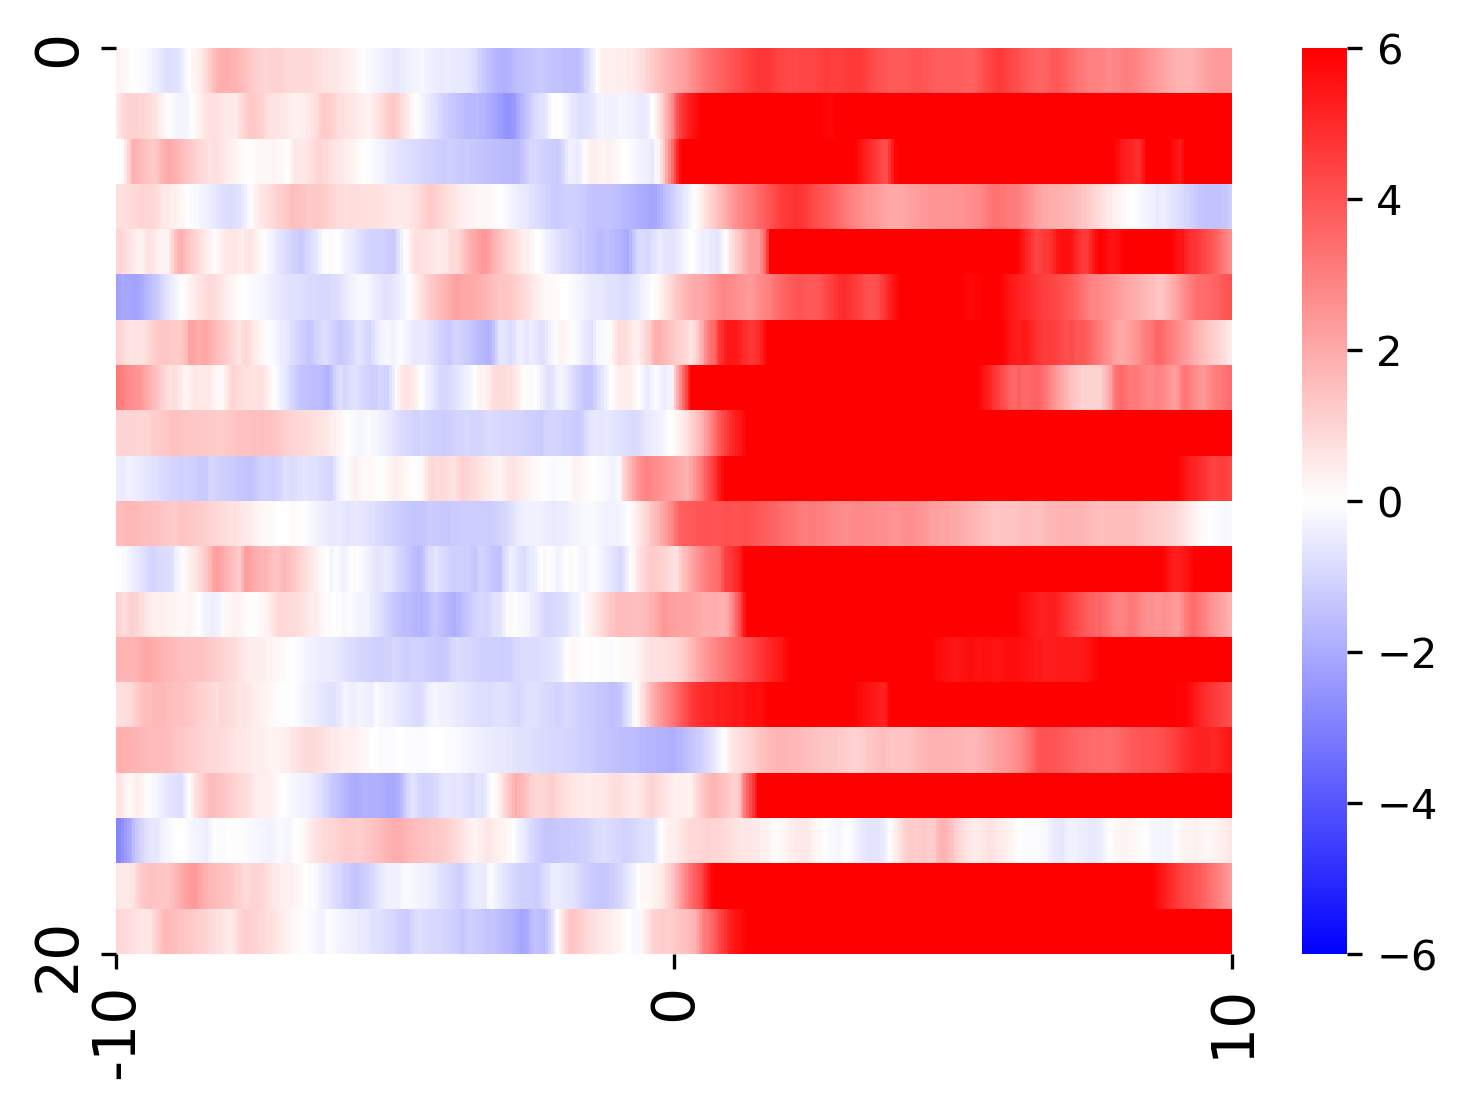

In [14]:
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 14)
ax = sb.heatmap(excited_satiated.iloc[:,2:], vmin = -6, vmax= 6, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(excited_satiated.iloc[:,2:])])
ax.set_yticklabels([0, len(excited_satiated.iloc[:,2:])])

In [15]:
excited_hungry_mean = excited_hungry.iloc[:,2:].mean(axis=0)
excited_hungry_sem = excited_hungry.iloc[:,2:].sem(axis=0)
inhibited_hungry_mean = inhibited_hungry.iloc[:,2:].mean(axis=0)
inhibited_hungry_sem = inhibited_hungry.iloc[:,2:].sem(axis=0)
excited_satiated_mean = excited_satiated.iloc[:,2:].mean(axis=0)
excited_satiated_sem = excited_satiated.iloc[:,2:].sem(axis=0)
inhibited_satiated_mean = inhibited_satiated.iloc[:,2:].mean(axis=0)
inhibited_satiated_sem = inhibited_satiated.iloc[:,2:].sem(axis=0)


16

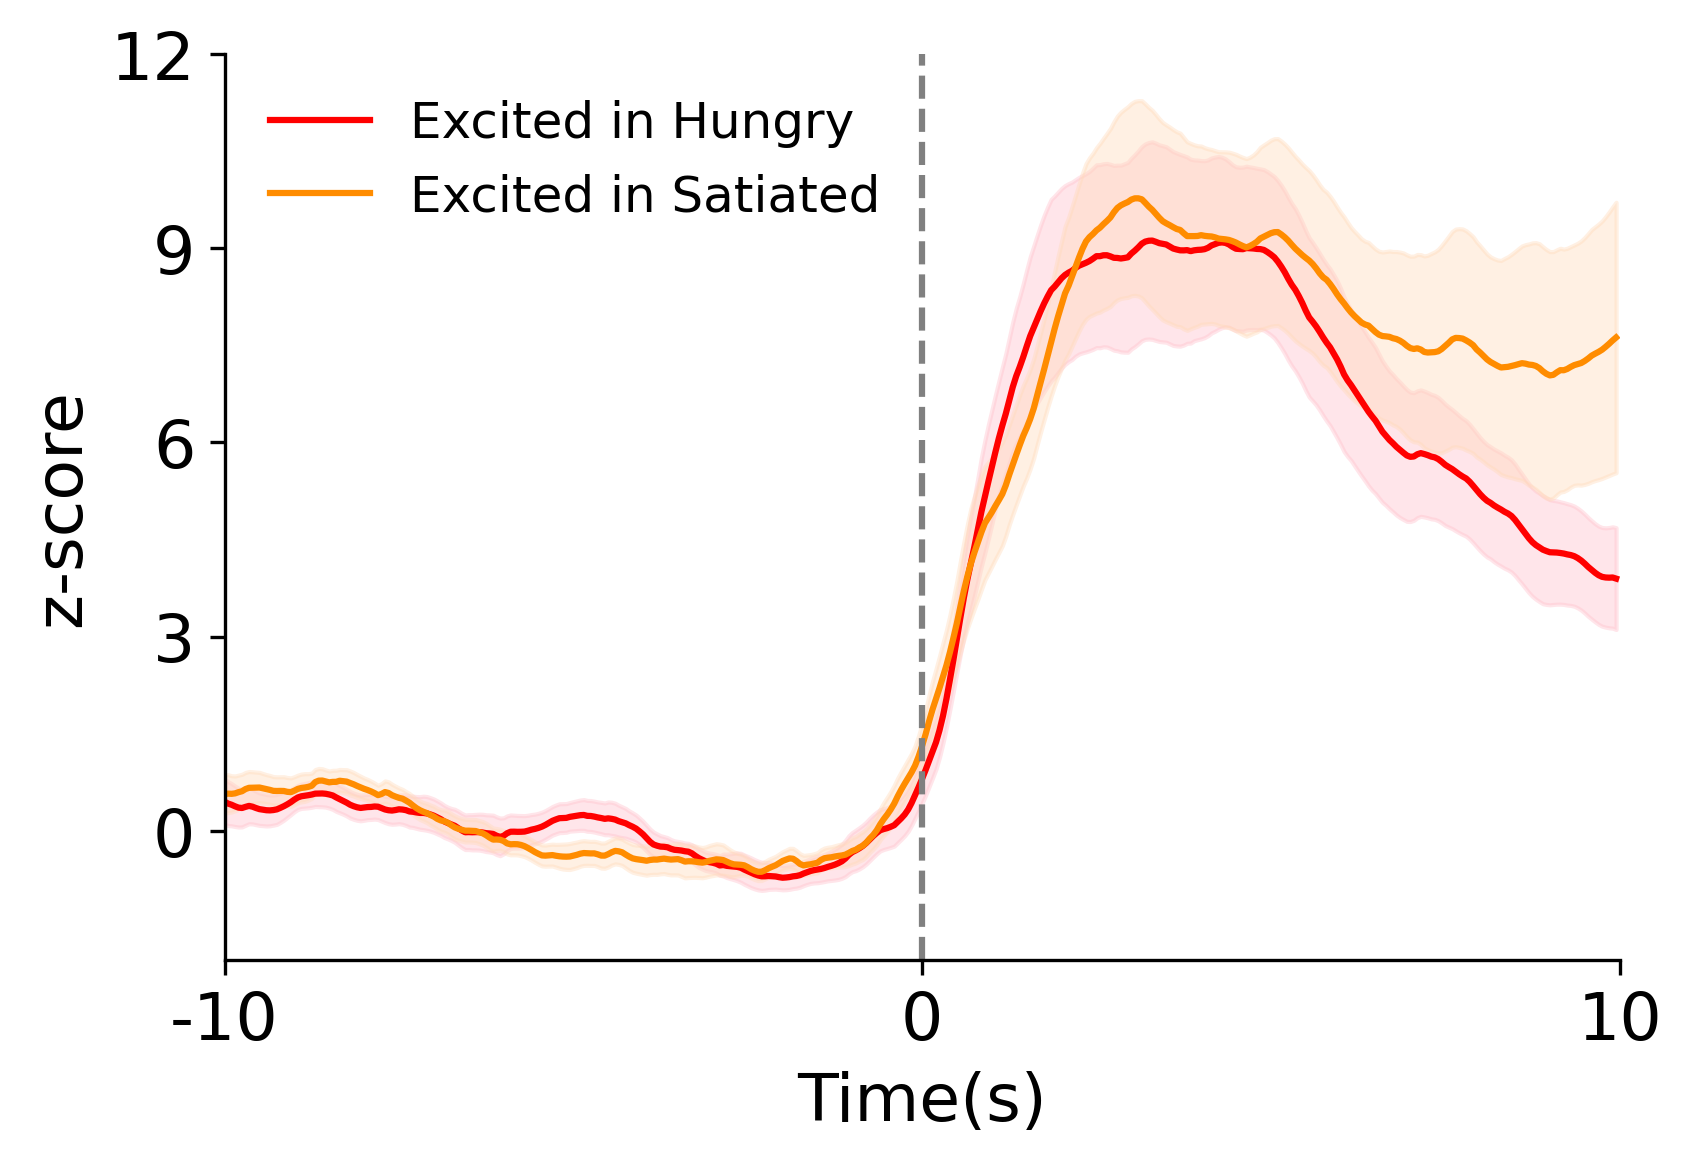

In [16]:

x=np.arange(Bins)
y=excited_hungry_mean
z=excited_satiated_mean
erry = excited_hungry_sem
errz = excited_satiated_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.plot(x, z, label = 'Excited in Satiated', color = 'darkorange')
ax.fill_between(x, y-erry, y+erry, color='pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='peachpuff', alpha = 0.4)
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-2, 12)
#ax.set_ylim(0, Bins)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)

24

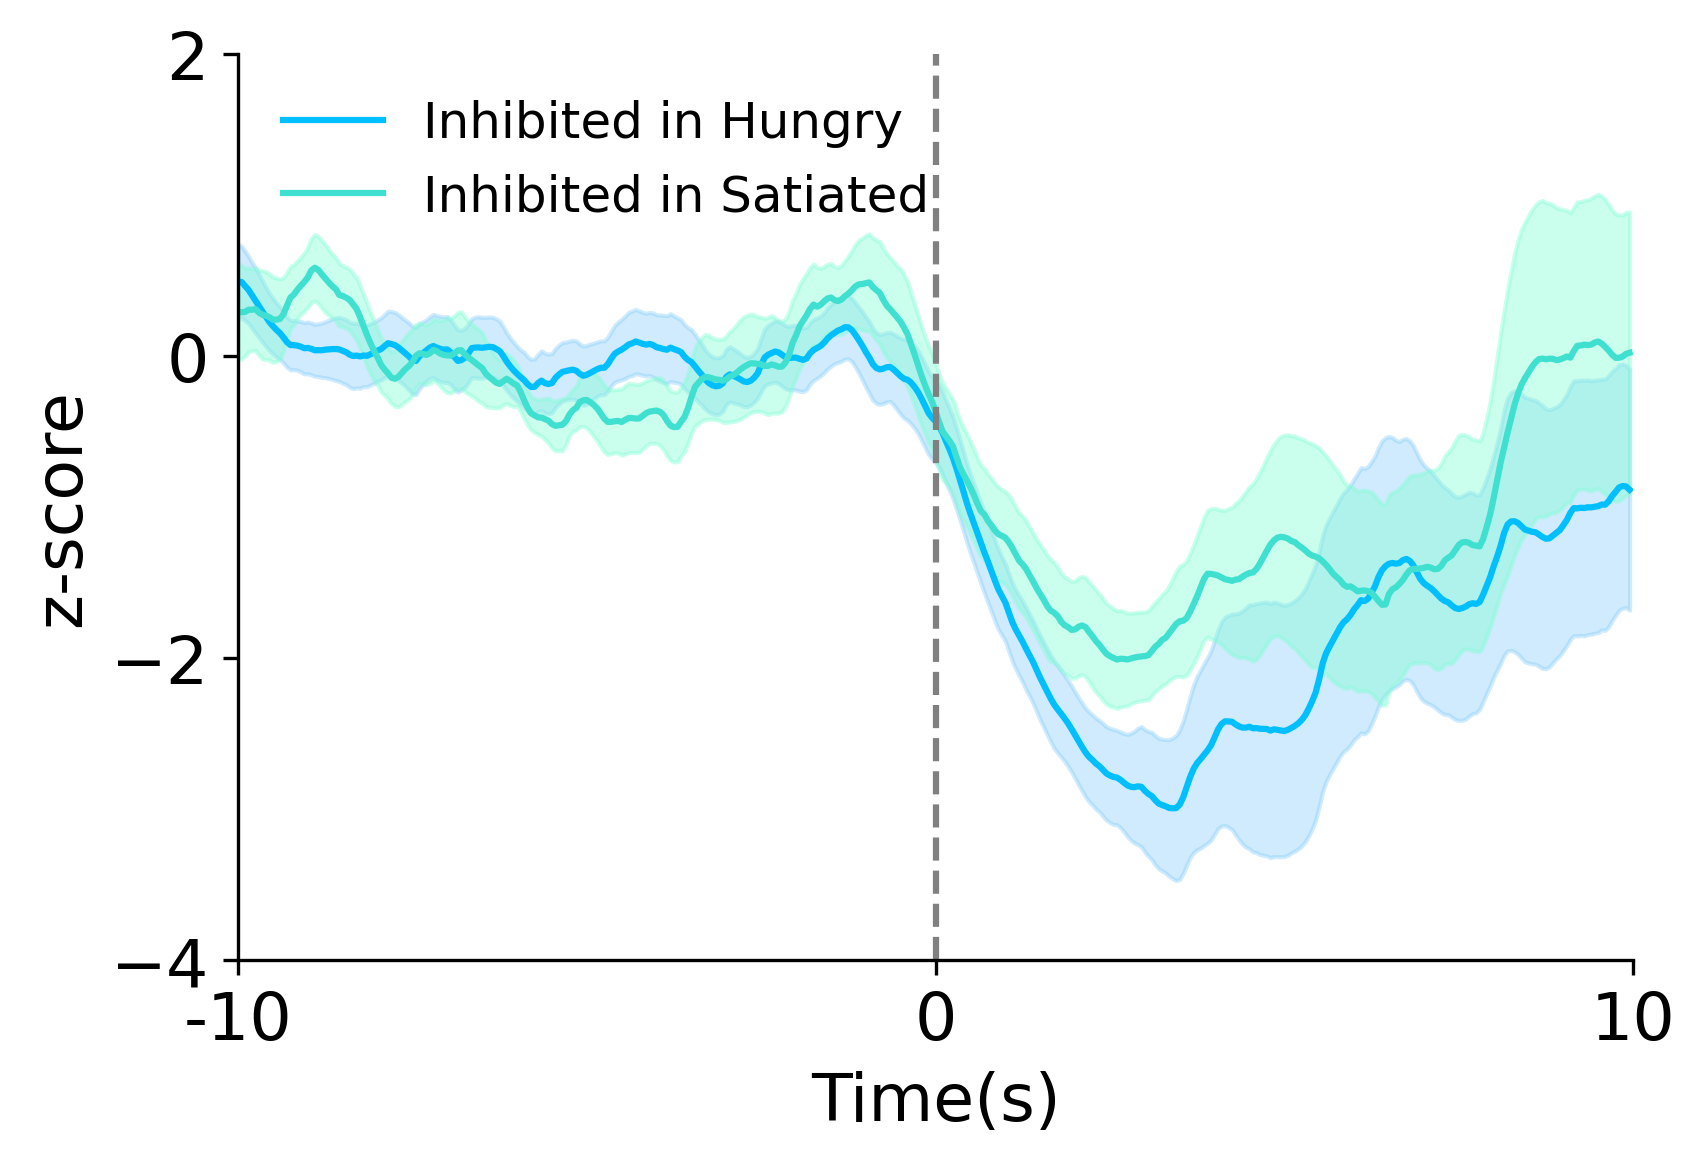

In [17]:
x=np.arange(Bins)
y=inhibited_hungry_mean
z=inhibited_satiated_mean
erry = inhibited_hungry_sem
errz = inhibited_satiated_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.plot(x, y, label = 'Inhibited in Hungry', color = 'deepskyblue')
ax.plot(x, z, label = 'Inhibited in Satiated', color = 'turquoise')
ax.fill_between(x, y-erry, y+erry, color='lightskyblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='aquamarine', alpha = 0.4)
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 2)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize= 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry)

In [18]:
excited_hungry_insatiated_mean = tracesatiated.iloc[excited_hungry_where, 1:].mean(axis=0)
excited_hungry_insatiated_sem =  tracesatiated.iloc[excited_hungry_where, 1:].sem(axis=0)

16

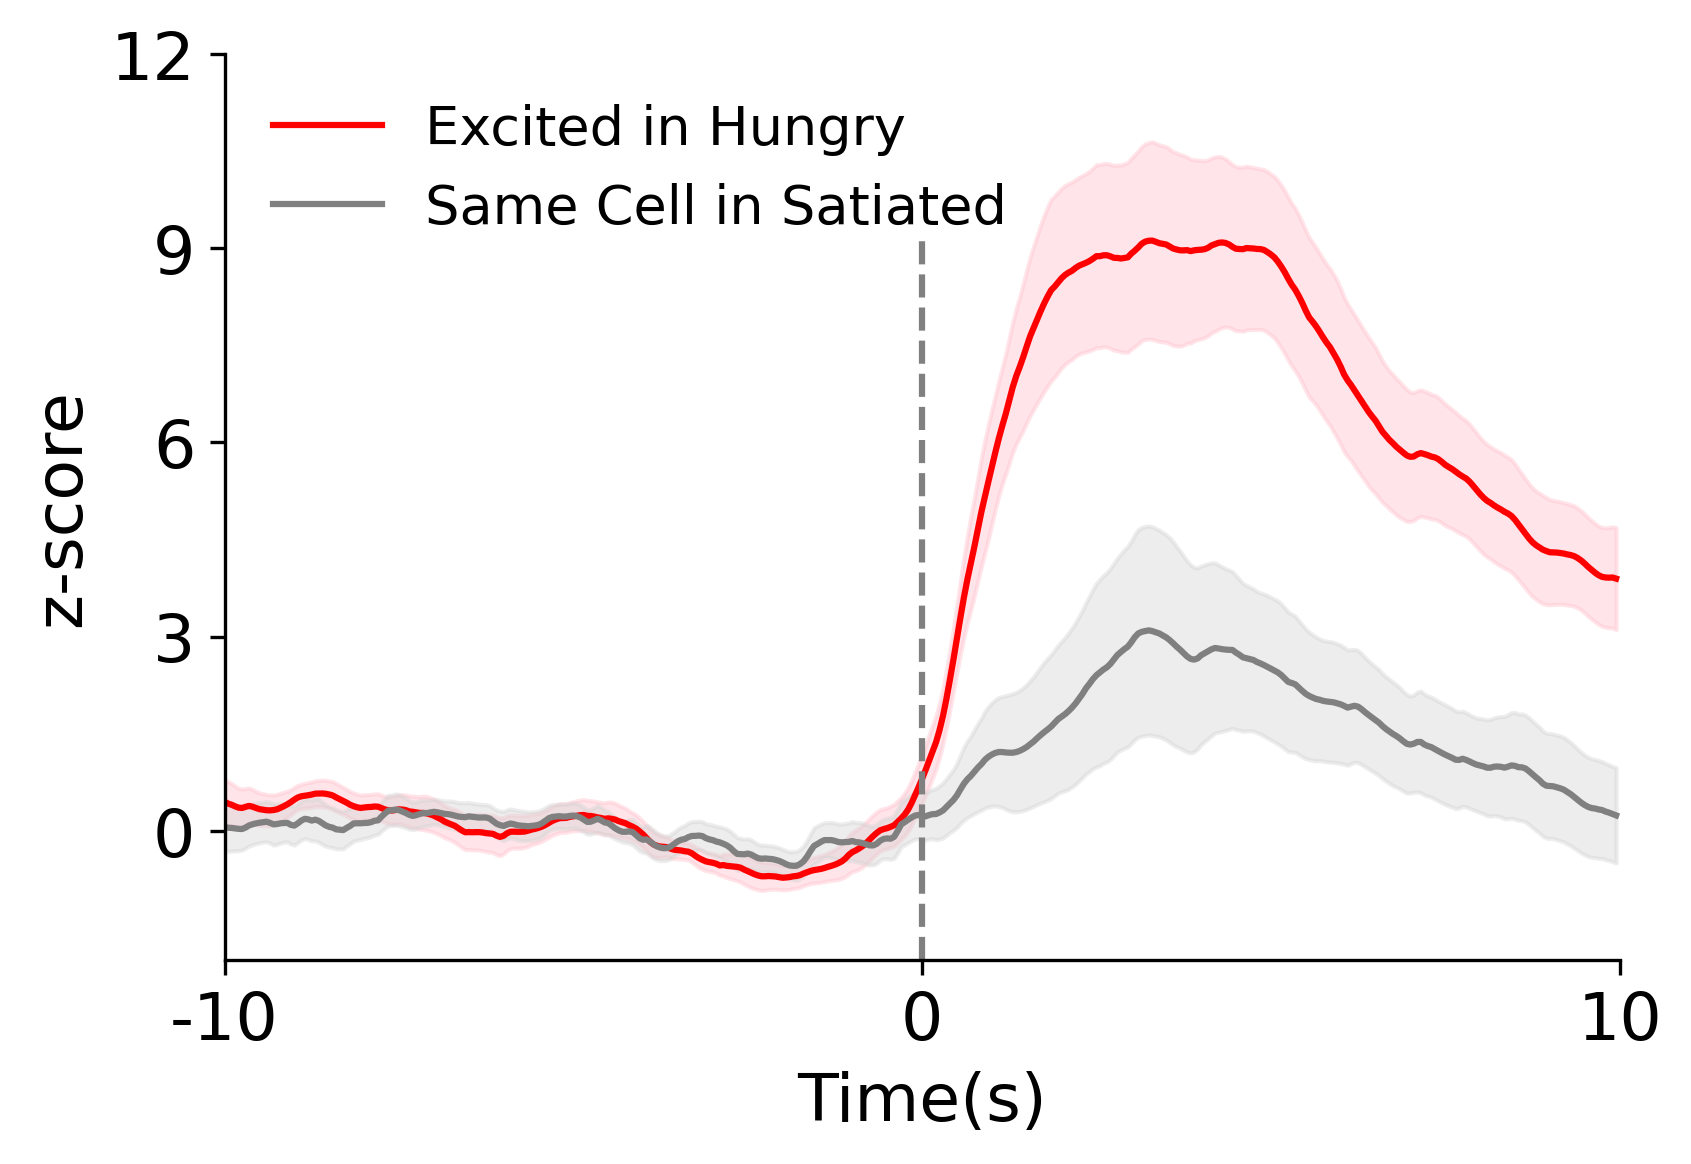

In [19]:
x=np.arange(Bins)
y=excited_hungry_mean
z=excited_hungry_insatiated_mean
erry = excited_hungry_sem
errz = excited_hungry_insatiated_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.plot(x, y, label = 'Excited in Hungry', color = 'red')
ax.plot(x, z, label = 'Same Cell in Satiated', color = 'grey')
ax.fill_between(x, y-erry, y+erry, color='pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color='lightgrey', alpha = 0.4)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-2, 12)
ax.axvline(int((Bins/2)), ymax=0.8, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_hungry)

In [20]:
inhibited_hungry_insatiated_mean = tracesatiated.iloc[inhibited_hungry_where,1:].mean(axis=0)
inhibited_hungry_insatiated_sem =  tracesatiated.iloc[inhibited_hungry_where,1:].sem(axis=0)

24

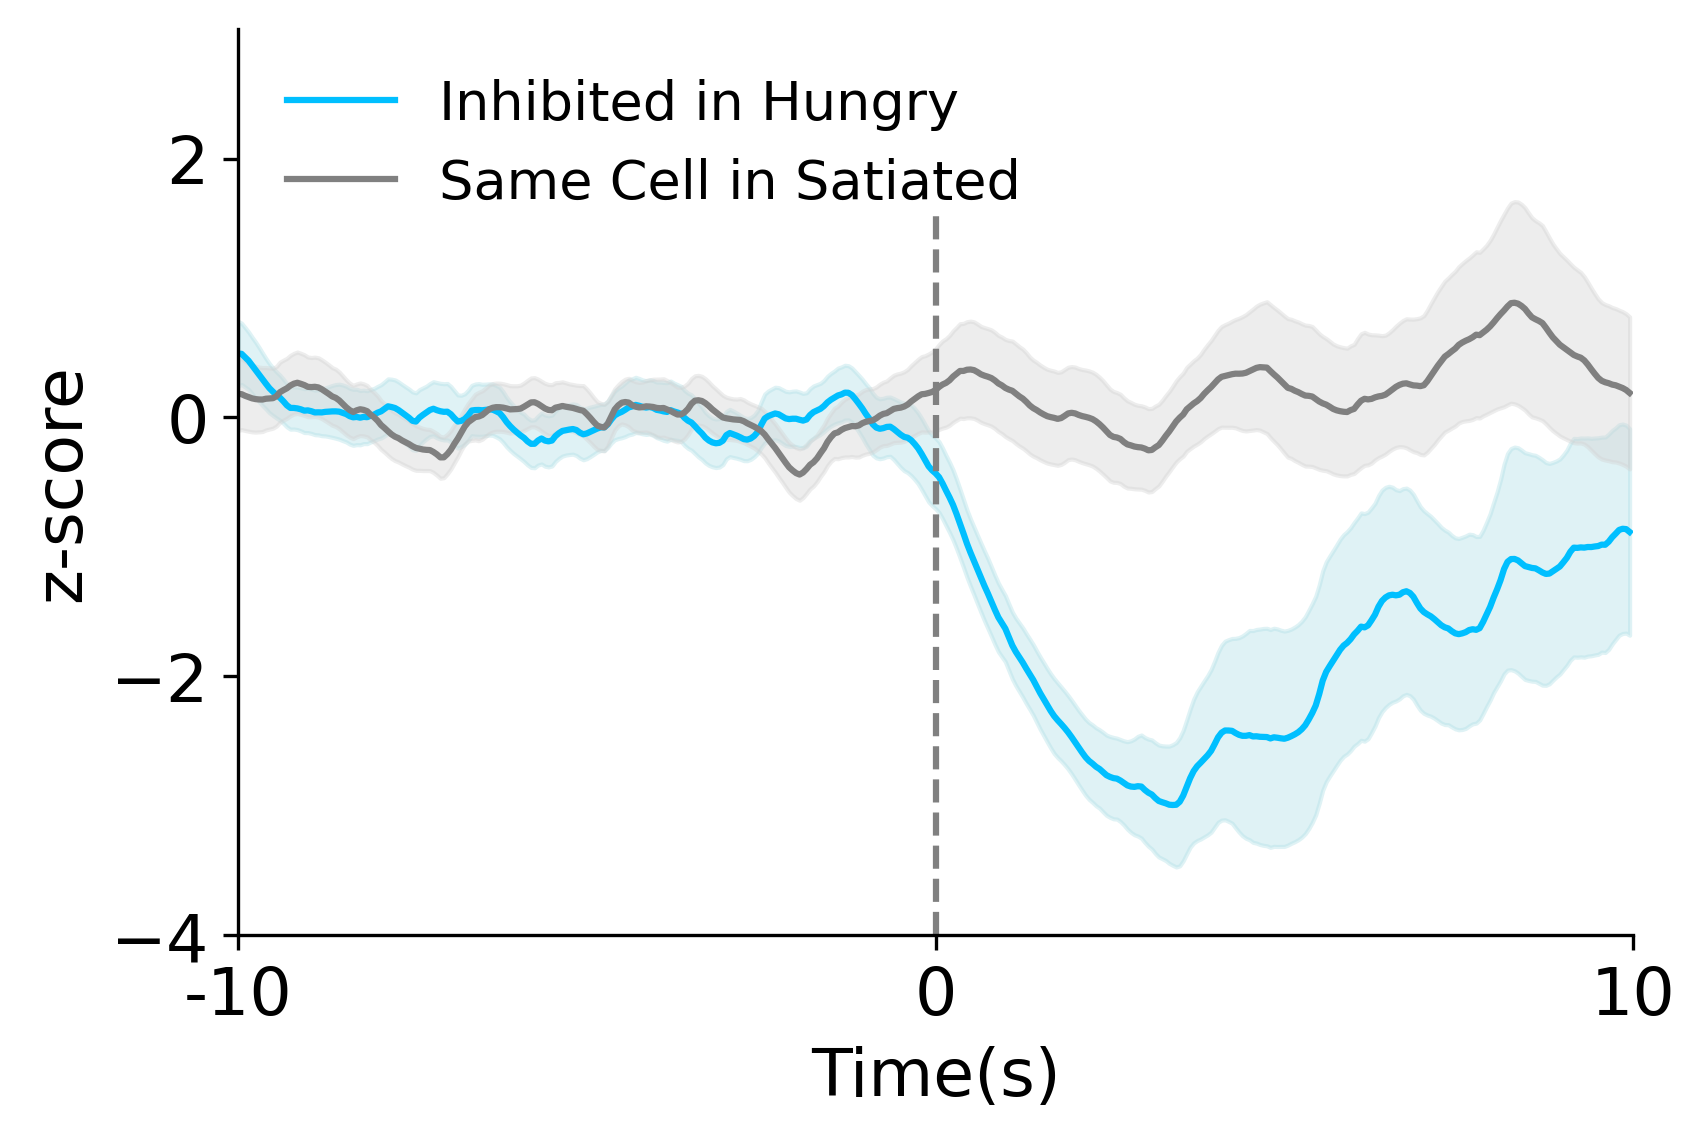

In [21]:
x=np.arange(Bins)
y=inhibited_hungry_mean
z=inhibited_hungry_insatiated_mean
erry = inhibited_hungry_sem
errz = inhibited_hungry_insatiated_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.plot(x, y, label = 'Inhibited in Hungry', color='deepskyblue')
ax.plot(x, z, label = 'Same Cell in Satiated', color='grey')
ax.fill_between(x, y-erry, y+erry, color = 'powderblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color = 'lightgrey', alpha = 0.4)
ax.set_xlabel('Time(s)')
ax.set_ylabel('z-score')
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 3)
ax.axvline(int((Bins/2)), ymax=0.8,color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_hungry)

In [53]:
excited_satiated_inhungry_mean = tracehungry.iloc[excited_satiated_where,1:].mean(axis=0)
excited_satiated_inhungry_sem =  tracehungry.iloc[excited_satiated_where,1:].sem(axis=0)

20

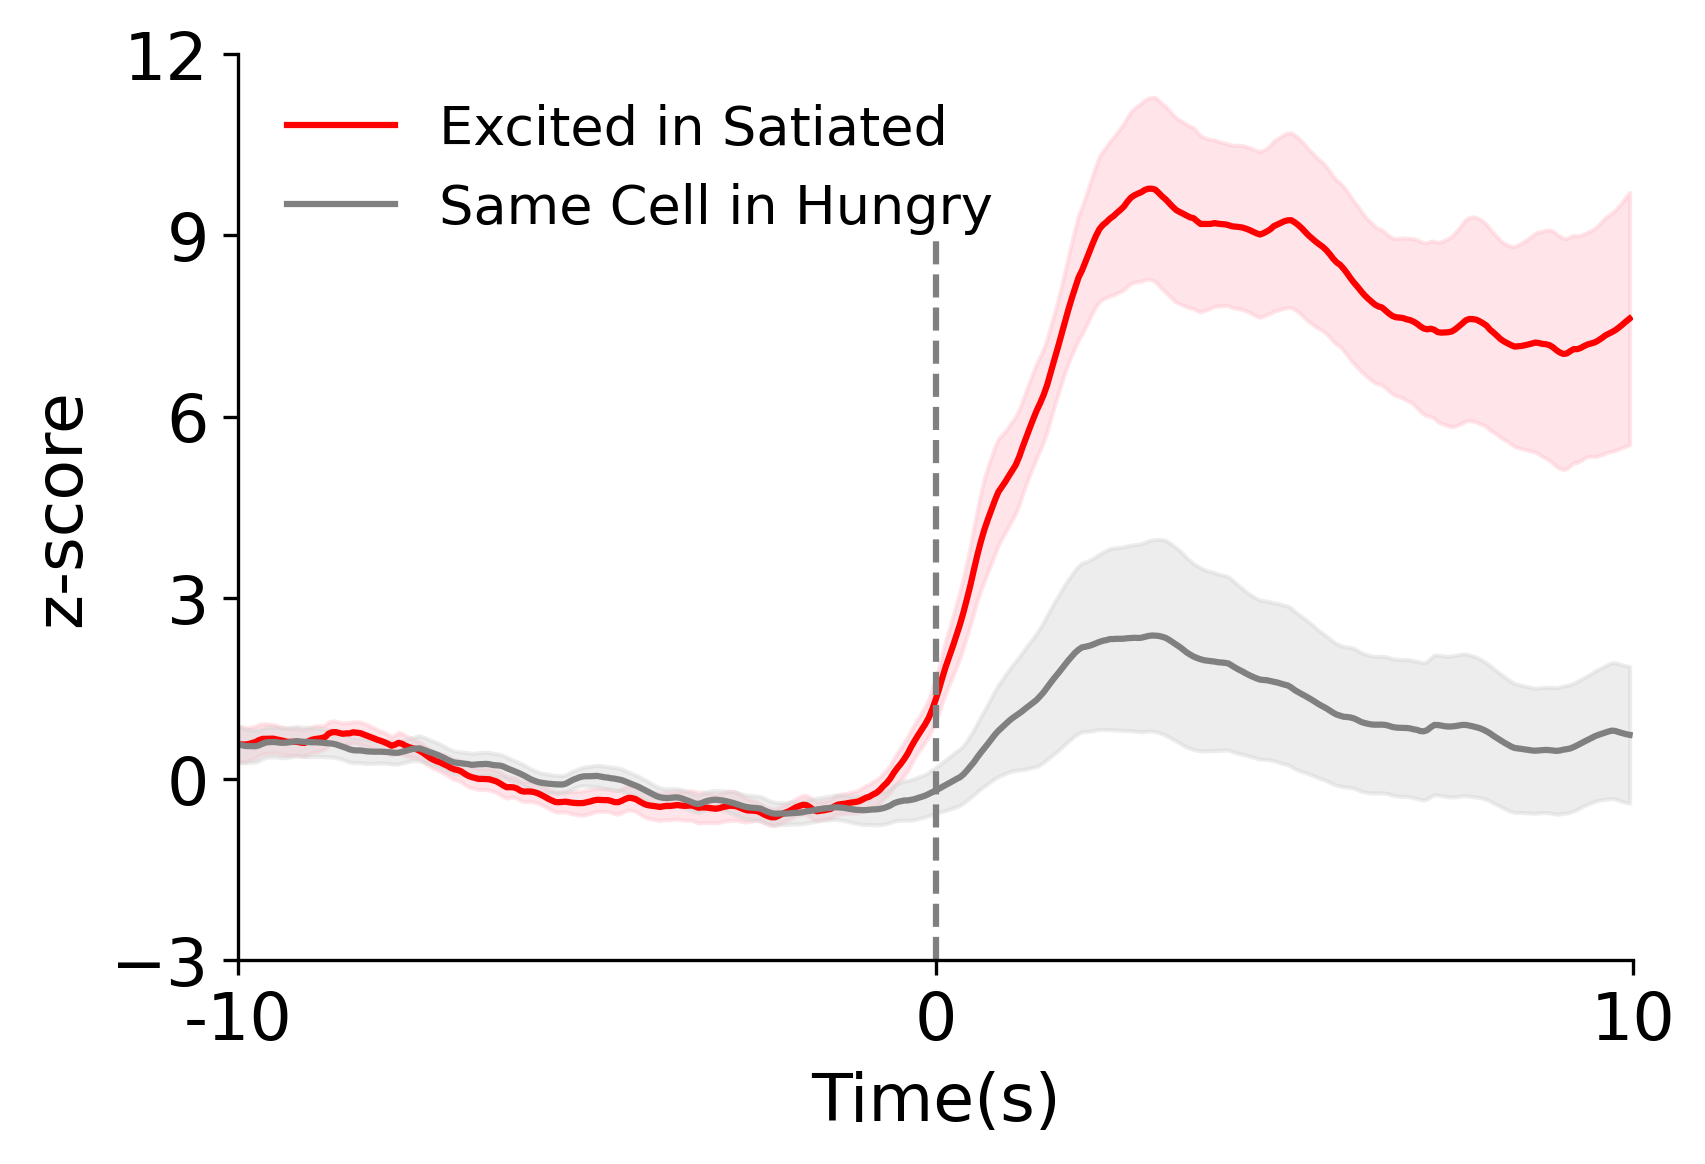

In [55]:
x=np.arange(Bins)
y=excited_satiated_mean
z=excited_satiated_inhungry_mean
erry = excited_satiated_sem
errz = excited_satiated_inhungry_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.plot(x, y, label = 'Excited in Satiated',color='red')
ax.plot(x, z, label = 'Same Cell in Hungry',color='grey')
ax.fill_between(x, y-erry, y+erry, color = 'pink', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color = 'lightgrey', alpha = 0.4)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-3, 12)
ax.axvline(int((Bins/2)), ymax = 0.8,color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(excited_satiated)

In [23]:
inhibited_satiated_inhungry_mean = tracehungry.iloc[inhibited_satiated_where, 1:].mean(axis=0)
inhibited_satiated_inhungry_sem =  tracehungry.iloc[inhibited_satiated_where,1:].sem(axis=0)

16

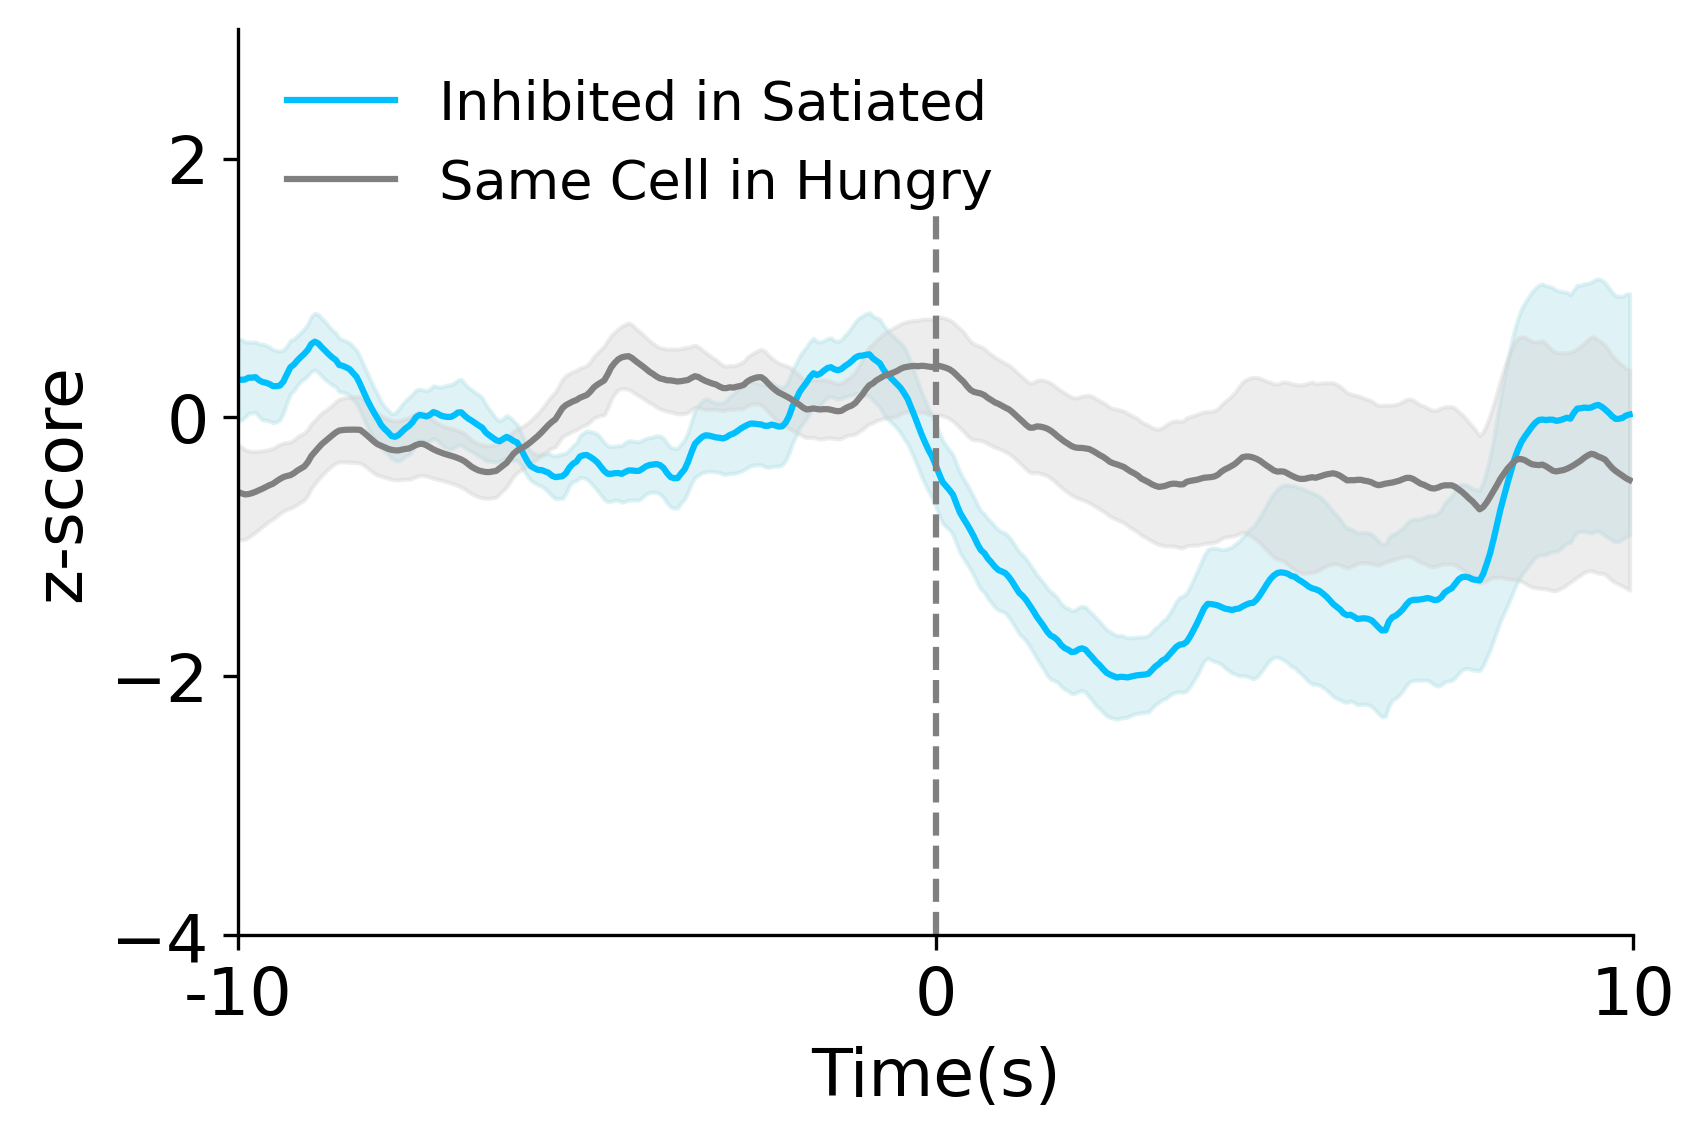

In [24]:
x=np.arange(Bins)
y=inhibited_satiated_mean
z=inhibited_satiated_inhungry_mean
erry = inhibited_satiated_sem
errz = inhibited_satiated_inhungry_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.plot(x, y, label = 'Inhibited in Satiated',color='deepskyblue')
ax.plot(x, z, label = 'Same Cell in Hungry',color='grey')
ax.fill_between(x, y-erry, y+erry, color = 'powderblue', alpha = 0.4)
ax.fill_between(x, z-errz, z+errz, color = 'lightgrey', alpha = 0.4)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-4, 3)
ax.axvline(int((Bins/2)), ymax = 0.8, color = 'grey', ls = '--')
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
len(inhibited_satiated)

In [58]:
tracehungry=tracehungry.iloc[:,1:]
tracesatiated=tracesatiated.iloc[:,1:]
tracehungry.reset_index(inplace=True)
tracesorted_hungry = tracehungry.sort_values(by=int((Bins/2)), axis =0)

In [59]:

tracesatiated.reset_index(inplace=True)
tracesorted_satiated = tracesatiated.sort_values(by=int((Bins/2)), axis =0)

548 neurons in Satiated


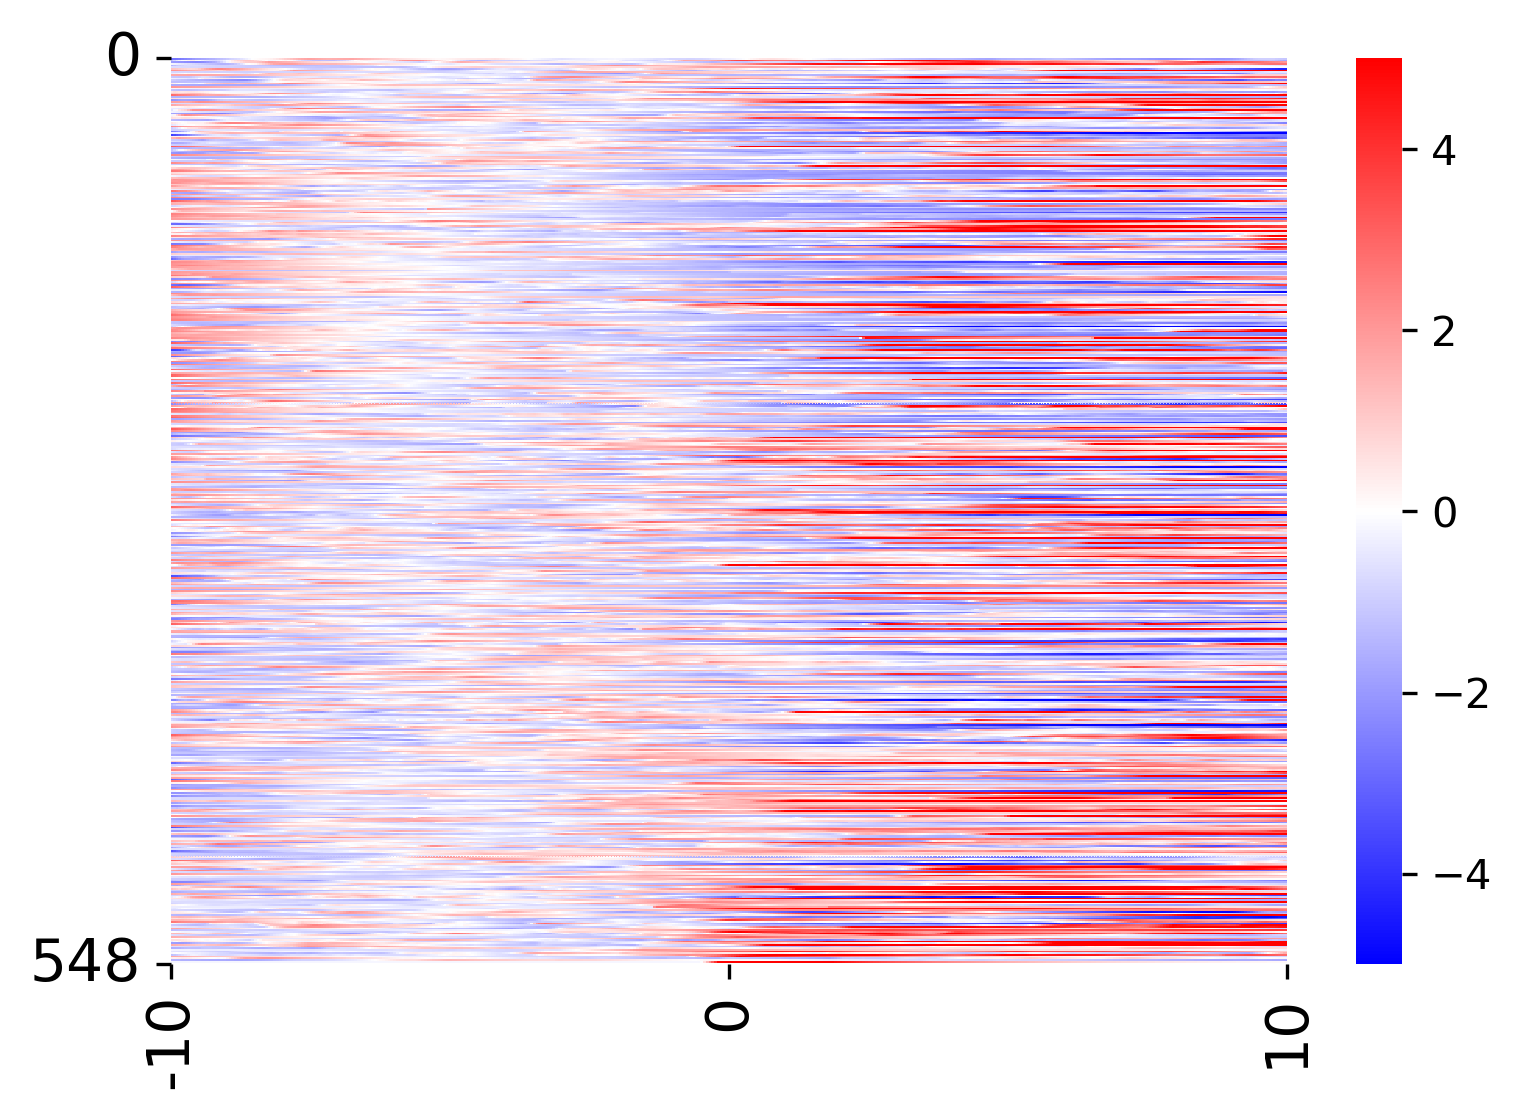

In [60]:
cross_hungry_satiated = tracesatiated.iloc[tracesorted_hungry.index, 1:]
cross_hungry_satiated
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 14)
ax = sb.heatmap(cross_hungry_satiated, vmin = -5, vmax= 5, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(cross_hungry_satiated)])
ax.set_yticklabels([0, len(cross_hungry_satiated)])
print(str(len(tracesatiated)) + ' neurons in Satiated')

548 neurons in Satiated


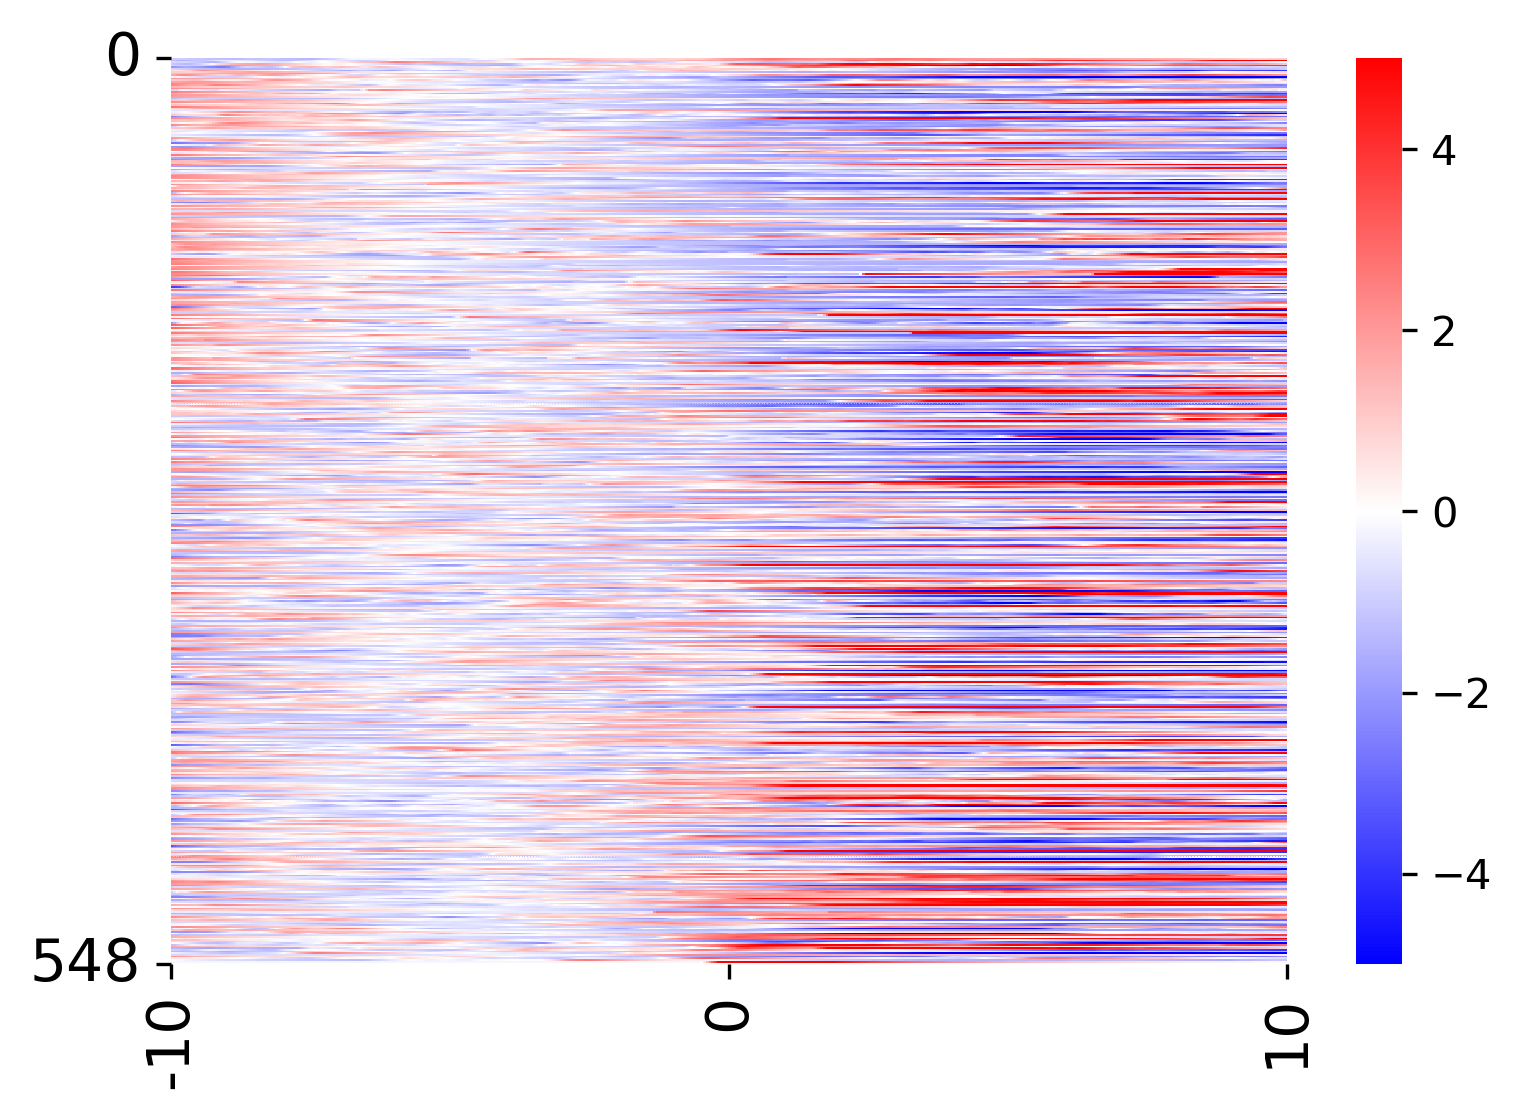

In [61]:
cross_satiatde_hungry = tracehungry.iloc[tracesorted_satiated.index, 1:]
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 14)
ax = sb.heatmap(cross_satiatde_hungry, vmin = -5, vmax= 5, cmap = "bwr")
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange, 0, TimeRange])
ax.set_yticks([0,len(cross_satiatde_hungry)])
ax.set_yticklabels([0, len(cross_satiatde_hungry)])
print(str(len(tracesatiated)) + ' neurons in Satiated')

In [62]:
tracesatiated_mean = tracesatiated.iloc[:,1:].mean(axis=0)#.dropna(axis=0))
tracesatiated_sem = tracesatiated.iloc[:,1:].sem(axis=0)#.dropna(axis=0))
tracehungry_mean = tracehungry.iloc[:,1:].mean(axis=0)#.dropna(axis=0)
tracehungry_sem = tracehungry.iloc[:,1:].sem(axis=0)#.dropna(axis=0)

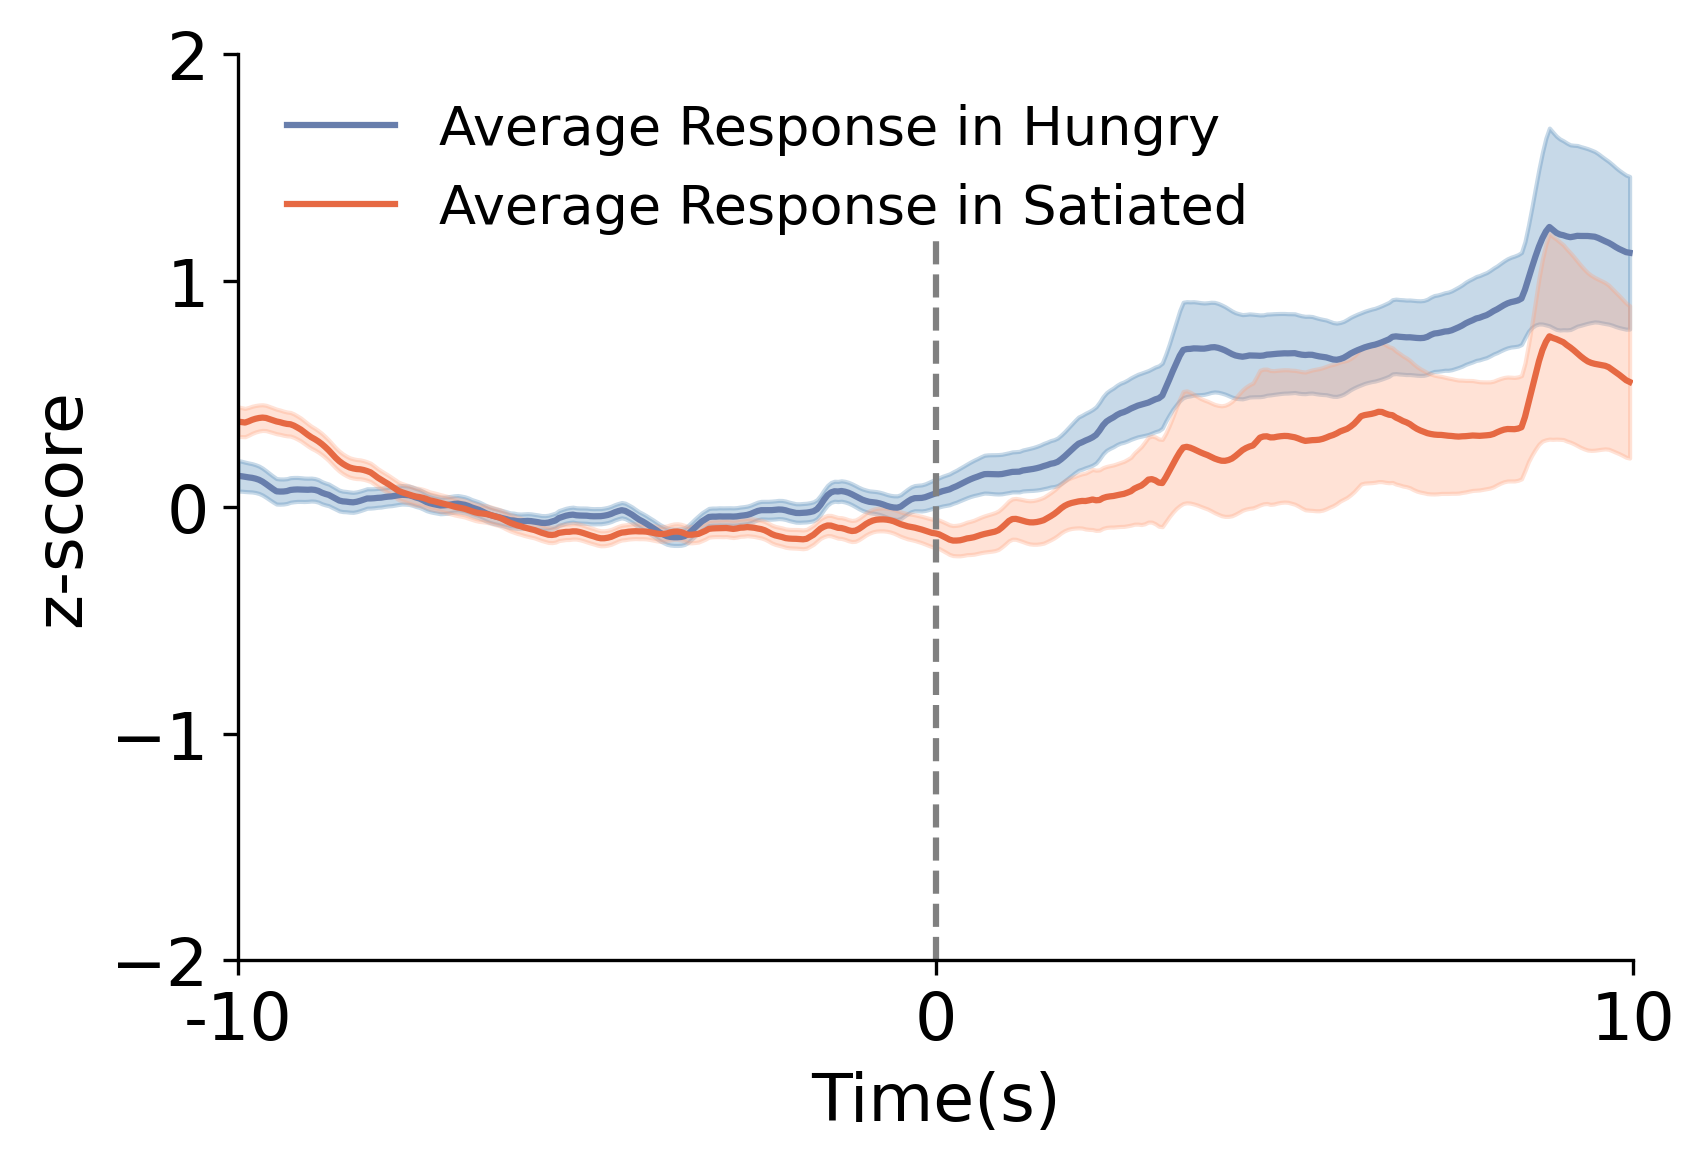

In [64]:
x=np.arange(Bins)
y=tracesatiated_mean
z=tracehungry_mean
erry = tracesatiated_sem
errz = tracehungry_sem
fig, ax = plt.subplots(dpi =300)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_locator(MaxNLocator(5,integer=True))
ax.set_xlabel('Time(s)', fontsize = 16)
ax.set_ylabel('z-score', fontsize = 16)
ax.plot(x, y, label = 'Average Response in Hungry', color = '#687eac')
ax.plot(x, z, label = 'Average Response in Satiated', color = '#e66943')
ax.fill_between(x, y-erry, y+erry, color='steelblue', alpha = 0.3)
ax.fill_between(x, z-errz, z+errz, color='lightsalmon', alpha = 0.3)
ax.set_xticks([0,int((Bins/2)),Bins])
ax.set_xticklabels([-TimeRange,'0',TimeRange])
ax.set_xlim(0, Bins)
ax.set_ylim(-2,2)
ax.tick_params(labelsize = 16)
ax.axvline(int((Bins/2)), color = 'grey', ls = '--', ymax = 0.8)
ax.legend(loc = 2, framealpha = 0, fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#len(excited_hungry)

In [153]:
hungrycells = np.append(excited_hungry_where, inhibited_hungry_where)
satiatedcells = np.append(excited_satiated_where, inhibited_satiated_where)

In [154]:
len(np.intersect1d(hungrycells, satiatedcells))

6

In [155]:
len((satiatedcells))

36

In [156]:
len((hungrycells))

40

# Adding animals IDs

In [222]:
tracehungry = pd.DataFrame()
animalid = pd.DataFrame()

for n in range(len(os.listdir(hungry_dir))):
    f = pd.read_pickle(os.path.join(hungry_dir, os.listdir(hungry_dir)[n]))
    animalid = pd.DataFrame(np.tile(n,len(f)-2), columns = ['animal'])
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)]
    trace = (trace-trace.mean(axis=0))/trace.mean(axis=0)
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracezscore.insert(0, 'animal', animalid.values)
    tracehungry = tracehungry.append(tracezscore)

In [223]:
tracesatiated = pd.DataFrame()
animalid = pd.DataFrame()

for n in range(len(os.listdir(satiated_dir))):
    f = pd.read_pickle(os.path.join(satiated_dir, os.listdir(satiated_dir)[n]))
    animalid = pd.DataFrame(np.tile(n,len(f)-2), columns = ['animal'])
    cueonset = np.array(np.where(np.diff(np.concatenate(([0],f.loc['cue']>0)))>0)[0])
    start = cueonset-FrameRange
    trace = f[:(len(f)-2)]
    trace = (trace-trace.mean(axis=0))/trace.mean(axis=0)
    tracenew = pd.DataFrame(0, index = trace.index, columns= np.arange(TotalFrame))
    for i in range(TotalFrame):
        tracenew.iloc[:,i] = trace.iloc[:,start+i].mean(axis=1)
    tracebin = tracenew.groupby(pd.cut(tracenew.columns,Bins),axis=1).mean()
    tracebin.columns = np.arange(0,Bins)
    tracezscore = tracebin.sub(tracebin.iloc[:,0:int((Bins/2))].mean(axis=1),axis = 0).divide(tracebin.iloc[:,0:int((Bins/2))].std(axis=1),axis=0)
    tracezscore.insert(0, 'animal', animalid.values)
    tracesatiated = tracesatiated.append(tracezscore)

In [224]:
os.listdir(hungry_dir)

['1I5_Hungry.pkl',
 '1S5_Hungry.pkl',
 '2I5_Hungry.pkl',
 '2S5_Hungry.pkl',
 '2Z4_Hungry.pkl',
 '6S5_Hungry.pkl']

In [226]:
tracehungry.iloc[excited_hungry_where[0]]

animal         0         1         2         3         4         5  \
49        0  0.342515  0.299781  0.255503  0.206535  0.155874  0.113594   
84        1 -0.741378 -0.535403 -0.400591 -0.366358 -0.555031 -0.553119   
13        2 -0.957388 -0.958418 -0.960143 -0.977648 -0.982409 -0.978890   
17        2 -0.628075 -0.600636 -0.627155 -0.657748 -0.688719 -0.718805   
0         3  2.043608  2.010972  1.971160  1.909079  1.862545  1.817319   
75        4 -1.304279 -1.271194 -1.103265 -0.976414 -0.874889 -0.832298   
160       4  0.573140  0.523667  0.499219  0.501155  0.526600  0.572171   
184       4  1.024977  0.961711  0.906152  0.859470  0.818874  0.778519   
2         5  2.189337  2.079935  1.967708  1.845333  1.715901  1.714967   
3         5  0.778368  0.777113  0.774962  0.765590  0.762982  0.761313   
8         5  0.844829  0.859993  0.870377  0.860349  0.828084  0.773942   
13        5  1.310304  1.239922  1.161203  1.086033  1.026563  0.939003   
17        5  0.143179  0.074347  0.047202  0.037812  0.027586  0.010152   
32        5 -0.954341 -1.035540 -1.118582 -1.205754 -1.275461 -1.336199   
51        5  0.159154  0.199319  0.233948  0.254901  0.296063  0.381392   

            6         7         8  ...        390        391        392  \
49   0.092515  0.076327  0.062873  ...   6.601979   6.652251   6.699610   
84  -0.438145 -0.364029 -0.251566  ...   2.267666   2.232663   2.189496   
13  -0.953302 -0.819053 -0.673825  ...   4.355202   4.280049   4.271996   
17  -0.747021 -0.775132 -0.805161  ...   5.736971   5.643561   5.557817   
0    1.770899  1.718045  1.662577  ...   2.864533   2.821525   2.746020   
75  -0.706364 -0.646744 -0.574963  ...  -2.271842  -2.299401  -2.322758   
160  0.633646  0.915220  1.139993  ...   3.608299   3.466429   3.332975   
184  0.736311  0.691610  0.641082  ...  17.056780  17.009815  17.026823   
2    1.969959  2.015409  1.874583  ...   3.947111   3.931745   4.012761   
3    0.761650  0.760650  0.754622  ...  11.199083  11.211127  11.213251   
8    0.628224  0.471582  0.322116  ...   4.240704   4.107105   3.969461   
13   0.815280  0.701646  0.612659  ...   2.003108   1.949923   1.892965   
17  -0.001759 -0.019843 -0.047897  ...   2.406945   2.496735   2.587019   
32  -1.393631 -1.451343 -1.517283  ...   7.148495   6.963201   6.777823   
51   0.475931  0.503705  0.381813  ...   4.198831   4.131272   4.057576   

           393        394        395        396        397        398  \
49    6.734829   6.779842   6.887587   7.007971   7.137504   7.271102   
84    2.148873   2.161308   2.190853   2.213230   2.232547   2.232325   
13    4.266741   4.213940   4.132003   4.064872   3.986075   3.952572   
17    5.490813   5.431083   5.374616   5.315561   5.257375   5.195191   
0     2.648706   2.550750   2.452732   2.355807   2.259594   2.168504   
75   -2.333492  -2.341230  -2.334785  -2.313129  -2.296740  -2.267430   
160   3.206484   3.070385   2.929596   2.796489   2.663659   2.527504   
184  17.092289  17.189681  17.316005  17.458379  17.602936  17.725864   
2     4.157780   4.291433   4.468017   4.776303   5.106640   5.393176   
3    11.212100  11.223797  11.244710  11.281183  11.349568  11.423577   
8     3.832577   3.708843   3.607391   3.523243   3.462653   3.429827   
13    1.828093   1.771669   1.730519   1.701160   1.679205   1.663409   
17    2.671141   2.757813   2.848939   2.931022   3.003861   3.149764   
32    6.623813   6.499423   6.393158   6.302641   6.220212   6.128380   
51    3.975261   3.902369   3.850051   3.813382   3.794183   3.783150   

           399  
49    7.409998  
84    2.186162  
13    3.877277  
17    5.133438  
0     2.087889  
75   -2.223537  
160   2.384126  
184  17.814283  
2     5.303249  
3    11.495354  
8     3.441921  
13    1.636880  
17    3.323495  
32    5.998024  
51    3.763759  

[15 rows x 401 columns]

In [228]:
tracehungry.iloc[inhibited_hungry_where[0]].to_csv('Inhibited_Hungry.csv')

In [231]:
tracesatiated.iloc[inhibited_satiated_where[0]].to_csv('Inhibited_Satiated.csv')

In [232]:
tracesatiated.iloc[excited_satiated_where[0]].to_csv('Excited_Satiated.csv')